<u><div style="text-align: center;"><font size=4>**MSc Data Science Project**</font></div></u>

**<div style="text-align: center;"> Identification of Economic Indicators affecting the Business Confidence Index (BCI).</div>**
**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [1]:
#pip install plotly

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [3]:
# Directory for the datasets

directory = r'C:\Users\Tan\Desktop\Tanvir - 05.05.22\UH - DSwP\Semester 5 - Final Project\Datasets\Filtered Datasets'
# The 'r' before the path string is to to avoid escape character interpretation 
# without the 'r' have to replace backslash with forward slash
# 'C:/Users/Tan/Desktop/Tanvir - 05.05.22/UH - DSwP/Semester 5 - Final Project/Datasets/Datasets'

In [4]:
# Initializing an empty list to store names of my dataset files which are in .csv format
csv_files = []

# Listing all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        csv_files.append(filename)

# Printing the list of CSV files
for csv_file in csv_files:
    print(csv_file)

Bank Credit All Commercial Banks.csv
BCI - US.csv
Commercial Real Estate Prices for United States.csv
Consumer Loans Credit Cards and Other Revolving Plans All Commercial Banks.csv
Continued Claims (Insured Unemployment).csv
Delinquency Rate on Credit Card Loans All Commercial Banks.csv
Federal Funds Effective Rate.csv
Median Consumer Price Index.csv
Personal Saving Rate.csv
Real Estate Loans Commercial Real Estate Loans All Commercial Banks.csv
Real Gross Domestic Product.csv
SPX500.csv
Sticky Price Consumer Price Index.csv
Unemployment Rate.csv
US - Exports.csv
US - Imports.csv
US - Inflation.csv


In [5]:
# Creating an empty list for a combined dataframe

dataframes = []

In [6]:

for filename in os.listdir(directory):
    if filename.endswith(".csv") and filename not in ['BCI - US.csv', 'SPX500.csv']:
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, parse_dates=['DATE'], dayfirst=True)
        dataframes.append(df)

'''
for filename in os.listdir(directory):
    if filename.endswith(".csv") and filename not in ['BCI - US.csv']:
        file_path = os.path.join(directory, filename)
        
        # Read CSV file
        df = pd.read_csv(file_path, parse_dates=['DATE'])
        
        # Convert 'SPX500' dates to dd/mm/yyyy format
        if 'SPX500.csv' in filename:
            df['DATE'] = df['DATE'].dt.strftime('%d/%m/%Y')
            df['DATE'] = pd.to_datetime(df['DATE'], format='%d/%m/%Y')
        
        dataframes.append(df)
'''

'''
# Read other CSV files
for filename in os.listdir(directory):
    if filename.endswith(".csv") and filename not in ['BCI - US.csv', 'SPX500.csv']:
        file_path = os.path.join(directory, filename)
        
        # Read CSV file
        df = pd.read_csv(file_path, parse_dates=['DATE'])
        
        dataframes.append(df)

# Read 'SPX500.csv'
spx_file_path = os.path.join(directory, 'SPX500.csv')
spx_df = pd.read_csv(spx_file_path, parse_dates=['DATE'])

# Convert 'SPX500' dates to dd/mm/yyyy format
spx_df['DATE'] = spx_df['DATE'].dt.strftime('%d/%m/%Y')
spx_df['DATE'] = pd.to_datetime(spx_df['DATE'], format='%d/%m/%Y')

dataframes.append(spx_df)
'''

'\n# Read other CSV files\nfor filename in os.listdir(directory):\n    if filename.endswith(".csv") and filename not in [\'BCI - US.csv\', \'SPX500.csv\']:\n        file_path = os.path.join(directory, filename)\n        \n        # Read CSV file\n        df = pd.read_csv(file_path, parse_dates=[\'DATE\'])\n        \n        dataframes.append(df)\n\n# Read \'SPX500.csv\'\nspx_file_path = os.path.join(directory, \'SPX500.csv\')\nspx_df = pd.read_csv(spx_file_path, parse_dates=[\'DATE\'])\n\n# Convert \'SPX500\' dates to dd/mm/yyyy format\nspx_df[\'DATE\'] = spx_df[\'DATE\'].dt.strftime(\'%d/%m/%Y\')\nspx_df[\'DATE\'] = pd.to_datetime(spx_df[\'DATE\'], format=\'%d/%m/%Y\')\n\ndataframes.append(spx_df)\n'

In [7]:
spx_file_path = os.path.join(directory, 'SPX500.csv')
spx_df = pd.read_csv(spx_file_path, parse_dates=['DATE'])

spx_df

DATE S&P_change %
0     2023-05-03       -0.70%
1     2023-05-02       -1.16%
2     2023-05-01       -0.04%
3     2023-04-28        0.83%
4     2023-04-27        1.96%
...          ...          ...
10929 1980-01-01        0.00%
10930 1979-12-31        0.09%
10931 1979-12-28       -0.19%
10932 1979-12-27        0.19%
10933 1979-12-26        0.09%

[10934 rows x 2 columns]

In [8]:
# Convert 'S_&_P' to numeric values
spx_df['S&P_change %'] = pd.to_numeric(spx_df['S&P_change %'].str.rstrip('%'), errors='coerce')

In [9]:
spx_df

DATE  S&P_change %
0     2023-05-03         -0.70
1     2023-05-02         -1.16
2     2023-05-01         -0.04
3     2023-04-28          0.83
4     2023-04-27          1.96
...          ...           ...
10929 1980-01-01          0.00
10930 1979-12-31          0.09
10931 1979-12-28         -0.19
10932 1979-12-27          0.19
10933 1979-12-26          0.09

[10934 rows x 2 columns]

In [10]:
# Creating a combined DataFrame

combined_df = pd.concat(dataframes, ignore_index=True)


In [11]:
combined_df = pd.concat([combined_df, spx_df], ignore_index=True)

In [12]:
combined_df.columns, len(combined_df.columns)

(Index(['DATE', 'bank_credits', 'real_estate_prices', 'consumer_loans',
        'unemployment_claims', 'credit_delinquency', 'federal_interest_rate',
        'consumer_price_idx', 'personal_saving_rate',
        'commerical_real_estate_loan', 'GDP_inflat_adj',
        'st_consumer_price_idx', 'unemployment_rate', 'exports (million USD)',
        'imports (million USD)', 'inflation', 'S&P_change %'],
       dtype='object'),
 17)

In [13]:
combined_df.columns = ['date', 'bank_credits', 'real_estate_prices', 'consumer_loans',
                       'unemployment_claims', 'credit_delinquency', 'federal_interest_rate',
                       'consumer_price_idx', 'personal_saving_rate', 'commerical_real_estate_loan', 
                       'GDP', 'st_consumer_price_idx', 'unemployment_rate', 
                       'exports', 'imports', 'inflation', 'spx500']

In [14]:
combined_df.head()

date  bank_credits  real_estate_prices  consumer_loans  \
0 1973-01-03      567.2553                 NaN             NaN   
1 1973-01-10      565.5054                 NaN             NaN   
2 1973-01-17      565.3477                 NaN             NaN   
3 1973-01-24      565.1737                 NaN             NaN   
4 1973-01-31      569.7089                 NaN             NaN   

   unemployment_claims  credit_delinquency  federal_interest_rate  \
0                  NaN                 NaN                    NaN   
1                  NaN                 NaN                    NaN   
2                  NaN                 NaN                    NaN   
3                  NaN                 NaN                    NaN   
4                  NaN                 NaN                    NaN   

   consumer_price_idx  personal_saving_rate  commerical_real_estate_loan  GDP  \
0                 NaN                   NaN                          NaN  NaN   
1                 NaN                   NaN                          NaN  NaN   
2                 NaN                   NaN                          NaN  NaN   
3                 NaN                   NaN                          NaN  NaN   
4                 NaN                   NaN                          NaN  NaN   

   st_consumer_price_idx  unemployment_rate  exports  imports  inflation  \
0                    NaN                NaN      NaN      NaN        NaN   
1                    NaN                NaN      NaN      NaN        NaN   
2                    NaN                NaN      NaN      NaN        NaN   
3                    NaN                NaN      NaN      NaN        NaN   
4                    NaN                NaN      NaN      NaN        NaN   

   spx500  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [15]:
# Reading the BCI data file

file_path_bci = os.path.join(directory, 'BCI - US.csv')
df_bci = pd.read_csv(file_path_bci, parse_dates=['DATE'], dayfirst=True)

In [16]:
df_bci.columns = ['date', 'BCI']

In [17]:
df_bci

date        BCI
0   1950-01-01  101.11610
1   1950-02-01  101.66320
2   1950-03-01  102.39250
3   1950-04-01  103.43150
4   1950-05-01  104.47900
..         ...        ...
881 2023-06-01   98.50663
882 2023-07-01   98.58130
883 2023-08-01   98.72079
884 2023-09-01   98.79745
885 2023-10-01   98.71177

[886 rows x 2 columns]

In [18]:
combined_df = pd.concat([combined_df, df_bci], ignore_index=True)

In [19]:
combined_df

date  bank_credits  real_estate_prices  consumer_loans  \
0     1973-01-03      567.2553                 NaN             NaN   
1     1973-01-10      565.5054                 NaN             NaN   
2     1973-01-17      565.3477                 NaN             NaN   
3     1973-01-24      565.1737                 NaN             NaN   
4     1973-01-31      569.7089                 NaN             NaN   
...          ...           ...                 ...             ...   
51121 2023-06-01           NaN                 NaN             NaN   
51122 2023-07-01           NaN                 NaN             NaN   
51123 2023-08-01           NaN                 NaN             NaN   
51124 2023-09-01           NaN                 NaN             NaN   
51125 2023-10-01           NaN                 NaN             NaN   

       unemployment_claims  credit_delinquency  federal_interest_rate  \
0                      NaN                 NaN                    NaN   
1                      NaN                 NaN                    NaN   
2                      NaN                 NaN                    NaN   
3                      NaN                 NaN                    NaN   
4                      NaN                 NaN                    NaN   
...                    ...                 ...                    ...   
51121                  NaN                 NaN                    NaN   
51122                  NaN                 NaN                    NaN   
51123                  NaN                 NaN                    NaN   
51124                  NaN                 NaN                    NaN   
51125                  NaN                 NaN                    NaN   

       consumer_price_idx  personal_saving_rate  commerical_real_estate_loan  \
0                     NaN                   NaN                          NaN   
1                     NaN                   NaN                          NaN   
2                     NaN                   NaN                          NaN   
3                     NaN                   NaN                          NaN   
4                     NaN                   NaN                          NaN   
...                   ...                   ...                          ...   
51121                 NaN                   NaN                          NaN   
51122                 NaN                   NaN                          NaN   
51123                 NaN                   NaN                          NaN   
51124                 NaN                   NaN                          NaN   
51125                 NaN                   NaN                          NaN   

       GDP  st_consumer_price_idx  unemployment_rate  exports  imports  \
0      NaN                    NaN                NaN      NaN      NaN   
1      NaN                    NaN                NaN      NaN      NaN   
2      NaN                    NaN                NaN      NaN      NaN   
3      NaN                    NaN                NaN      NaN      NaN   
4      NaN                    NaN                NaN      NaN      NaN   
...    ...                    ...                ...      ...      ...   
51121  NaN                    NaN                NaN      NaN      NaN   
51122  NaN                    NaN                NaN      NaN      NaN   
51123  NaN                    NaN                NaN      NaN      NaN   
51124  NaN                    NaN                NaN      NaN      NaN   
51125  NaN                    NaN                NaN      NaN      NaN   

       inflation  spx500       BCI  
0            NaN     NaN       NaN  
1            NaN     NaN       NaN  
2            NaN     NaN       NaN  
3            NaN     NaN       NaN  
4            NaN     NaN       NaN  
...          ...     ...       ...  
51121        NaN     NaN  98.50663  
51122        NaN     NaN  98.58130  
51123        NaN     NaN  98.72079  
51124        NaN     NaN  98.79745  
51125        NaN     NaN  98.71177  


In [20]:
df = combined_df

In [21]:
df

date  bank_credits  real_estate_prices  consumer_loans  \
0     1973-01-03      567.2553                 NaN             NaN   
1     1973-01-10      565.5054                 NaN             NaN   
2     1973-01-17      565.3477                 NaN             NaN   
3     1973-01-24      565.1737                 NaN             NaN   
4     1973-01-31      569.7089                 NaN             NaN   
...          ...           ...                 ...             ...   
51121 2023-06-01           NaN                 NaN             NaN   
51122 2023-07-01           NaN                 NaN             NaN   
51123 2023-08-01           NaN                 NaN             NaN   
51124 2023-09-01           NaN                 NaN             NaN   
51125 2023-10-01           NaN                 NaN             NaN   

       unemployment_claims  credit_delinquency  federal_interest_rate  \
0                      NaN                 NaN                    NaN   
1                      NaN                 NaN                    NaN   
2                      NaN                 NaN                    NaN   
3                      NaN                 NaN                    NaN   
4                      NaN                 NaN                    NaN   
...                    ...                 ...                    ...   
51121                  NaN                 NaN                    NaN   
51122                  NaN                 NaN                    NaN   
51123                  NaN                 NaN                    NaN   
51124                  NaN                 NaN                    NaN   
51125                  NaN                 NaN                    NaN   

       consumer_price_idx  personal_saving_rate  commerical_real_estate_loan  \
0                     NaN                   NaN                          NaN   
1                     NaN                   NaN                          NaN   
2                     NaN                   NaN                          NaN   
3                     NaN                   NaN                          NaN   
4                     NaN                   NaN                          NaN   
...                   ...                   ...                          ...   
51121                 NaN                   NaN                          NaN   
51122                 NaN                   NaN                          NaN   
51123                 NaN                   NaN                          NaN   
51124                 NaN                   NaN                          NaN   
51125                 NaN                   NaN                          NaN   

       GDP  st_consumer_price_idx  unemployment_rate  exports  imports  \
0      NaN                    NaN                NaN      NaN      NaN   
1      NaN                    NaN                NaN      NaN      NaN   
2      NaN                    NaN                NaN      NaN      NaN   
3      NaN                    NaN                NaN      NaN      NaN   
4      NaN                    NaN                NaN      NaN      NaN   
...    ...                    ...                ...      ...      ...   
51121  NaN                    NaN                NaN      NaN      NaN   
51122  NaN                    NaN                NaN      NaN      NaN   
51123  NaN                    NaN                NaN      NaN      NaN   
51124  NaN                    NaN                NaN      NaN      NaN   
51125  NaN                    NaN                NaN      NaN      NaN   

       inflation  spx500       BCI  
0            NaN     NaN       NaN  
1            NaN     NaN       NaN  
2            NaN     NaN       NaN  
3            NaN     NaN       NaN  
4            NaN     NaN       NaN  
...          ...     ...       ...  
51121        NaN     NaN  98.50663  
51122        NaN     NaN  98.58130  
51123        NaN     NaN  98.72079  
51124        NaN     NaN  98.79745  
51125        NaN     NaN  98.71177  


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51126 entries, 0 to 51125
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         51126 non-null  datetime64[ns]
 1   bank_credits                 2625 non-null   float64       
 2   real_estate_prices           70 non-null     float64       
 3   consumer_loans               1191 non-null   float64       
 4   unemployment_claims          2937 non-null   float64       
 5   credit_delinquency           128 non-null    float64       
 6   federal_interest_rate        25143 non-null  float64       
 7   consumer_price_idx           483 non-null    float64       
 8   personal_saving_rate         771 non-null    float64       
 9   commerical_real_estate_loan  1871 non-null   float64       
 10  GDP                          305 non-null    float64       
 11  st_consumer_price_idx        675 non-null

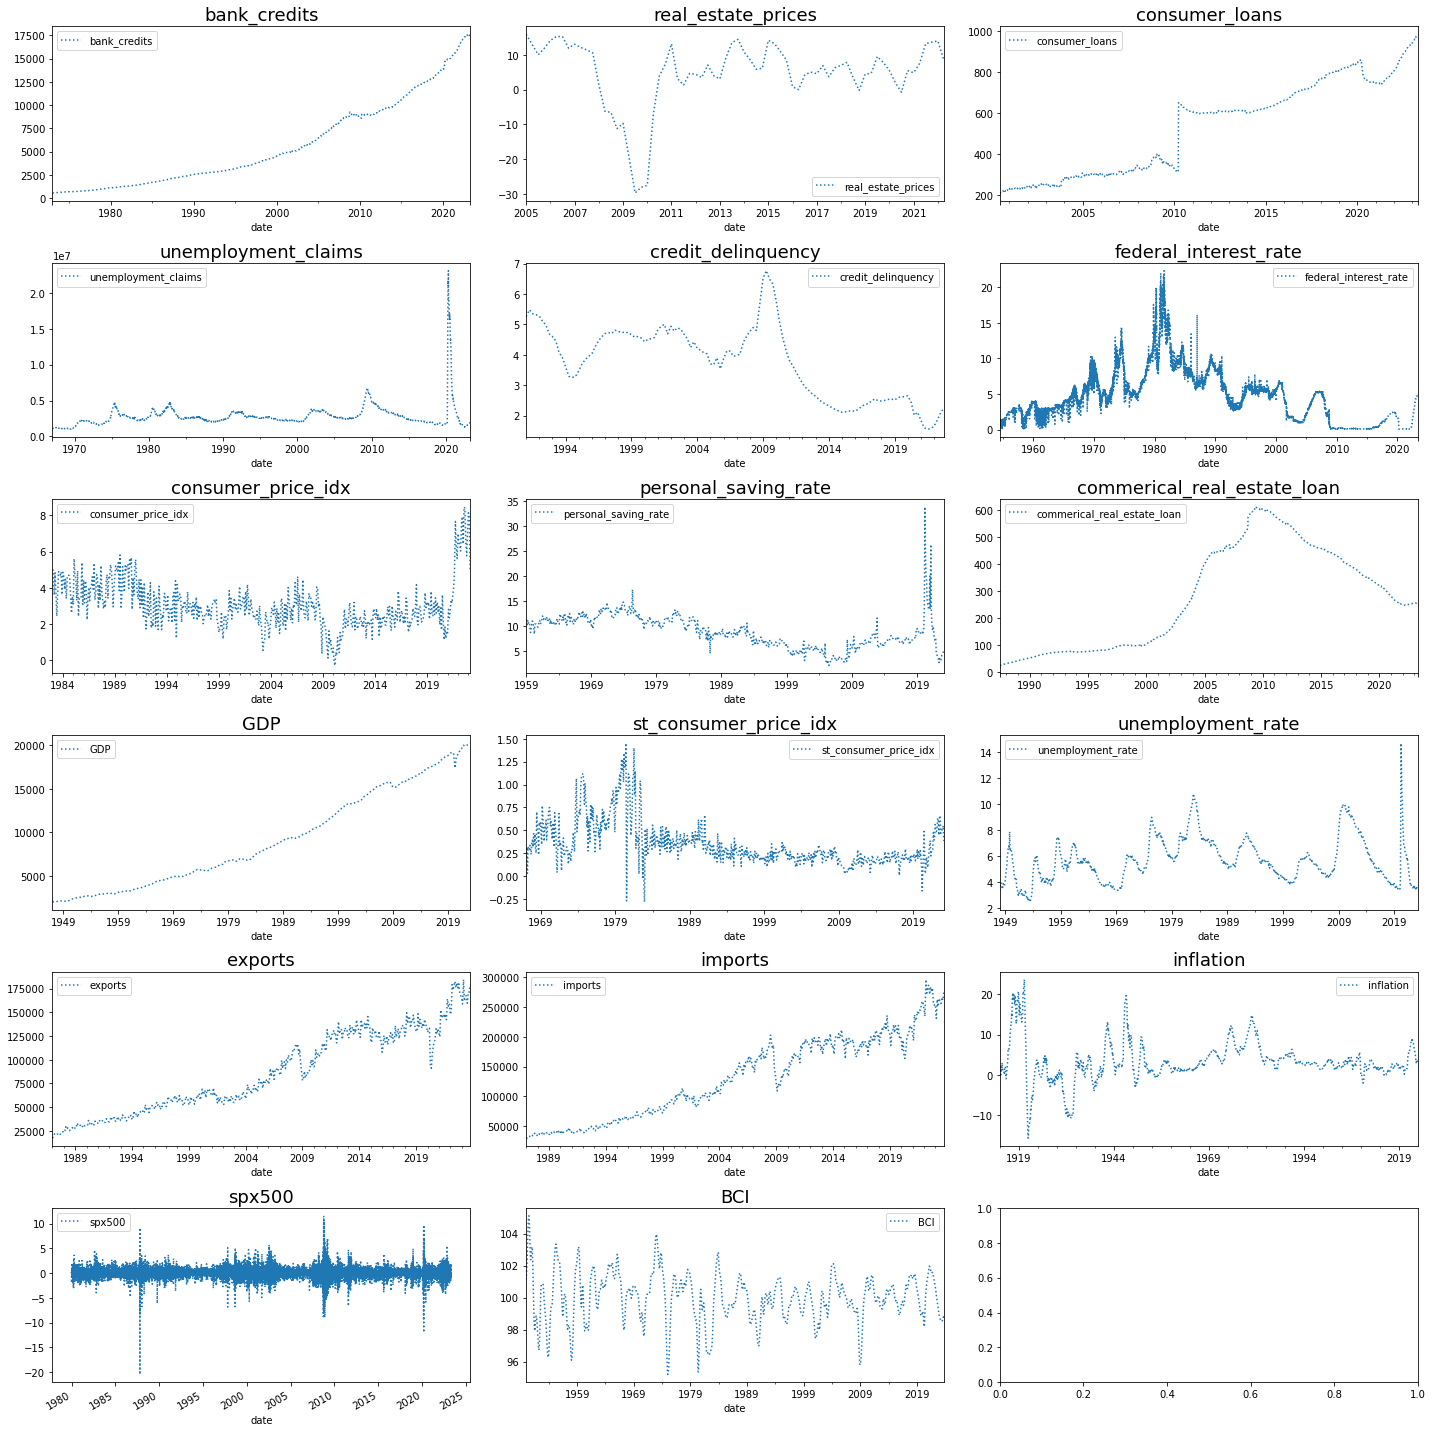

In [23]:

# Iterating through columns starting from the second column (index 1)
columns_to_plot = df.columns[1:]
num_rows = 6
num_cols = 3

# Create a 5x5 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate through columns and plot in subplots
for i, col in enumerate(columns_to_plot):
    # Create a new DataFrame with only the 'Date' and the current column and set 'Date' as the index
    df_col = df[['date', col]].dropna().set_index('date')

    # Convert the entire column to float (if it contains numeric data in text format, e.g.: houseowner_equity_RE column)
    df_col[col] = pd.to_numeric(df_col[col], errors='coerce')

    # Plot histograms for the data on the corresponding subplot
    df_col.plot(ax=axes[i], linestyle='dotted')
    axes[i].set_title(col, fontsize=18)



# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


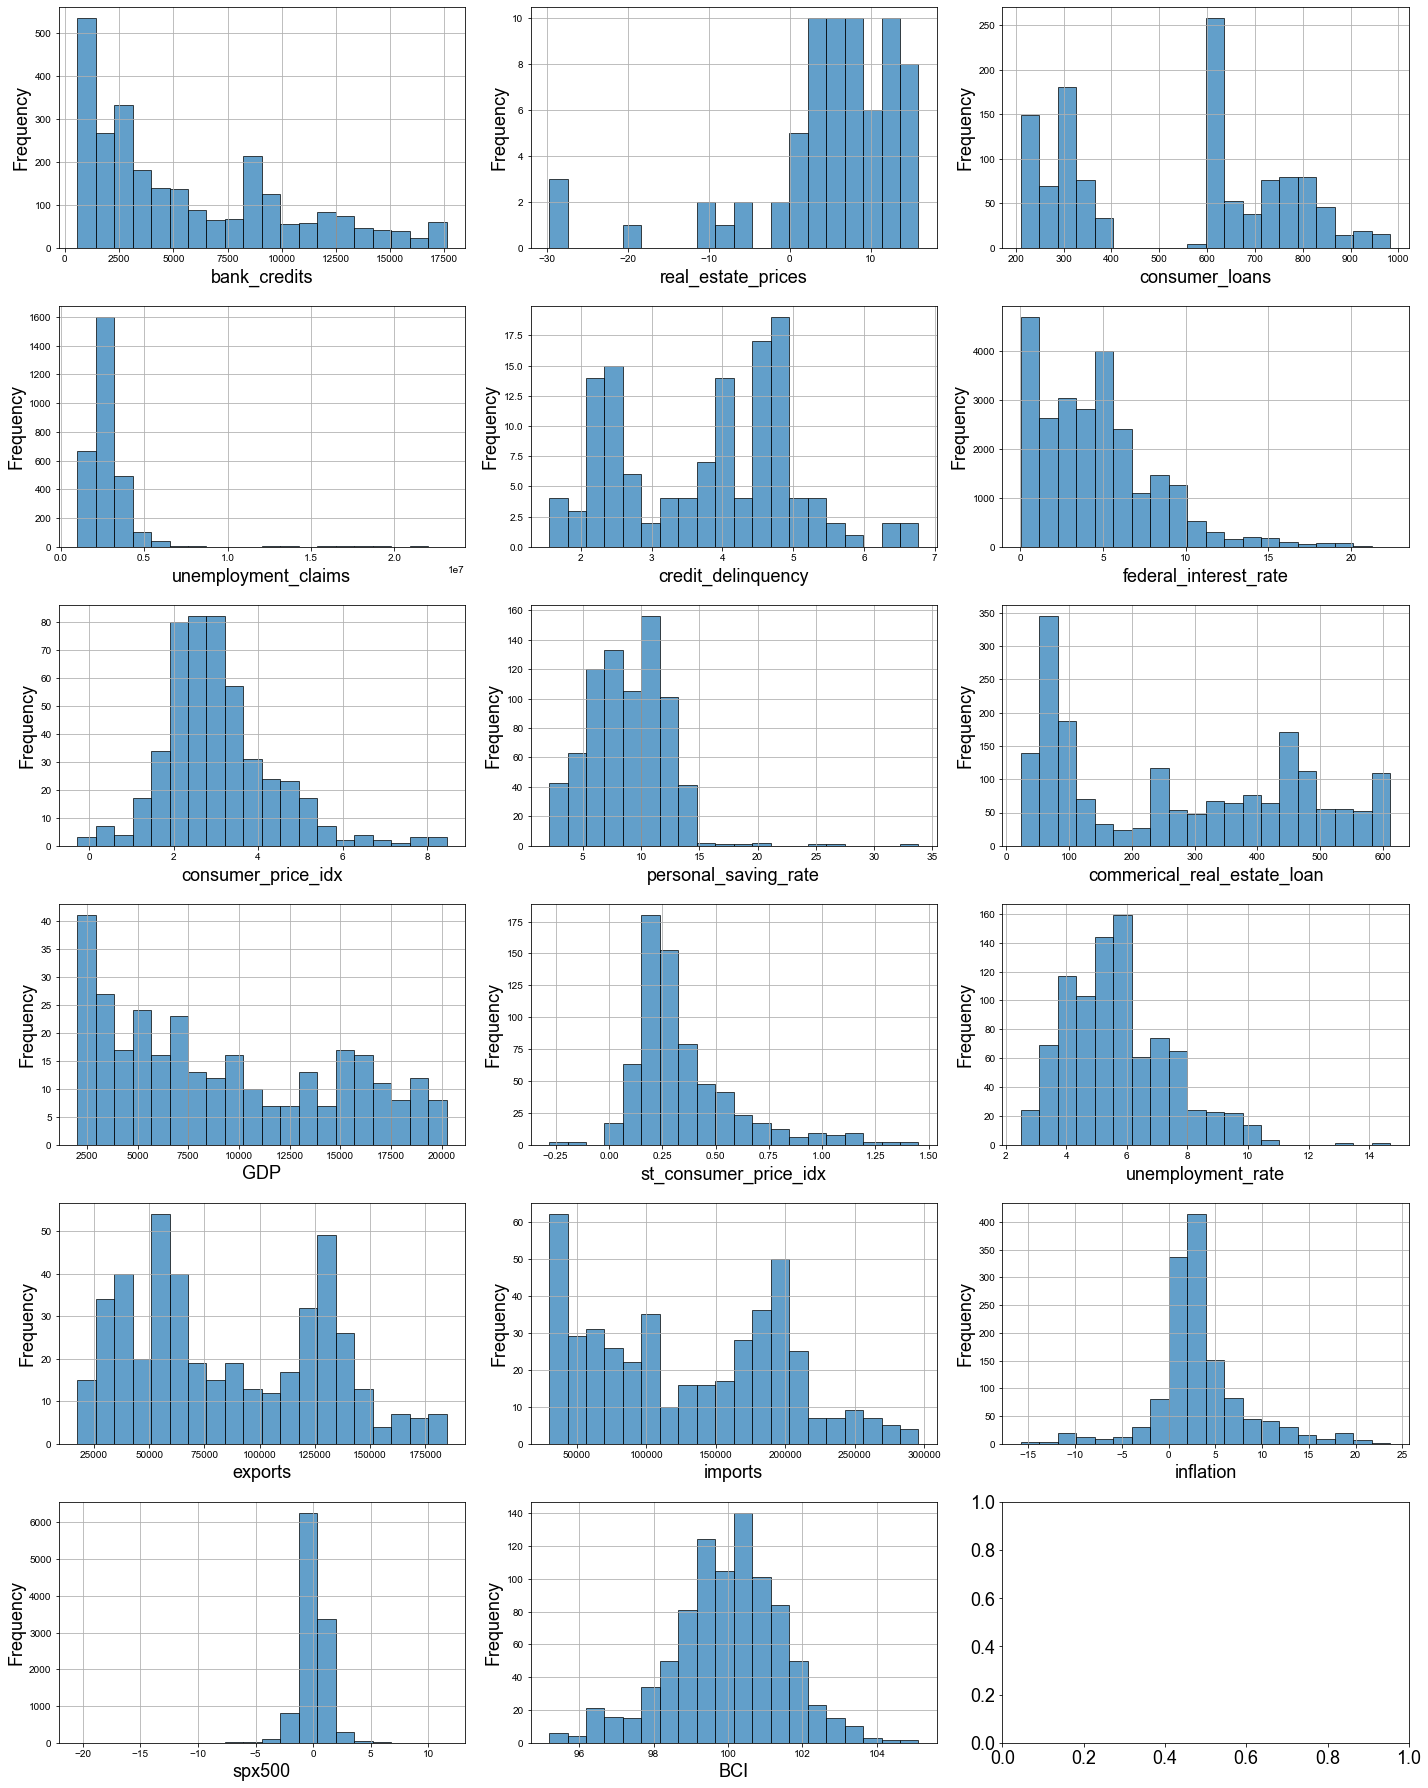

In [24]:

# Iterating through columns starting from the second column (index 1)
columns_to_plot = df.columns[1:]
num_rows = 6
num_cols = 3

# Create a 5x5 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 25))

sns.set(style="whitegrid")

# Adjusting vertical space between rows
plt.subplots_adjust(hspace=0.5)

# Flatten the axes array to simplify indexing
axes = axes.flatten()


# Iterate through columns and plot in subplots
for i, col in enumerate(columns_to_plot):
    # Create a new DataFrame with only the 'Date' and the current column and set 'Date' as the index
    df_col = df[['date', col]].dropna().set_index('date')

    # Convert the entire column to float (if it contains numeric data in text format, e.g.: houseowner_equity_RE column)
    df_col[col] = pd.to_numeric(df_col[col], errors='coerce')

    # Plot histograms for the data on the corresponding subplot
    df_col[col].plot(kind='hist', bins=20, ax=axes[i], alpha=0.7, edgecolor='black')
    
    #axes[i].set_title(col)
    
    axes[i].set_xlabel(col, fontsize=18)
    axes[i].set_ylabel('Frequency', fontsize=18)
    
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)



# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


<u><div style="text-align: center;"><font size="4"> **Data pre-processing**</font> </div></u>

<u> **Downsampling the feature recorded at frequency = daily** </u>

In [25]:
df[['date', 'federal_interest_rate']].dropna()

date  federal_interest_rate
6951  1954-07-01                   1.13
6952  1954-07-02                   1.25
6953  1954-07-03                   1.25
6954  1954-07-04                   1.25
6955  1954-07-05                   0.88
...          ...                    ...
32089 2023-04-28                   4.83
32090 2023-04-29                   4.83
32091 2023-04-30                   4.83
32092 2023-05-01                   4.83
32093 2023-05-02                   4.83

[25143 rows x 2 columns]

In [26]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Set 'date' as the index in the copy
df_copy.set_index('date', inplace=True)

# Resample to monthly and take the first value of each month
#df_monthly_fed_ir = df_copy['federal_interest_rate'].resample('MS').first().reset_index()

# Resample to monthly and take the mean value of each month
df_monthly_fed_ir = df_copy['federal_interest_rate'].dropna().resample('MS').mean().reset_index()


# Now, df_monthly_fed_ir contains the first day of each month for federal_interest_rate without changing the original df


In [27]:
df_monthly_fed_ir

date  federal_interest_rate
0   1954-07-01               0.799355
1   1954-08-01               1.220645
2   1954-09-01               1.066667
3   1954-10-01               0.848710
4   1954-11-01               0.833667
..         ...                    ...
822 2023-01-01               4.330000
823 2023-02-01               4.570000
824 2023-03-01               4.649032
825 2023-04-01               4.830000
826 2023-05-01               4.830000

[827 rows x 2 columns]

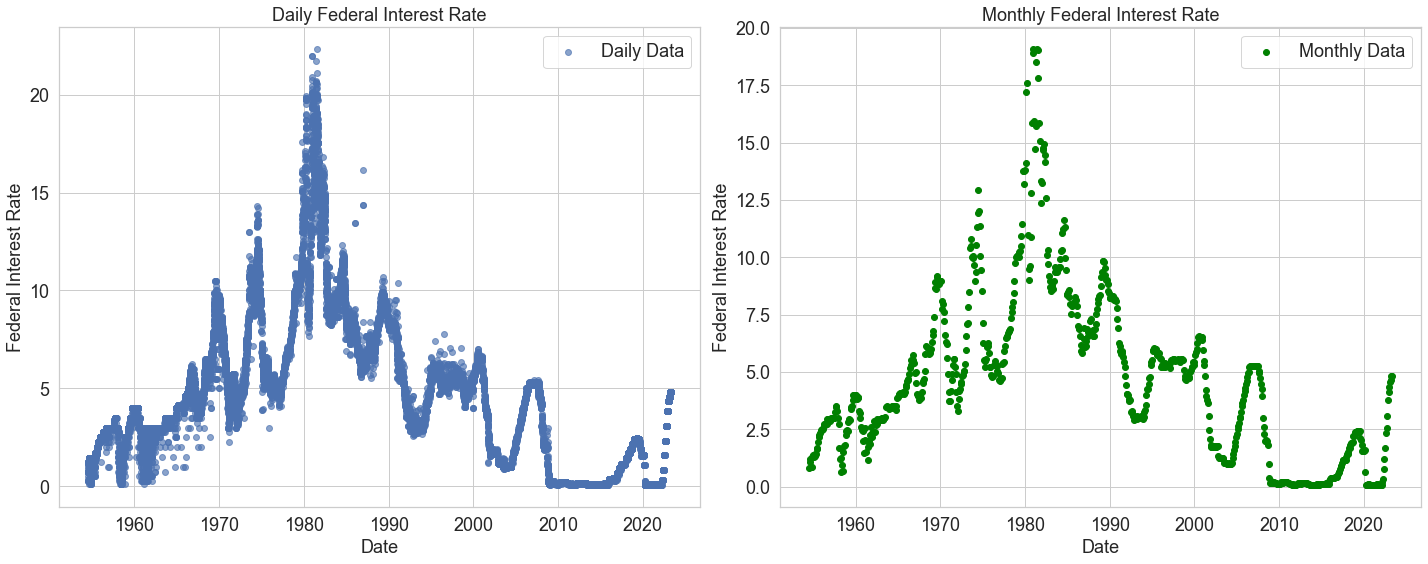

In [28]:
# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Scatter plot for daily data
axes[0].scatter(df['date'], df['federal_interest_rate'], label='Daily Data', alpha=0.65)
axes[0].set_title('Daily Federal Interest Rate', fontsize=18)
axes[0].set_xlabel('Date', fontsize=18)
axes[0].set_ylabel('Federal Interest Rate', fontsize=18)

axes[0].tick_params(axis='x', labelsize=18)
axes[0].tick_params(axis='y', labelsize=18)

# Scatter plot for resampled monthly data
axes[1].scatter(df_monthly_fed_ir['date'], df_monthly_fed_ir['federal_interest_rate'], 
                label='Monthly Data', color='green', marker='o')

axes[1].set_title('Monthly Federal Interest Rate', fontsize=18)
axes[1].set_xlabel('Date', fontsize=18)
axes[1].set_ylabel('Federal Interest Rate', fontsize=18)


plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Adding legend
axes[0].legend(fontsize=18)
axes[1].legend(fontsize=18)

# Adjust layout to prevent clipping of titles
plt.tight_layout()

plt.show()

In [29]:
## Adjusting the S&P_change % column

In [30]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Converting 'date' to datetime
df_copy['date'] = pd.to_datetime(df_copy['date'], format='%Y-%m-%d')

# Set 'date' as the index in the copy
df_copy.set_index('date', inplace=True)

# Specify the column for mean change
change_column = 'spx500'

# Resample to monthly and calculate the mean change
df_monthly_mean_change = df_copy[change_column].dropna().resample('M').mean()

# Shift the resampled values to the last day of the previous month
df_monthly_mean_change.index = df_monthly_mean_change.index - pd.offsets.MonthBegin(1)

# Create a new DataFrame with the resampled and shifted values
df_spx = pd.DataFrame({'date': df_monthly_mean_change.index, change_column: df_monthly_mean_change.values})

df_spx


date    spx500
0   1979-12-01  0.045000
1   1980-01-01  0.249130
2   1980-02-01 -0.016190
3   1980-03-01 -0.501429
4   1980-04-01  0.199524
..         ...       ...
517 2023-01-01  0.304500
518 2023-02-01 -0.134211
519 2023-03-01  0.155217
520 2023-04-01  0.080526
521 2023-05-01 -0.633333

[522 rows x 2 columns]

<u> **Downsampling the feature recorded at frequency = weekly** </u>

In [31]:
# Specifying the columns to resample and calculate the mean
weekly_columns = ['bank_credits', 'consumer_loans', 'unemployment_claims', 'commerical_real_estate_loan']

In [32]:
df_copy[weekly_columns]

bank_credits  consumer_loans  unemployment_claims  \
date                                                            
1973-01-03      567.2553             NaN                  NaN   
1973-01-10      565.5054             NaN                  NaN   
1973-01-17      565.3477             NaN                  NaN   
1973-01-24      565.1737             NaN                  NaN   
1973-01-31      569.7089             NaN                  NaN   
...                  ...             ...                  ...   
2023-06-01           NaN             NaN                  NaN   
2023-07-01           NaN             NaN                  NaN   
2023-08-01           NaN             NaN                  NaN   
2023-09-01           NaN             NaN                  NaN   
2023-10-01           NaN             NaN                  NaN   

            commerical_real_estate_loan  
date                                     
1973-01-03                          NaN  
1973-01-10                          NaN  
1973-01-17                          NaN  
1973-01-24                          NaN  
1973-01-31                          NaN  
...                                 ...  
2023-06-01                          NaN  
2023-07-01                          NaN  
2023-08-01                          NaN  
2023-09-01                          NaN  
2023-10-01                          NaN  

[51126 rows x 4 columns]

In [33]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Converting 'date' to datetime
df_copy['date'] = pd.to_datetime(df_copy['date'], format='%Y-%m-%d')

# Set 'date' as the index in the copy
df_copy.set_index('date', inplace=True)


# Create individual DataFrames for each column
for col in weekly_columns:
    # Resample to monthly and calculate the mean
    df_monthly_mean = df_copy[col].dropna().resample('M').mean()
    
    # Shift the resampled values to the first day of the month
    df_monthly_mean = df_monthly_mean.shift(1, freq='D')
    
    # Create a new DataFrame with the resampled and shifted values
    globals()[f'df_{col}'] = pd.DataFrame({'date': df_monthly_mean.index, col: df_monthly_mean.values})

# Now, I have individual DataFrames df_bank_credits, df_consumer_loans, etc., each with the mean shifted to the first day of the month


In [34]:
'''# Create a copy of the DataFrame
df_copy = df.copy()

# Converting 'date' to datetime
df_copy['date'] = pd.to_datetime(df_copy['date'], format='%Y-%m-%d')

# Set 'date' as the index in the copy
df_copy.set_index('date', inplace=True)

# Create individual DataFrames for each column
for col in weekly_columns:
    # Drop NaN values and then resample to monthly and calculate the sum
    df_monthly_sum = df_copy[col].dropna().resample('M').sum()
    
    # Shift the resampled values to the first day of the month
    df_monthly_sum = df_monthly_sum.shift(1, freq='D')
    
    # Create a new DataFrame with the resampled and shifted values
    globals()[f'df_{col}'] = pd.DataFrame({'date': df_monthly_sum.index, col: df_monthly_sum.values})

# Now, you have individual DataFrames df_bank_credits, df_consumer_loans, etc., each with the sum shifted to the first day of the month
'''

"# Create a copy of the DataFrame\ndf_copy = df.copy()\n\n# Converting 'date' to datetime\ndf_copy['date'] = pd.to_datetime(df_copy['date'], format='%Y-%m-%d')\n\n# Set 'date' as the index in the copy\ndf_copy.set_index('date', inplace=True)\n\n# Create individual DataFrames for each column\nfor col in weekly_columns:\n    # Drop NaN values and then resample to monthly and calculate the sum\n    df_monthly_sum = df_copy[col].dropna().resample('M').sum()\n    \n    # Shift the resampled values to the first day of the month\n    df_monthly_sum = df_monthly_sum.shift(1, freq='D')\n    \n    # Create a new DataFrame with the resampled and shifted values\n    globals()[f'df_{col}'] = pd.DataFrame({'date': df_monthly_sum.index, col: df_monthly_sum.values})\n\n# Now, you have individual DataFrames df_bank_credits, df_consumer_loans, etc., each with the sum shifted to the first day of the month\n"

In [35]:
df_bank_credits

date  bank_credits
0   1973-02-01    566.598200
1   1973-03-01    574.254825
2   1973-04-01    583.669400
3   1973-05-01    589.238800
4   1973-06-01    595.380660
..         ...           ...
599 2023-01-01  17514.441825
600 2023-02-01  17552.174875
601 2023-03-01  17590.481000
602 2023-04-01  17496.463520
603 2023-05-01  17327.057433

[604 rows x 2 columns]

In [36]:
df_unemployment_claims

date  unemployment_claims
0   1967-02-01            1118750.0
1   1967-03-01            1162500.0
2   1967-04-01            1243250.0
3   1967-05-01            1281000.0
4   1967-06-01            1277500.0
..         ...                  ...
671 2023-01-01            1624800.0
672 2023-02-01            1660000.0
673 2023-03-01            1734000.0
674 2023-04-01            1804000.0
675 2023-05-01            1841000.0

[676 rows x 2 columns]

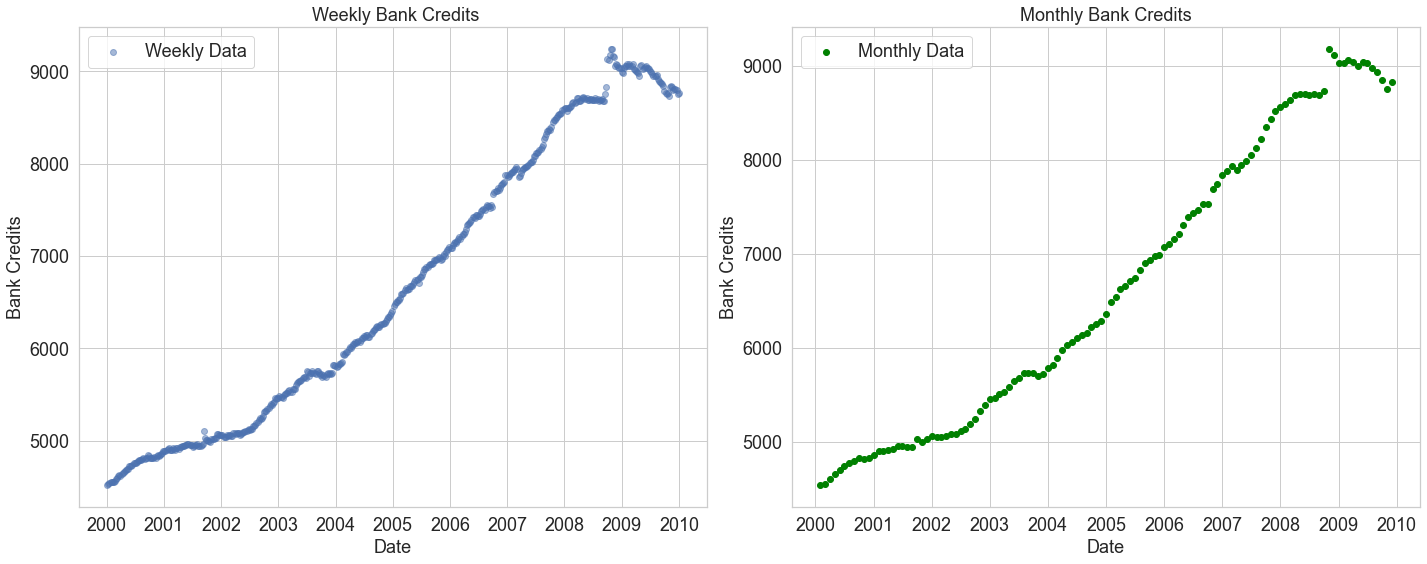

In [37]:
# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

### selecting specific years to plot
d = df[['date', 'bank_credits']][(df['date'] > '2000-01-01') & (df['date'] < '2010-01-01')].dropna()

# Scatter plot for daily data
axes[0].scatter(d['date'], d['bank_credits'], label='Weekly Data', alpha=0.5)
axes[0].set_title(' Weekly Bank Credits', fontsize=18)
axes[0].set_xlabel('Date', fontsize=18)
axes[0].set_ylabel('Bank Credits', fontsize=18)

axes[0].tick_params(axis='x', labelsize=18)
axes[0].tick_params(axis='y', labelsize=18)



### selecting specific years to plot
dm = df_bank_credits[(df_bank_credits['date'] > '2000-01-01') & 
                     (df_bank_credits['date'] < '2010-01-01')]


# Scatter plot for resampled monthly data
axes[1].scatter(dm['date'], dm['bank_credits'], label='Monthly Data', color='green', marker='o')

axes[1].set_title('Monthly Bank Credits', fontsize=18)
axes[1].set_xlabel('Date', fontsize=18)
axes[1].set_ylabel('Bank Credits', fontsize=18)


plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Adding legend
axes[0].legend(fontsize=18)
axes[1].legend(fontsize=18)

# Adjust layout to prevent clipping of titles
plt.tight_layout()

plt.show()


<u> **Upsampling the feature recorded at frequency = quarterly** </u>

In [38]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Converting 'date' to datetime
df_copy['date'] = pd.to_datetime(df_copy['date'], format='%Y-%m-%d')

# Set 'date' as the index in the copy
df_copy.set_index('date', inplace=True)

# Specify the quarterly columns
quarterly_columns = ['real_estate_prices', 'credit_delinquency', 'GDP']

# Create individual DataFrames for each quarterly column
for col in quarterly_columns:
    
    # Convert the entire column to float (if it contains numeric data in text format, e.g.: houseowner_equity_RE column)
    df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')
    
    # Resample to monthly and distribute the quarterly values evenly across the three previous months
    df_monthly_distributed = df_copy[col].dropna().resample('M').mean().transform(lambda x: x / 3).bfill()
    
    # Shift the resampled and distributed values to the first day of the month
    df_monthly_distributed = df_monthly_distributed.shift(-1, freq='D')
    
    # Explicitly set the date to the first day of the month as a string
    df_monthly_distributed.index = df_monthly_distributed.index.to_period('M').astype(str) + '-01'
    
    # Convert the index to datetime format
    df_monthly_distributed.index = pd.to_datetime(df_monthly_distributed.index, format='%Y-%m-%d')
    
    # Create a new DataFrame with the resampled and distributed values
    globals()[f'df_{col}'] = pd.DataFrame({'date': df_monthly_distributed.index, col: df_monthly_distributed.values})

# Now, I have individual DataFrames df_real_estate_prices, df_credit_delinquency, etc., each with the quarterly values distributed to the previous three months


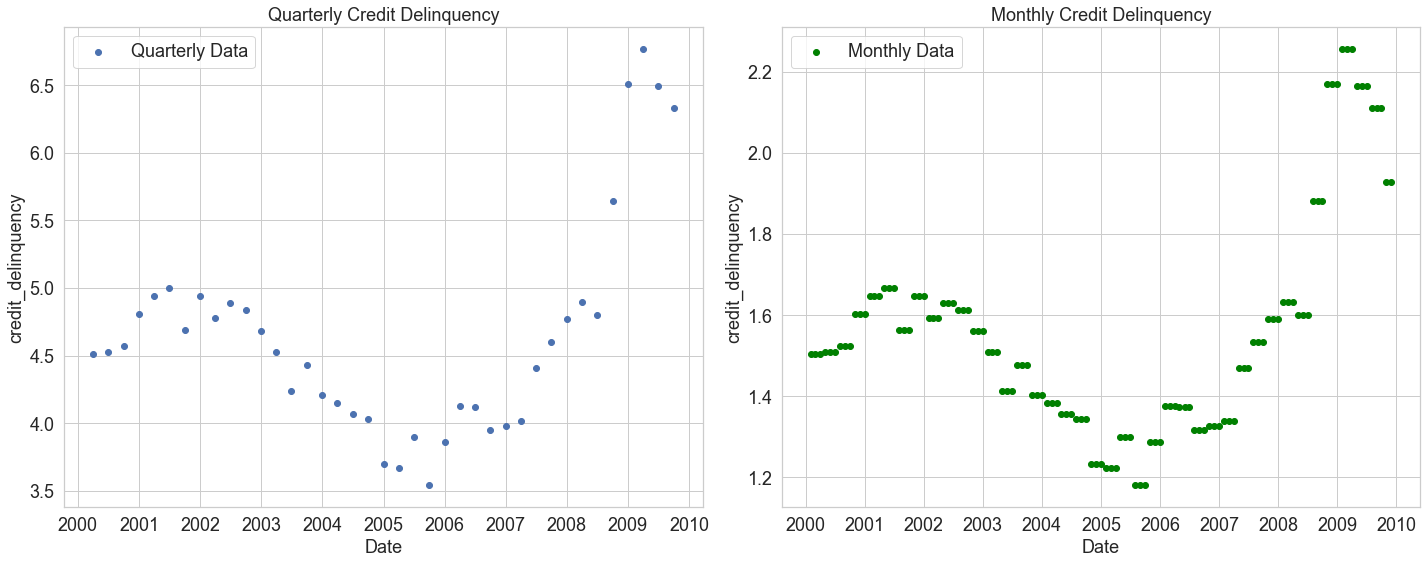

In [39]:
# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

### selecting specific years to plot
cd = df[['date', 'credit_delinquency']][(df['date'] > '2000-01-01') & (df['date'] < '2010-01-01')].dropna()

# Scatter plot for daily data
axes[0].scatter(cd['date'], cd['credit_delinquency'], label='Quarterly Data')
axes[0].set_title('Quarterly Credit Delinquency', fontsize=18)
axes[0].set_xlabel('Date', fontsize=18)
axes[0].set_ylabel('credit_delinquency', fontsize=18)

axes[0].tick_params(axis='x', labelsize=18)
axes[0].tick_params(axis='y', labelsize=18)



### selecting specific years to plot
cdm = df_credit_delinquency[['date', 'credit_delinquency']][(df_credit_delinquency['date'] > '2000-01-01') & 
                                               (df_credit_delinquency['date'] < '2010-01-01')].dropna()


# Scatter plot for resampled monthly data
axes[1].scatter(cdm['date'], cdm['credit_delinquency'], label='Monthly Data', color='green', marker='o')

axes[1].set_title('Monthly Credit Delinquency', fontsize=18)
axes[1].set_xlabel('Date', fontsize=18)
axes[1].set_ylabel('credit_delinquency', fontsize=18)


plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Adding legend
axes[0].legend(fontsize=18)
axes[1].legend(fontsize=18)

# Adjust layout to prevent clipping of titles
plt.tight_layout()

plt.show()

In [40]:
## The rest of my indicators are recorded Monthly

In [41]:
weekly_columns

['bank_credits',
 'consumer_loans',
 'unemployment_claims',
 'commerical_real_estate_loan']

In [42]:
monthly_columns = df.columns.drop(weekly_columns).drop(quarterly_columns).drop(['date', 'federal_interest_rate', 
                                                                                'spx500'])

monthly_columns

Index(['consumer_price_idx', 'personal_saving_rate', 'st_consumer_price_idx',
       'unemployment_rate', 'exports', 'imports', 'inflation', 'BCI'],
      dtype='object')

In [43]:
# Loop through each column and create a DataFrame

for col in monthly_columns:
    globals()[f'df_{col}'] = pd.DataFrame({'date': df['date'], col: df[col]}).dropna()

In [44]:
quarterly_columns

['real_estate_prices', 'credit_delinquency', 'GDP']

In [45]:
df_real_estate_prices

date  real_estate_prices
0   2005-01-01            5.297000
1   2005-02-01            4.298333
2   2005-03-01            4.298333
3   2005-04-01            4.298333
4   2005-05-01            3.339333
..         ...                 ...
203 2021-12-01            4.664333
204 2022-01-01            4.664333
205 2022-02-01            2.834667
206 2022-03-01            2.834667
207 2022-04-01            2.834667

[208 rows x 2 columns]

In [46]:
df_GDP

date          GDP
0   1947-01-01   678.150000
1   1947-02-01   676.341333
2   1947-03-01   676.341333
3   1947-04-01   676.341333
4   1947-05-01   674.944667
..         ...          ...
908 2022-09-01  6727.497000
909 2022-10-01  6727.497000
910 2022-11-01  6745.292667
911 2022-12-01  6745.292667
912 2023-01-01  6745.292667

[913 rows x 2 columns]

In [47]:
df_credit_delinquency

date  credit_delinquency
0   1991-01-01            1.753333
1   1991-02-01            1.826667
2   1991-03-01            1.826667
3   1991-04-01            1.826667
4   1991-05-01            1.783333
..         ...                 ...
377 2022-06-01            0.696667
378 2022-07-01            0.696667
379 2022-08-01            0.750000
380 2022-09-01            0.750000
381 2022-10-01            0.750000

[382 rows x 2 columns]

In [48]:
# List of all the individual dataframes created 

dfs = [df_monthly_fed_ir, df_bank_credits, df_consumer_loans, 
       df_commerical_real_estate_loan, df_real_estate_prices, df_credit_delinquency,
       df_GDP, df_inflation, df_exports, df_imports, df_spx, df_consumer_price_idx, 
       df_personal_saving_rate, df_st_consumer_price_idx, df_unemployment_claims, 
       df_unemployment_rate, df_BCI]

# Merge DataFrames one by one using reduce
from functools import reduce

# Define a function to merge two DataFrames
def merge_dataframes(left, right):
    return pd.merge(left, right, on='date', how='outer')

# Use reduce to apply the merging function to all DataFrames in the list
df_final = reduce(merge_dataframes, dfs)

# Sort the DataFrame by the 'date' column
df_final.sort_values('date', inplace=True)

# Optionally, reset the index if needed
df_final.reset_index(drop=True, inplace=True)


In [49]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         1319 non-null   datetime64[ns]
 1   federal_interest_rate        827 non-null    float64       
 2   bank_credits                 604 non-null    float64       
 3   consumer_loans               275 non-null    float64       
 4   commerical_real_estate_loan  431 non-null    float64       
 5   real_estate_prices           208 non-null    float64       
 6   credit_delinquency           382 non-null    float64       
 7   GDP                          913 non-null    float64       
 8   inflation                    1319 non-null   float64       
 9   exports                      442 non-null    float64       
 10  imports                      442 non-null    float64       
 11  spx500                       522 non-null  

In [50]:
df_final.describe()

federal_interest_rate  bank_credits  consumer_loans  \
count             827.000000    604.000000      275.000000   
mean                4.595588   5656.902105      531.405427   
std                 3.607027   4607.753677      224.898505   
min                 0.049000    566.598200      211.498400   
25%                 1.759817   1788.402314      301.717562   
50%                 4.138387   3970.788825      604.219425   
75%                 6.260282   8997.117159      729.410530   
max                19.099667  17590.481000      978.644367   

       commerical_real_estate_loan  real_estate_prices  credit_delinquency  \
count                   431.000000          208.000000          382.000000   
mean                    276.301502            1.536952            1.251684   
std                     188.200322            3.234795            0.404615   
min                      23.765800           -9.915667            0.516667   
25%                      80.959540            1.042333            0.843333   
50%                     256.695325            2.043667            1.326667   
75%                     448.841510            3.685833            1.563333   
max                     611.464025            5.297000            2.256667   

               GDP    inflation        exports        imports      spx500  \
count   913.000000  1319.000000     442.000000     442.000000  522.000000   
mean   3054.156768     3.283472   85702.657327  130383.824253    0.037960   
std    1828.552951     4.939923   43158.179420   69238.719993    0.209001   
min     674.944667   -15.800000   17345.900000   29810.300000   -0.939091   
25%    1469.839333     1.200000   51227.975000   64504.925000   -0.077821   
50%    2609.753333     2.700000   75095.365980  127436.500000    0.059262   
75%    4737.446667     4.700000  126617.993450  190044.625000    0.167905   
max    6745.292667    23.700000  184620.504300  295975.400000    0.602857   

       consumer_price_idx  personal_saving_rate  st_consumer_price_idx  \
count          483.000000            771.000000             675.000000   
mean             3.046382              8.853178               0.351171   
std              1.318785              3.266473               0.244954   
min             -0.286064              2.100000              -0.281040   
25%              2.238369              6.500000               0.201632   
50%              2.857474              8.700000               0.277530   
75%              3.613128             11.200000               0.439245   
max              8.463917             33.800000               1.451640   

       unemployment_claims  unemployment_rate         BCI  
count         6.760000e+02         904.000000  886.000000  
mean          2.776597e+06           5.723119  100.000000  
std           1.585659e+06           1.705813    1.524036  
min           1.004400e+06           2.500000   95.191620  
25%           2.122750e+06           4.400000   99.132650  
50%           2.544750e+06           5.500000  100.103750  
75%           3.074500e+06           6.800000  100.952450  
max           2.032640e+07          14.700000  105.118500

In [51]:
df[['date', 'federal_interest_rate']].dropna()

date  federal_interest_rate
6951  1954-07-01                   1.13
6952  1954-07-02                   1.25
6953  1954-07-03                   1.25
6954  1954-07-04                   1.25
6955  1954-07-05                   0.88
...          ...                    ...
32089 2023-04-28                   4.83
32090 2023-04-29                   4.83
32091 2023-04-30                   4.83
32092 2023-05-01                   4.83
32093 2023-05-02                   4.83

[25143 rows x 2 columns]

In [52]:
df_final['consumer_price_idx'].dropna()

828     5.014653
829     4.952545
830     3.612261
831     4.828054
832     3.767326
          ...   
1306    5.765770
1307    7.049161
1308    8.142495
1309    7.880496
1310    4.907055
Name: consumer_price_idx, Length: 483, dtype: float64

In [53]:
dates_not_nan = df_final.loc[df_final['BCI'].notna(), 'date']
dates_not_nan

432    1950-01-01
433    1950-02-01
434    1950-03-01
435    1950-04-01
436    1950-05-01
          ...    
1313   2023-06-01
1314   2023-07-01
1315   2023-08-01
1316   2023-09-01
1317   2023-10-01
Name: date, Length: 886, dtype: datetime64[ns]

In [54]:
df_monthly_fed_ir

date  federal_interest_rate
0   1954-07-01               0.799355
1   1954-08-01               1.220645
2   1954-09-01               1.066667
3   1954-10-01               0.848710
4   1954-11-01               0.833667
..         ...                    ...
822 2023-01-01               4.330000
823 2023-02-01               4.570000
824 2023-03-01               4.649032
825 2023-04-01               4.830000
826 2023-05-01               4.830000

[827 rows x 2 columns]

In [55]:
df_final.dropna()

date  federal_interest_rate  bank_credits  consumer_loans  \
1092 2005-01-01               2.279355   6362.678460      294.221980   
1093 2005-02-01               2.501786   6485.933825      305.340275   
1094 2005-03-01               2.629032   6543.691125      298.703600   
1095 2005-04-01               2.785000   6621.203680      299.910600   
1096 2005-05-01               3.002581   6658.095475      301.419225   
...         ...                    ...           ...             ...   
1295 2021-12-01               0.079677  16184.150925      790.846550   
1296 2022-01-01               0.079355  16371.800260      801.892240   
1297 2022-02-01               0.080000  16573.310275      809.084500   
1298 2022-03-01               0.200968  16647.632275      817.480825   
1299 2022-04-01               0.330000  16800.620640      835.515060   

      commerical_real_estate_loan  real_estate_prices  credit_delinquency  \
1092                   394.535680            5.297000            1.233333   
1093                   401.945550            4.298333            1.223333   
1094                   407.225100            4.298333            1.223333   
1095                   414.754320            4.298333            1.223333   
1096                   420.762675            3.339333            1.300000   
...                           ...                 ...                 ...   
1295                   251.157800            4.664333            0.550000   
1296                   249.258460            4.664333            0.550000   
1297                   247.646250            2.834667            0.616667   
1298                   247.310125            2.834667            0.616667   
1299                   247.421260            2.834667            0.616667   

              GDP  inflation       exports   imports    spx500  \
1092  4922.615333        3.0   66149.06287  122900.0 -0.125000   
1093  4946.569000        3.0   68256.31114  122233.0  0.101053   
1094  4946.569000        3.1   79512.57783  135451.0 -0.085909   
1095  4946.569000        3.5   75914.35714  135456.0 -0.092381   
1096  4985.430333        2.8   75852.41627  136191.0  0.142857   
...           ...        ...           ...       ...       ...   
1295  6641.362667        7.0  159331.91920  257092.8  0.199545   
1296  6641.362667        7.5  147848.03920  247065.3 -0.262500   
1297  6631.757000        7.9  150555.18210  234218.6 -0.157368   
1298  6631.757000        8.5  179313.75560  295975.4  0.162609   
1299  6631.757000        8.3  173533.94270  273176.8 -0.447500   

      consumer_price_idx  personal_saving_rate  st_consumer_price_idx  \
1092            3.421759                   3.2               0.256754   
1093            3.304002                   2.9               0.221033   
1094            1.897179                   3.1               0.174295   
1095            2.096479                   2.7               0.211437   
1096            3.168462                   3.2               0.234810   
...                  ...                   ...                    ...   
1295            5.611797                   7.5               0.396000   
1296            6.992826                   4.7               0.564420   
1297            6.519555                   4.5               0.513390   
1298            6.350249                   3.8               0.486540   
1299            6.030320                   3.6               0.507920   

      unemployment_claims  unemployment_rate        BCI  
1092            2719000.0                5.3  100.74720  
1093            2723800.0                5.4  100.54930  
1094            2686500.0                5.2  100.33450  
1095            2659500.0                5.2  100.10790  
1096            2604400.0                5.1   99.99591  
...                   ...                ...        ...  
1295            1993500.0                3.9  101.29410  
1296            1791500.0                4.0  101.11880  
1297            1778000.0    

In [56]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         1319 non-null   datetime64[ns]
 1   federal_interest_rate        827 non-null    float64       
 2   bank_credits                 604 non-null    float64       
 3   consumer_loans               275 non-null    float64       
 4   commerical_real_estate_loan  431 non-null    float64       
 5   real_estate_prices           208 non-null    float64       
 6   credit_delinquency           382 non-null    float64       
 7   GDP                          913 non-null    float64       
 8   inflation                    1319 non-null   float64       
 9   exports                      442 non-null    float64       
 10  imports                      442 non-null    float64       
 11  spx500                       522 non-null  

In [57]:
time_interval = (df_final['date'] >= '2000-01-01') & (df_final['date'] <= '2020-12-31')

df_2 = df_final[time_interval]

In [58]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 1032 to 1283
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         252 non-null    datetime64[ns]
 1   federal_interest_rate        252 non-null    float64       
 2   bank_credits                 252 non-null    float64       
 3   consumer_loans               246 non-null    float64       
 4   commerical_real_estate_loan  252 non-null    float64       
 5   real_estate_prices           192 non-null    float64       
 6   credit_delinquency           252 non-null    float64       
 7   GDP                          252 non-null    float64       
 8   inflation                    252 non-null    float64       
 9   exports                      252 non-null    float64       
 10  imports                      252 non-null    float64       
 11  spx500                       252 non-null

In [59]:
df_final_interval = df_2.dropna()
df_final_interval

date  federal_interest_rate  bank_credits  consumer_loans  \
1092 2005-01-01               2.279355   6362.678460      294.221980   
1093 2005-02-01               2.501786   6485.933825      305.340275   
1094 2005-03-01               2.629032   6543.691125      298.703600   
1095 2005-04-01               2.785000   6621.203680      299.910600   
1096 2005-05-01               3.002581   6658.095475      301.419225   
...         ...                    ...           ...             ...   
1279 2020-08-01               0.095161  14889.342480      758.985940   
1280 2020-09-01               0.090000  14909.631375      754.169875   
1281 2020-10-01               0.090000  14951.380240      751.783340   
1282 2020-11-01               0.086333  14944.518000      750.884750   
1283 2020-12-01               0.090000  15001.266700      750.309775   

      commerical_real_estate_loan  real_estate_prices  credit_delinquency  \
1092                   394.535680            5.297000            1.233333   
1093                   401.945550            4.298333            1.223333   
1094                   407.225100            4.298333            1.223333   
1095                   414.754320            4.298333            1.223333   
1096                   420.762675            3.339333            1.300000   
...                           ...                 ...                 ...   
1279                   303.479740            1.816667            0.703333   
1280                   299.350175            1.816667            0.703333   
1281                   295.114820            1.816667            0.703333   
1282                   290.741325            1.615667            0.616667   
1283                   286.645775            1.615667            0.616667   

              GDP  inflation       exports   imports    spx500  \
1092  4922.615333        3.0   66149.06287  122900.0 -0.125000   
1093  4946.569000        3.0   68256.31114  122233.0  0.101053   
1094  4946.569000        3.1   79512.57783  135451.0 -0.085909   
1095  4946.569000        3.5   75914.35714  135456.0 -0.092381   
1096  4985.430333        2.8   75852.41627  136191.0  0.142857   
...           ...        ...           ...       ...       ...   
1279  6308.087333        1.3  118351.81560  203112.0  0.323333   
1280  6308.087333        1.4  121447.90030  206083.7 -0.179048   
1281  6308.087333        1.2  132638.49270  218952.6 -0.119545   
1282  6405.408000        1.2  127232.20810  212453.3  0.516000   
1283  6405.408000        1.4  132631.01060  214876.8  0.166818   

      consumer_price_idx  personal_saving_rate  st_consumer_price_idx  \
1092            3.421759                   3.2               0.256754   
1093            3.304002                   2.9               0.221033   
1094            1.897179                   3.1               0.174295   
1095            2.096479                   2.7               0.211437   
1096            3.168462                   3.2               0.234810   
...                  ...                   ...                    ...   
1279            2.235723                  15.5               0.249040   
1280            1.133933                  14.6               0.027610   
1281            1.838456                  14.0               0.087690   
1282            1.218911                  13.3               0.207200   
1283            1.624482                  13.8               0.138200   

      unemployment_claims  unemployment_rate        BCI  
1092            2719000.0                5.3  100.74720  
1093            2723800.0                5.4  100.54930  
1094            2686500.0                5.2  100.33450  
1095            2659500.0                5.2  100.10790  
1096            2604400.0                5.1   99.99591  
...                   ...                ...        ...  
1279           16563000.0                8.4  100.41090  
1280           14013400.0                7.9  100.71070  
1281           11824250.0    

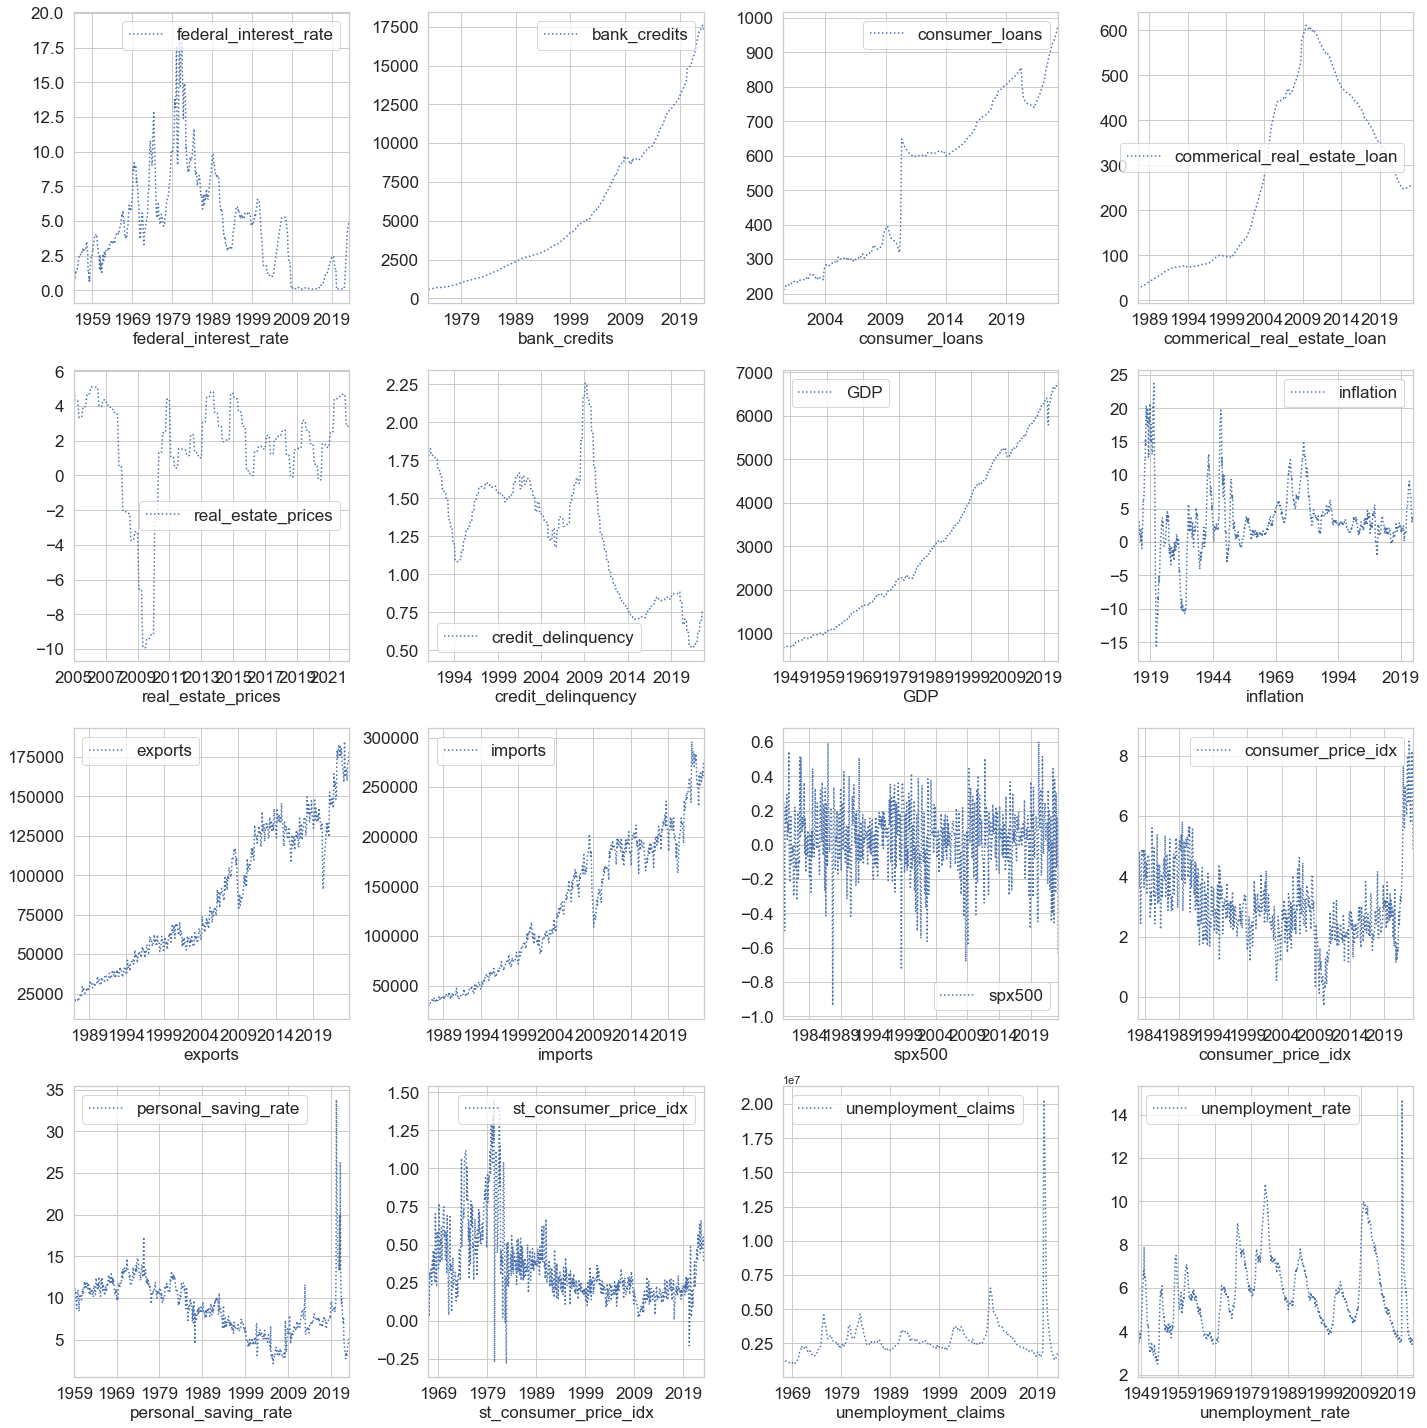

In [60]:

# Iterating through columns starting from the second column (index 1)
columns_to_plot = df_final.columns[1:-1]
num_rows = 4
num_cols = 4

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterating through columns and plot in subplots
for i, col in enumerate(columns_to_plot):
    # Create a new DataFrame with only the 'date' and the current column and set 'date' as the index
    df_col = df_final[['date', col]].dropna().set_index('date')

    # Convert the entire column to float (if it contains numeric data in text format, e.g.: houseowner_equity_RE column)
    df_col[col] = pd.to_numeric(df_col[col], errors='coerce')

    # Plot the data on the corresponding subplot
    df_col.plot(ax=axes[i], linestyle='dotted', fontsize=17)
    #df_col.plot(ax=axes[i], fontsize=17)
    #axes[i].set_title(col)
    axes[i].set_xlabel(col, fontsize=17)
    axes[i].legend(fontsize=17)

# Adjusting layout
plt.tight_layout()

# Show the plots
plt.show()


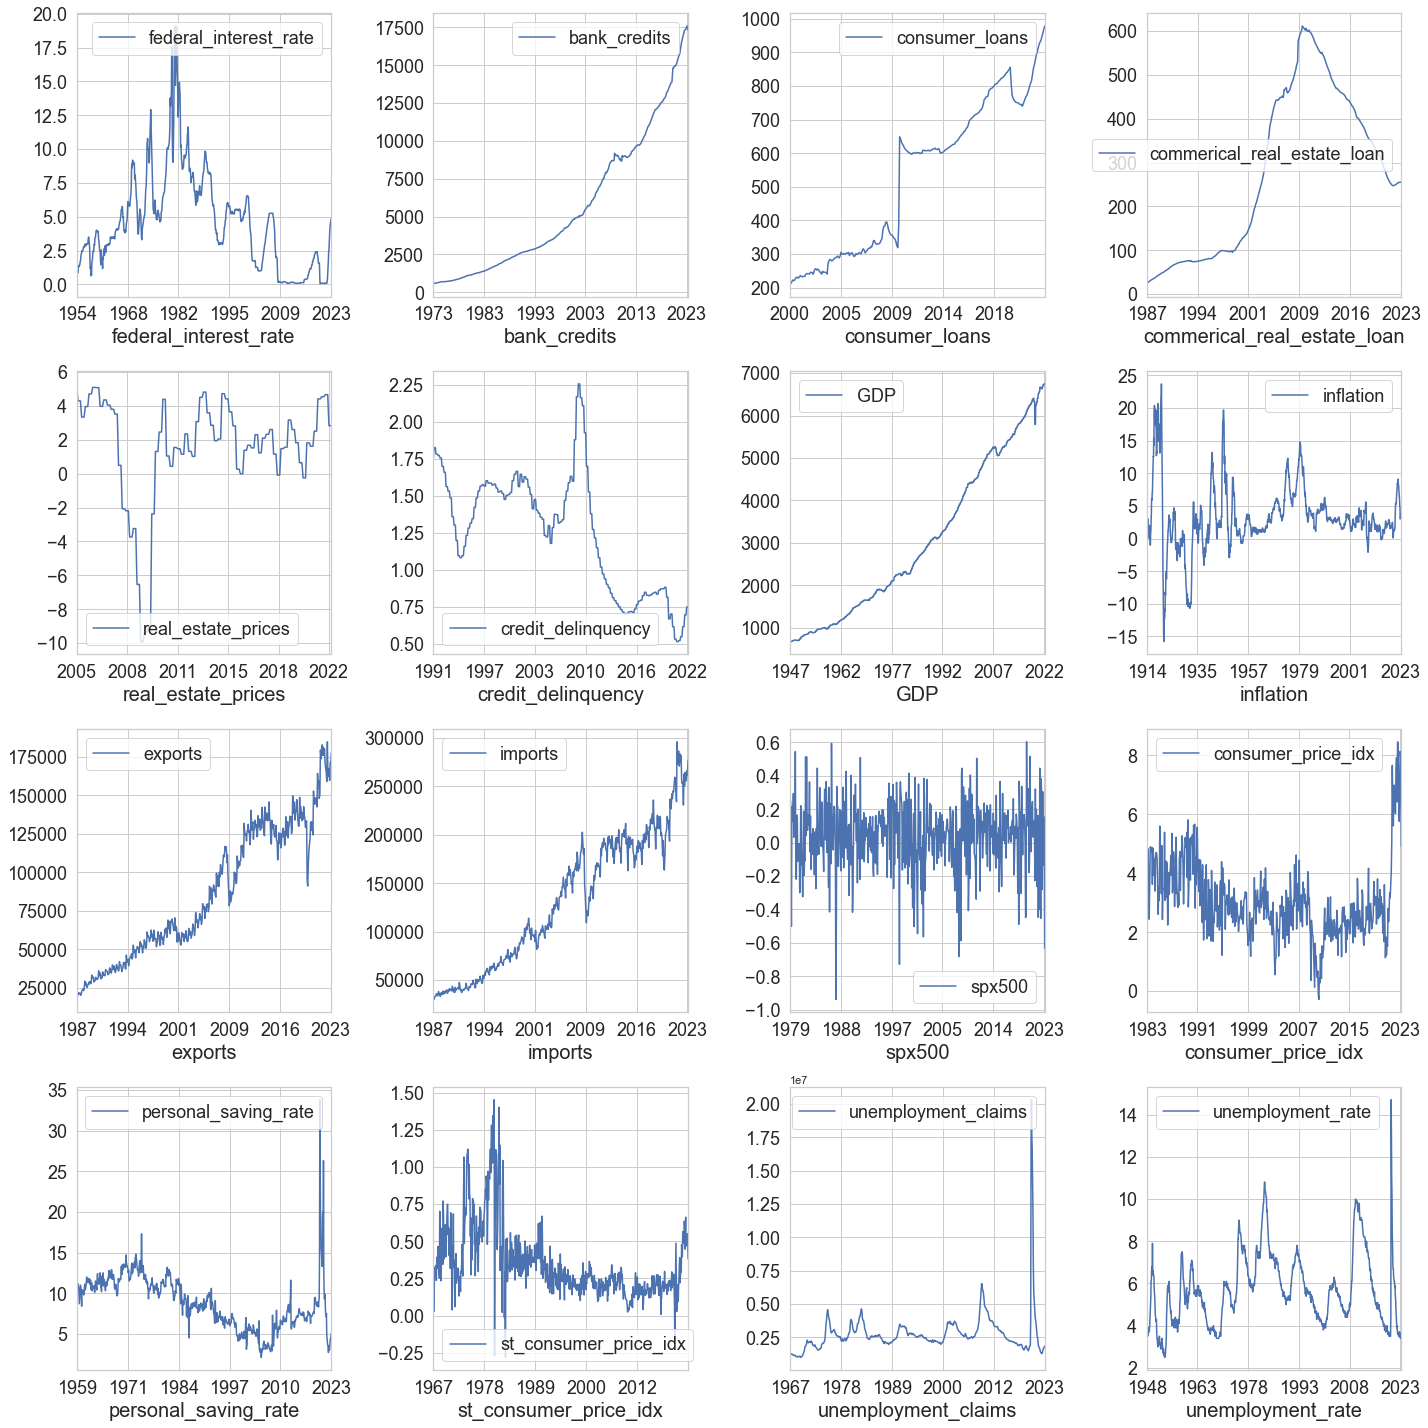

In [61]:
# Iterating through columns starting from the second column (index 1)
columns_to_plot = df_final.columns[1:-1]
num_rows = 4
num_cols = 4

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate through columns and plot in subplots
for i, col in enumerate(columns_to_plot):
    # Create a new DataFrame with only the 'date' and the current column and set 'date' as the index
    df_col = df_final[['date', col]].dropna().set_index('date')

    # Convert the entire column to float (if it contains numeric data in text format, e.g.: houseowner_equity_RE column)
    df_col[col] = pd.to_numeric(df_col[col], errors='coerce')

    # Plot the data on the corresponding subplot
    #df_col.plot(ax=axes[i], linestyle='dotted', fontsize=18)
    df_col.plot(ax=axes[i], fontsize=18)
    
    # Set xticks and labels to display 6 or 7 ticks
    x_ticks = df_col.index[::len(df_col.index)//5]
    x_tick_labels = [date.strftime('%Y') for date in x_ticks]  # Use '%Y' for year-only format
    axes[i].set_xticks(x_ticks)
    axes[i].set_xticklabels(x_tick_labels)
    
    axes[i].set_xlabel(col, fontsize=20)
    axes[i].legend(fontsize=18)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


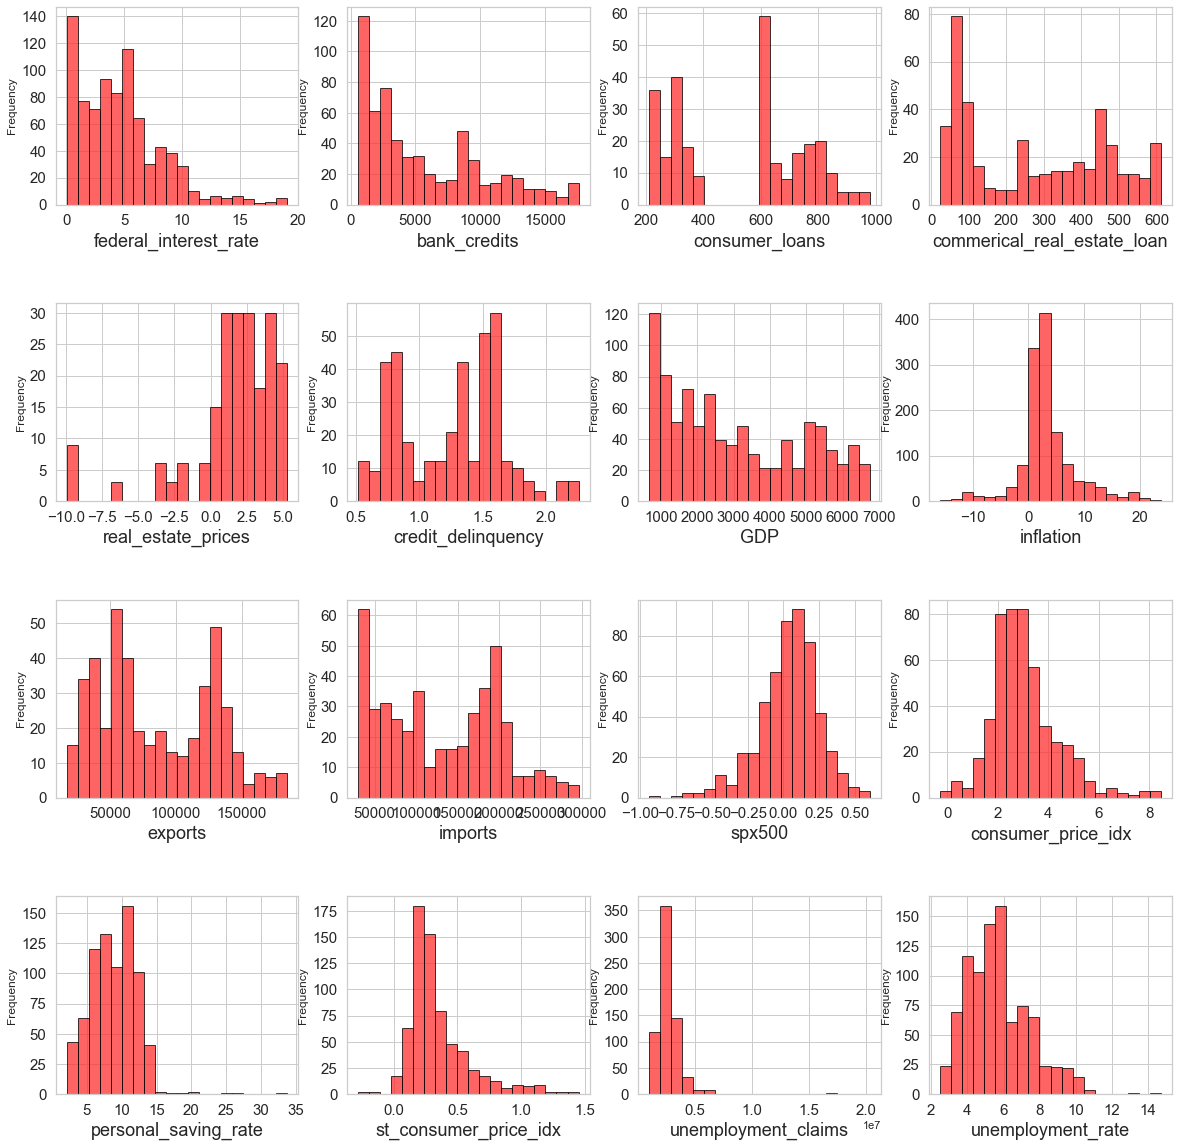

In [62]:

# Iterating through columns starting from the second column (index 1)
columns_to_plot = df_final.columns[1:-1]
num_rows = 4
num_cols = 4

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Adjust vertical space between rows
plt.subplots_adjust(hspace=0.5)

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate through columns and plot in subplots
for i, col in enumerate(columns_to_plot):
    # Create a new DataFrame with only the 'date' and the current column and set 'date' as the index
    df_col = df_final[['date', col]].dropna().set_index('date')

    # Convert the entire column to float (if it contains numeric data in text format, e.g.: houseowner_equity_RE column)
    df_col[col] = pd.to_numeric(df_col[col], errors='coerce')

    # Plot the data on the corresponding subplot
    df_col[col].plot(kind='hist', bins=20, ax=axes[i], color='#FE302F', 
                     alpha=0.75, edgecolor='black', fontsize=15)
    
    axes[i].set_xlabel(col, fontsize=18)

# Adjust layout
#plt.tight_layout()

# Show the plots
plt.show()


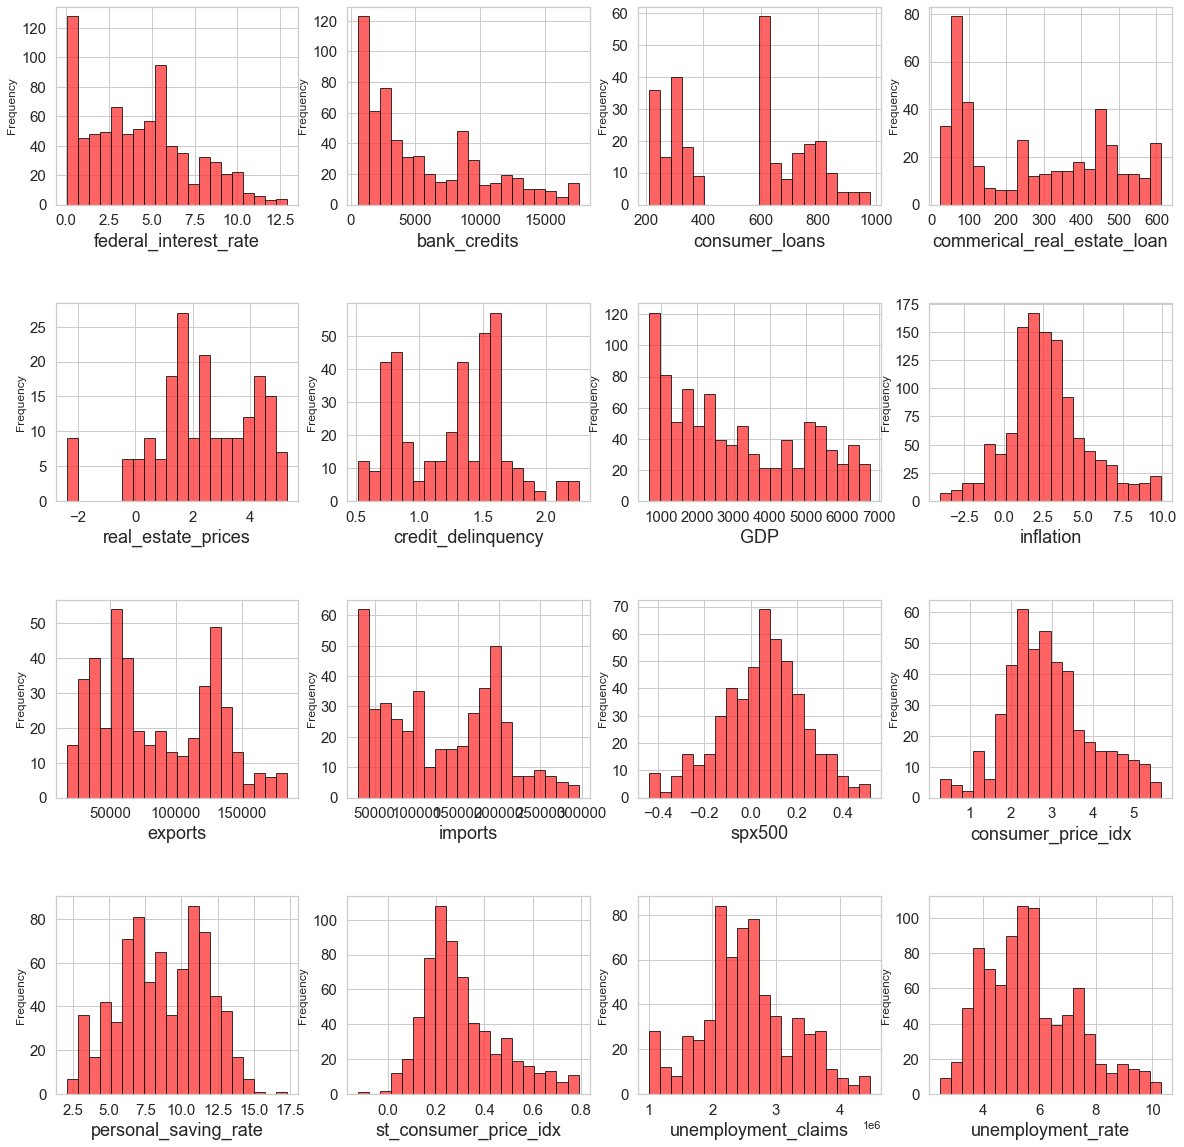

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to detect and remove outliers using IQR
def remove_outliers(data, col, threshold=1.5):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    
    # Identify and remove outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    data_no_outliers = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    
    return data_no_outliers, outliers

# Iterating through columns starting from the second column (index 1)
columns_to_plot = df_final.columns[1:-1]
num_rows = 4
num_cols = 4

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Adjust vertical space between rows
plt.subplots_adjust(hspace=0.5)

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate through columns and plot in subplots
for i, col in enumerate(columns_to_plot):
    # Create a new DataFrame with only the 'date' and the current column and set 'date' as the index
    df_col = df_final[['date', col]].dropna().set_index('date')

    # Convert the entire column to float (if it contains numeric data in text format, e.g.: houseowner_equity_RE column)
    df_col[col] = pd.to_numeric(df_col[col], errors='coerce')
    
    # Remove outliers using the remove_outliers function
    df_no_outliers, outliers = remove_outliers(df_col, col)
    
    # Plot the histogram without outliers
    df_no_outliers[col].plot(kind='hist', bins=20, ax=axes[i], color='#FE302F', 
                             alpha=0.75, edgecolor='black', fontsize=15)
    
    axes[i].set_xlabel(col, fontsize=18)

# Adjust layout
#plt.tight_layout()

# Show the plots
plt.show()


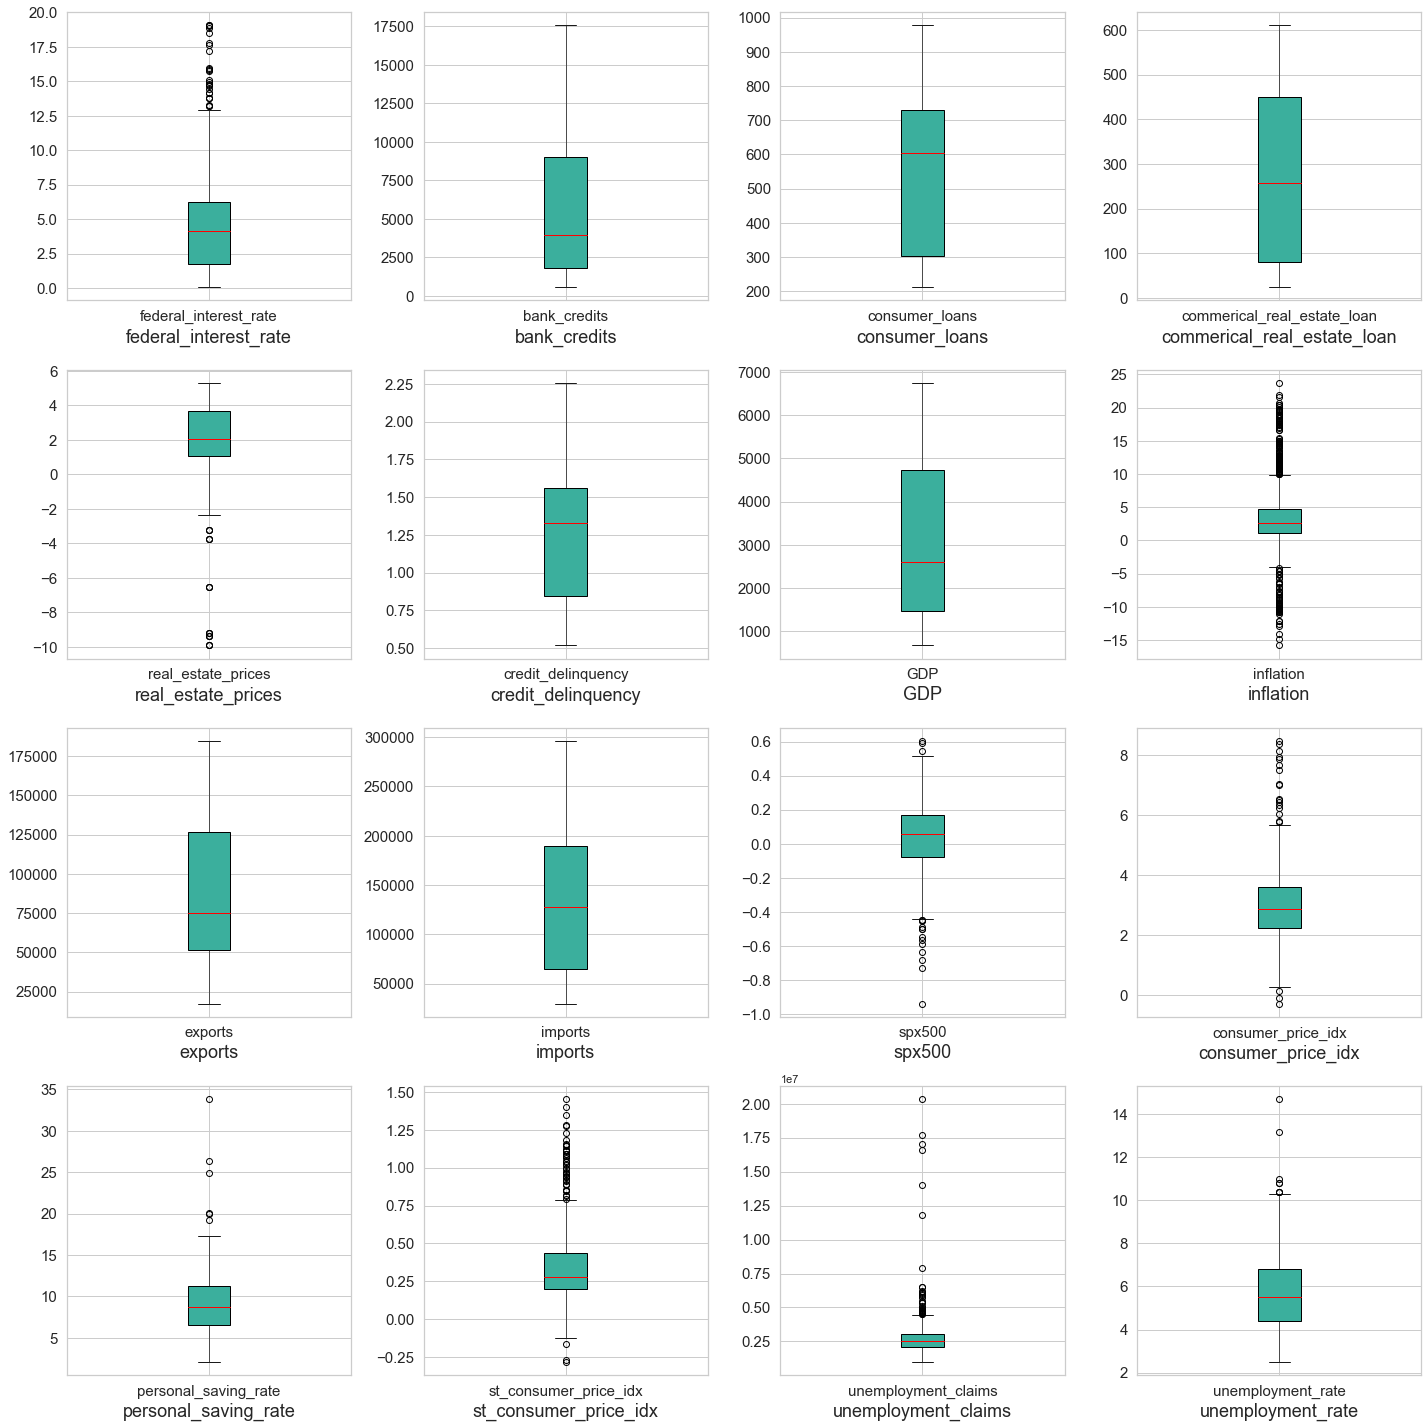

In [64]:
# Iterating through columns starting from the second column (index 1)
columns_to_plot = df_final.columns[1:-1]
num_rows = 4
num_cols = 4

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Adjust vertical space between rows
plt.subplots_adjust(hspace=0.5)

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Define colors for the boxplots
colors = ['#FE302F', '#3BAF9D']

# Iterate through columns and plot in subplots
for i, col in enumerate(columns_to_plot):
    # Create a new DataFrame with only the 'date' and the current column
    df_col = df_final[['date', col]].dropna()

    # Convert the entire column to float (if it contains numeric data in text format, e.g.: houseowner_equity_RE column)
    df_col[col] = pd.to_numeric(df_col[col], errors='coerce')

    # Plot the data using a vertical boxplot with two colors for second and third quartiles
    bp = df_col.boxplot(column=col, ax=axes[i], fontsize=15, vert=True, patch_artist=True,
                       boxprops=dict(facecolor=colors[0]),
                       medianprops=dict(color='red'))  # Set color of the median line

    # Set different color for the third quartile
    for patch in bp.artists:
        patch.set_facecolor(colors[1])

    axes[i].set_xlabel(col, fontsize=18)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [65]:
#sns.pairplot(df_final_interval.iloc[:, 1:-1], height=2.5)

<AxesSubplot:ylabel='Frequency'>

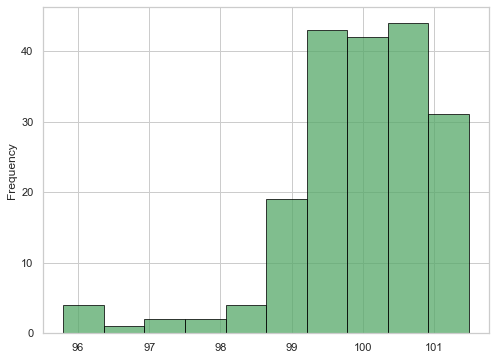

In [66]:
df_final_interval['BCI'].plot(kind='hist', figsize=(8,6), alpha=0.75, color='g', edgecolor='black')

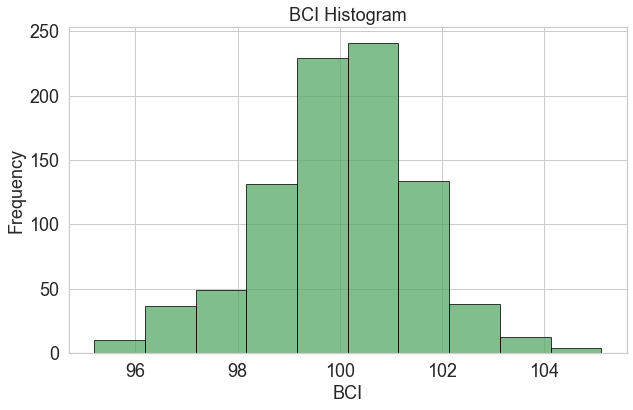

In [67]:
plt.figure(figsize=(10, 6))
df_final['BCI'].plot(kind='hist', alpha=0.75, color='g', edgecolor='black', fontsize=18)

plt.title('BCI Histogram', fontsize=18)
plt.xlabel('BCI', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

plt.show()

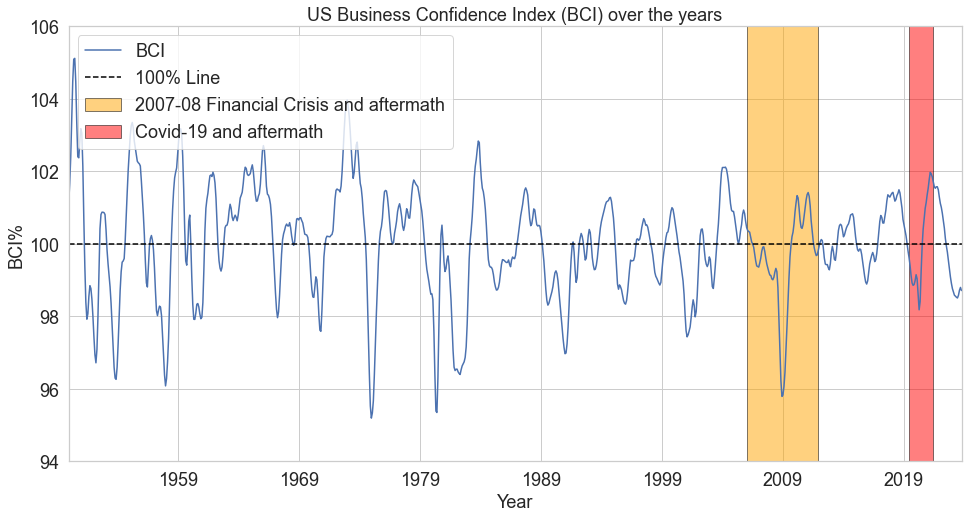

In [68]:
df_bci['date'] = pd.to_datetime(df_bci['date'])  # Make sure the 'Date' column is in datetime format

# Get the y-coordinate for the middle of the plot
#middle_line_y = df_bci.dropna().set_index('Date').mean().values[0]
middle_line_y = 100.0


# Plot the data
df_bci.dropna().set_index('date').plot(figsize=(16, 8))

# Draw a horizontal line at the middle
plt.axhline(y=middle_line_y, color='black', linestyle='--', label='100% Line')

# Set y-axis limits
plt.ylim(94, 106)

# Highlight a rectangular area (2007 to 2011) with yellow color
rect_start = '2006-01-01'
rect_end = '2011-12-31'

# Convert date strings to datetime objects
rect_start_date = pd.to_datetime(rect_start)
rect_end_date = pd.to_datetime(rect_end)

# Use axvspan to highlight the region
plt.axvspan(rect_start_date, rect_end_date, facecolor='orange', edgecolor = 'black', 
            alpha=0.5, label='2007-08 Financial Crisis and aftermath')

rect_2_start = '2019-06-01'
rect_2_end = '2021-06-01'

# Convert date strings to datetime objects
rect_2_start_date = pd.to_datetime(rect_2_start)
rect_2_end_date = pd.to_datetime(rect_2_end)

# Use axvspan to highlight the region
plt.axvspan(rect_2_start_date, rect_2_end_date, facecolor='red', edgecolor = 'black', 
            alpha=0.5, label='Covid-19 and aftermath')

# Show the legend
plt.title('US Business Confidence Index (BCI) over the years', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.ylabel('BCI%', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='upper left', fontsize=18)

# Show the plot
plt.show()

<u>**Standardizing the features**</u>

In [69]:
from sklearn.preprocessing import StandardScaler

features = df_final.iloc[:, 1:-1].dropna()

# Standardizing the features
scaler = StandardScaler()
features_standardised = scaler.fit_transform(features)

# Creating a DataFrame with the normalized values, original column names, and index
standardised_features = pd.DataFrame(features_standardised, columns=features.columns, index=features.index)

df_standardised_features = standardised_features

# Adding the 'BCI' column to the normalised_features DataFrame
df_standardised_features['BCI'] = df_final.dropna()['BCI']


In [70]:
features

federal_interest_rate  bank_credits  consumer_loans  \
1092               2.279355   6362.678460      294.221980   
1093               2.501786   6485.933825      305.340275   
1094               2.629032   6543.691125      298.703600   
1095               2.785000   6621.203680      299.910600   
1096               3.002581   6658.095475      301.419225   
...                     ...           ...             ...   
1295               0.079677  16184.150925      790.846550   
1296               0.079355  16371.800260      801.892240   
1297               0.080000  16573.310275      809.084500   
1298               0.200968  16647.632275      817.480825   
1299               0.330000  16800.620640      835.515060   

      commerical_real_estate_loan  real_estate_prices  credit_delinquency  \
1092                   394.535680            5.297000            1.233333   
1093                   401.945550            4.298333            1.223333   
1094                   407.225100            4.298333            1.223333   
1095                   414.754320            4.298333            1.223333   
1096                   420.762675            3.339333            1.300000   
...                           ...                 ...                 ...   
1295                   251.157800            4.664333            0.550000   
1296                   249.258460            4.664333            0.550000   
1297                   247.646250            2.834667            0.616667   
1298                   247.310125            2.834667            0.616667   
1299                   247.421260            2.834667            0.616667   

              GDP  inflation       exports   imports    spx500  \
1092  4922.615333        3.0   66149.06287  122900.0 -0.125000   
1093  4946.569000        3.0   68256.31114  122233.0  0.101053   
1094  4946.569000        3.1   79512.57783  135451.0 -0.085909   
1095  4946.569000        3.5   75914.35714  135456.0 -0.092381   
1096  4985.430333        2.8   75852.41627  136191.0  0.142857   
...           ...        ...           ...       ...       ...   
1295  6641.362667        7.0  159331.91920  257092.8  0.199545   
1296  6641.362667        7.5  147848.03920  247065.3 -0.262500   
1297  6631.757000        7.9  150555.18210  234218.6 -0.157368   
1298  6631.757000        8.5  179313.75560  295975.4  0.162609   
1299  6631.757000        8.3  173533.94270  273176.8 -0.447500   

      consumer_price_idx  personal_saving_rate  st_consumer_price_idx  \
1092            3.421759                   3.2               0.256754   
1093            3.304002                   2.9               0.221033   
1094            1.897179                   3.1               0.174295   
1095            2.096479                   2.7               0.211437   
1096            3.168462                   3.2               0.234810   
...                  ...                   ...                    ...   
1295            5.611797                   7.5               0.396000   
1296            6.992826                   4.7               0.564420   
1297            6.519555                   4.5               0.513390   
1298            6.350249                   3.8               0.486540   
1299            6.030320                   3.6               0.507920   

      unemployment_claims  unemployment_rate  
1092            2719000.0                5.3  
1093            2723800.0                5.4  
1094            2686500.0                5.2  
1095            2659500.0                5.2  
1096            2604400.0                5.1  
...                   ...                ...  
1295            1993500.0                3.9  
1296            1791500.0                4.0  
1297            1778000.0                3.8  
1298            1722000.0                3.6  
1299            1653500.0                3.6  

[208 rows x 16 columns]

In [71]:
'''
##### 12/01/24

from sklearn.preprocessing import StandardScaler

features = df_final.iloc[:, 1:-1]

# Standardizing the features
scaler = StandardScaler()
features_standardised = scaler.fit_transform(features)

# Creating a DataFrame with the normalized values, original column names, and index
standardised_features = pd.DataFrame(features_standardised, columns=features.columns, index=features.index)

df_standardised_features = standardised_features

# Adding the 'BCI' column to the normalised_features DataFrame
df_standardised_features['BCI'] = df_final['BCI']
'''

"\n##### 12/01/24\n\nfrom sklearn.preprocessing import StandardScaler\n\nfeatures = df_final.iloc[:, 1:-1]\n\n# Standardizing the features\nscaler = StandardScaler()\nfeatures_standardised = scaler.fit_transform(features)\n\n# Creating a DataFrame with the normalized values, original column names, and index\nstandardised_features = pd.DataFrame(features_standardised, columns=features.columns, index=features.index)\n\ndf_standardised_features = standardised_features\n\n# Adding the 'BCI' column to the normalised_features DataFrame\ndf_standardised_features['BCI'] = df_final['BCI']\n"

In [72]:
df_standardised_features

federal_interest_rate  bank_credits  consumer_loans  \
1092               0.611521     -1.640837       -1.553872   
1093               0.745600     -1.593102       -1.493523   
1094               0.822303     -1.570734       -1.529546   
1095               0.916319     -1.540714       -1.522995   
1096               1.047475     -1.526427       -1.514806   
...                     ...           ...             ...   
1295              -0.714422      2.162878        1.141777   
1296              -0.714617      2.235552        1.201732   
1297              -0.714228      2.313594        1.240771   
1298              -0.641310      2.342378        1.286346   
1299              -0.563530      2.401628        1.384235   

      commerical_real_estate_loan  real_estate_prices  credit_delinquency  \
1092                    -0.539359            1.165180            0.371617   
1093                    -0.463975            0.855709            0.348578   
1094                    -0.410263            0.855709            0.348578   
1095                    -0.333665            0.855709            0.348578   
1096                    -0.272540            0.558530            0.525212   
...                           ...                 ...                 ...   
1295                    -1.998007            0.969127           -1.202726   
1296                    -2.017330            0.969127           -1.202726   
1297                    -2.033731            0.402142           -1.049131   
1298                    -2.037151            0.402142           -1.049131   
1299                    -2.036020            0.402142           -1.049131   

           GDP  inflation   exports   imports    spx500  consumer_price_idx  \
1092 -1.466324   0.430778 -2.334471 -1.996605 -0.808789            0.781548   
1093 -1.418797   0.430778 -2.239902 -2.018553  0.332123            0.678277   
1094 -1.418797   0.489882 -1.734740 -1.583603 -0.611493           -0.555484   
1095 -1.418797   0.726298 -1.896222 -1.583439 -0.644158           -0.380702   
1096 -1.341690   0.312570 -1.899002 -1.559253  0.543114            0.559410   
...        ...        ...       ...       ...       ...                 ...   
1295  1.943923   2.794941  1.847411  2.419126  0.829226            2.702176   
1296  1.943923   3.090461  1.332035  2.089162 -1.502767            3.913317   
1297  1.924864   3.326878  1.453527  1.666430 -0.972156            3.498265   
1298  1.924864   3.681502  2.744161  3.698592  0.642803            3.349787   
1299  1.924864   3.563294  2.484773  2.948384 -2.436482            3.069214   

      personal_saving_rate  st_consumer_price_idx  unemployment_claims  \
1092             -1.009306               0.629681            -0.246149   
1093             -1.086916               0.240885            -0.244262   
1094             -1.035176              -0.267822            -0.258927   
1095             -1.138656               0.136440            -0.269542   
1096             -1.009306               0.390837            -0.291205   
...                    ...                    ...                  ...   
1295              0.103107               2.145268            -0.531386   
1296             -0.621255               3.978391            -0.610804   
1297             -0.672995               3.422968            -0.616112   
1298             -0.854085               3.130726            -0.638129   
1299             -0.905825               3.363431            -0.665060   

      unemployment_rate        BCI  
1092          -0.393084  100.74720  
1093          -0.345932  100.54930  
1094          -0.440236  100.33450  
1095          -0.440236  100.10790  
1096          -0.487388   99.99591  
...                 ...        ...  
1295          -1.053211  101.29410  
1296          -1.006059  101.11880  
1297          -1.100363  101.00700  
1298          -1.194667  100.84370  
1299          -1.194667  100.64990  

[208 rows x 17 columns]

In [73]:
#df_standardised_features = df_standardised_features.dropna()

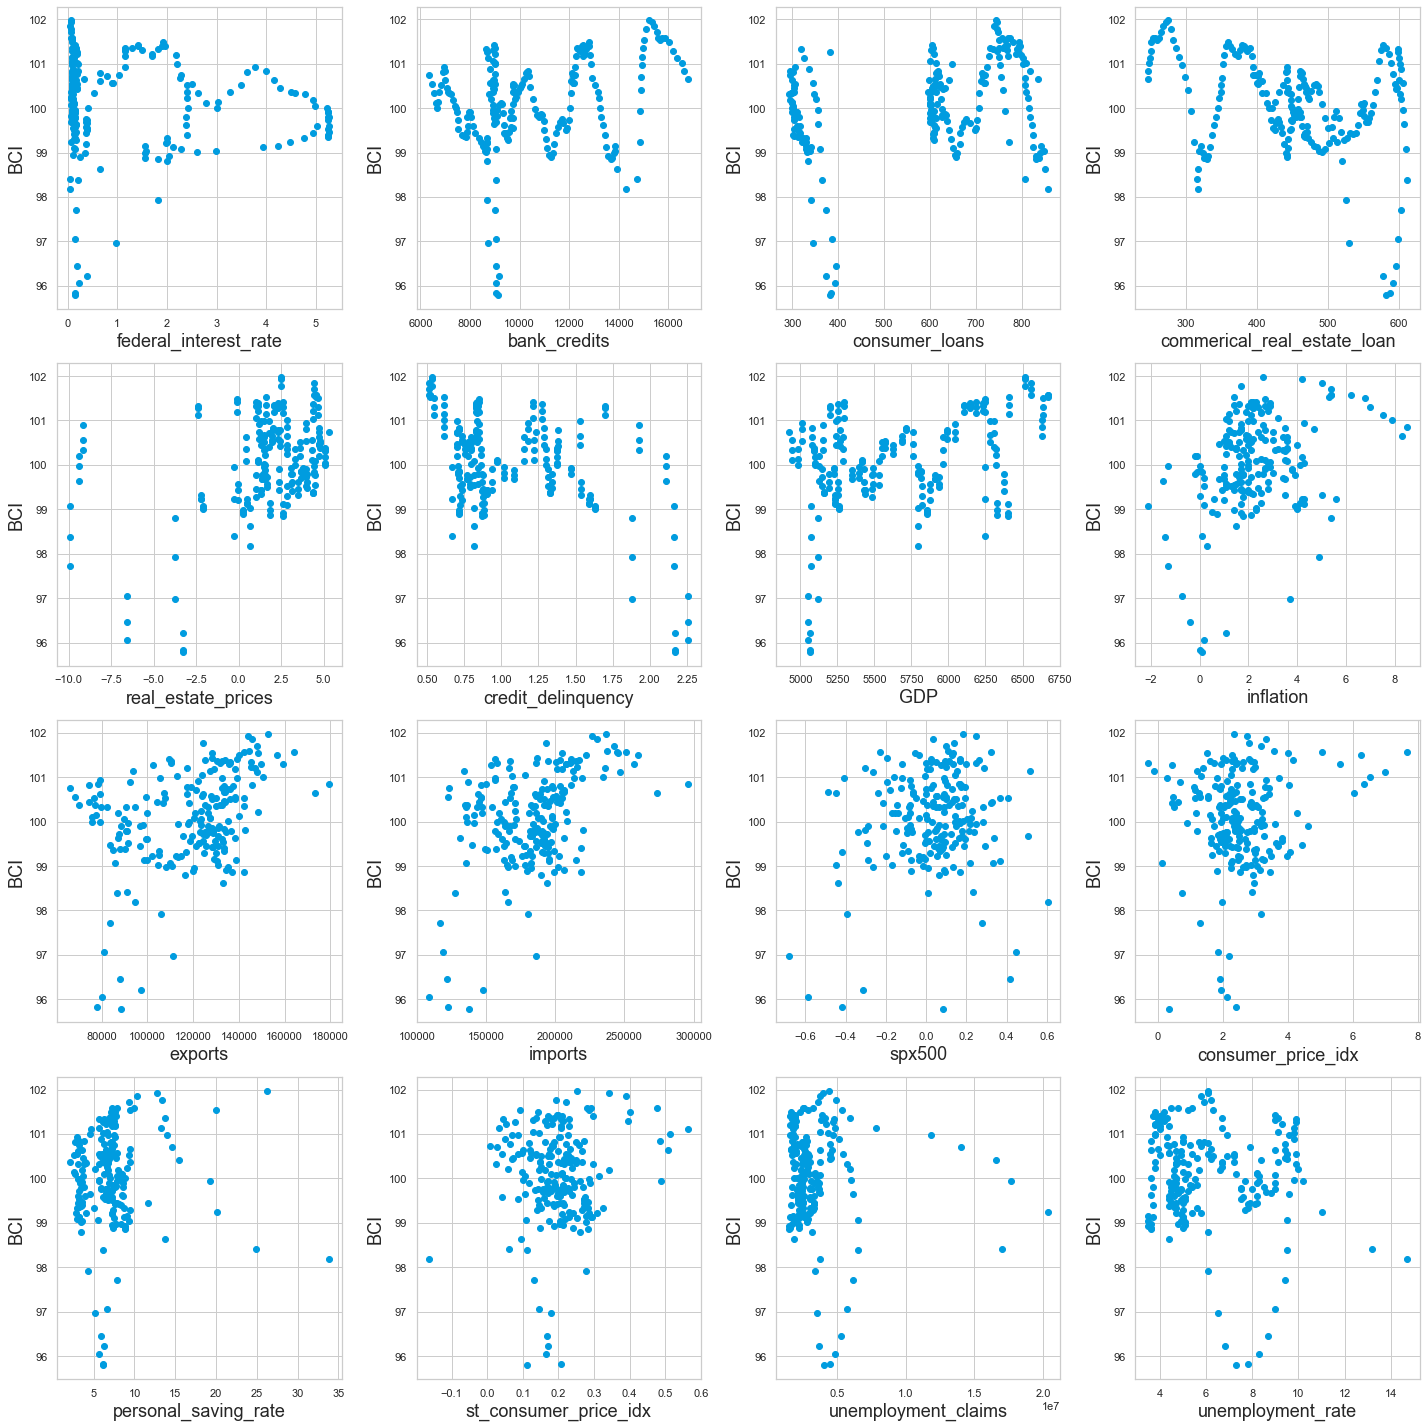

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

In [77]:
# Iterating through columns starting from the second column (index 1)
columns_to_plot = df_final.columns[1:-1]
num_rows = 4
num_cols = 4

# Create a 5x3 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Adjust vertical space between rows
plt.subplots_adjust(hspace=0.5)

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate through columns and plot in subplots
for i, col in enumerate(columns_to_plot):
    # Plot the data on the corresponding subplot
    axes[i].scatter(x = df_final.dropna()[col], 
                    y = df_final.dropna()['BCI'],
                    color = '#009CDF')
    
    axes[i].set_xlabel(col, fontsize=18)
    
    axes[i].set_ylabel('BCI', fontsize=18)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
plt.scatter

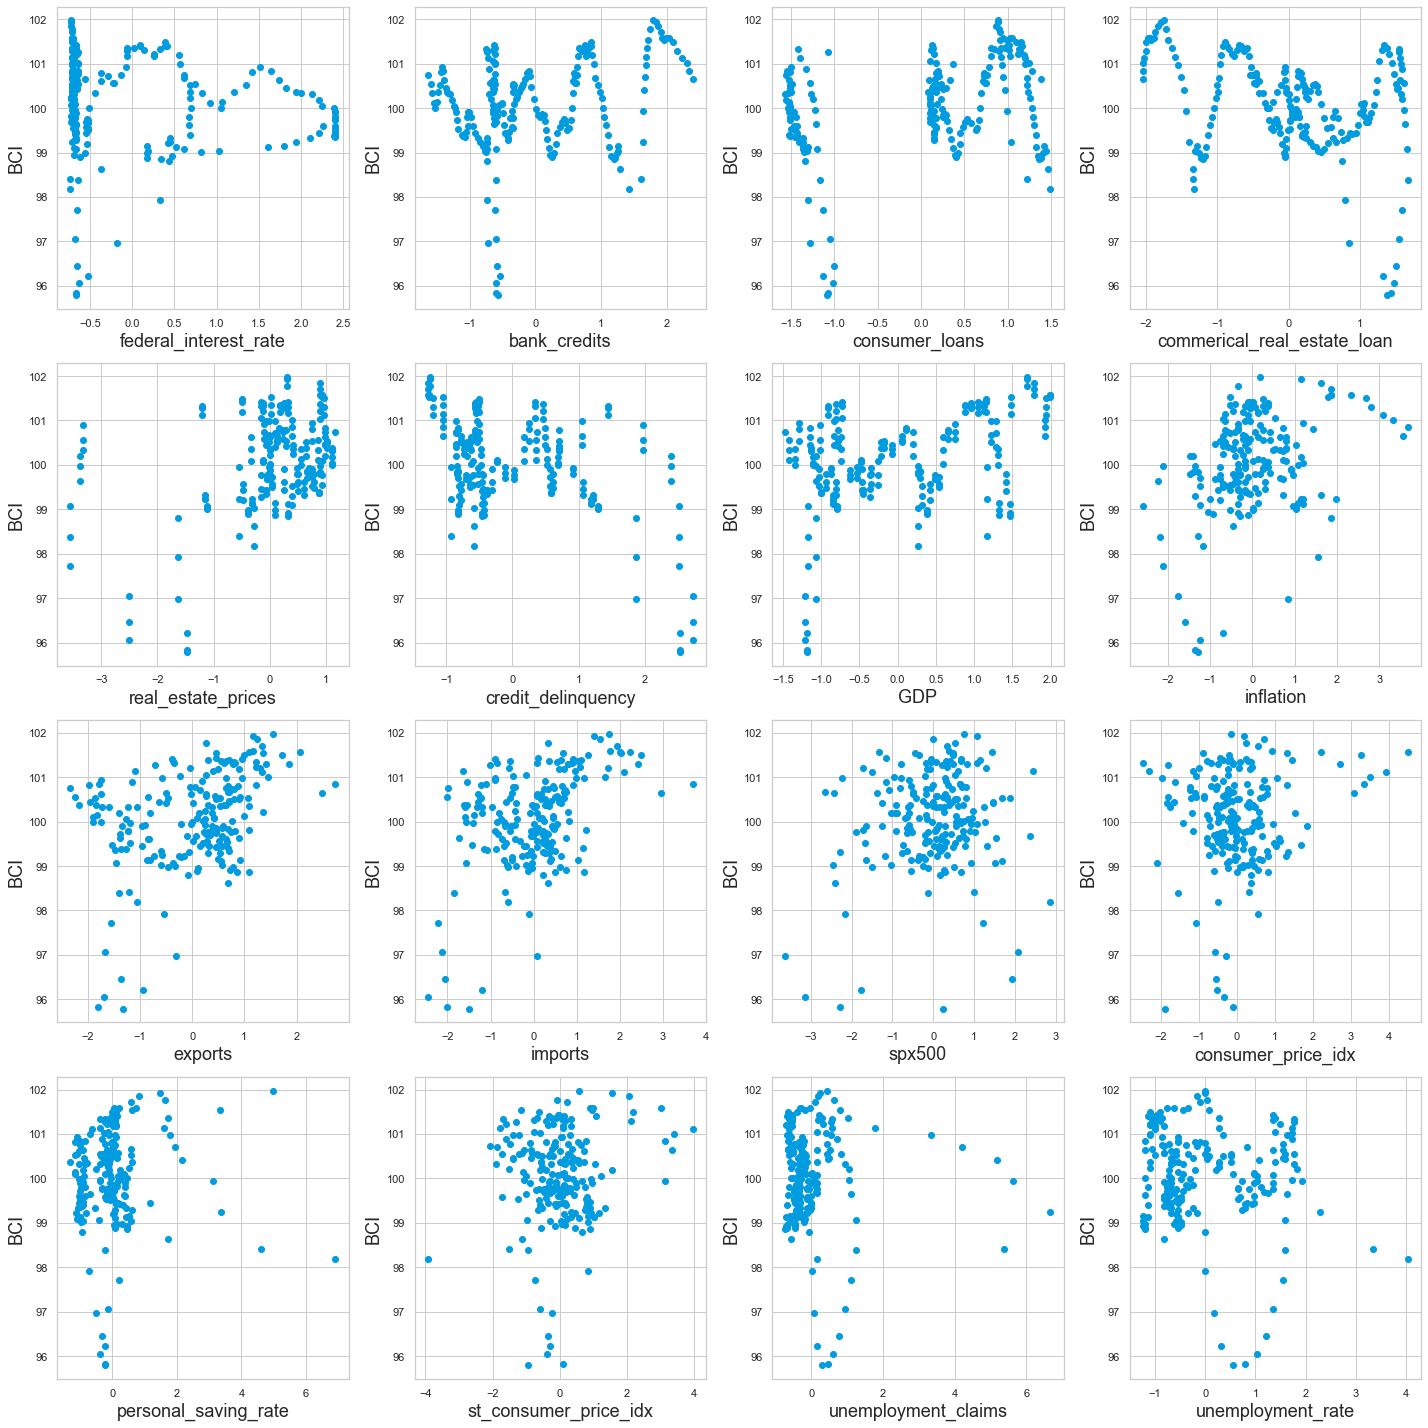

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

In [78]:
# Iterating through columns starting from the second column (index 1)
columns_to_plot = df_standardised_features.columns[:-1]
num_rows = 4
num_cols = 4

# Create a 5x3 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Adjust vertical space between rows
plt.subplots_adjust(hspace=0.5)

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate through columns and plot in subplots
for i, col in enumerate(columns_to_plot):
    # Plot the data on the corresponding subplot
    axes[i].scatter(x = df_standardised_features[col].dropna(), 
                    y = df_standardised_features['BCI'].dropna(),
                    color = '#009CDF')
    
    axes[i].set_xlabel(col, fontsize=18)
    
    axes[i].set_ylabel('BCI', fontsize=18)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
plt.scatter

-------------------------------------------------------

--------------------------

<u><div style="text-align: center;"><font size="4"> **Model development**</font> </div></u>

### <u>**Linear Regression**</u>

<u>**Using StatsModel**</u>

In [79]:
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

# X and y are the features and target variable respectively
X = df_standardised_features.drop('BCI', axis=1)
y = df_standardised_features['BCI']

# Add a constant term to the features
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

# Fit the model
#lr_sm_model = sm.OLS(y_train, X_train).fit()
lr_sm_model = sm.OLS(y, X).fit()

# Print the summary
print(lr_sm_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    BCI   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     16.82
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           1.60e-28
Time:                        12:16:35   Log-Likelihood:                -221.41
No. Observations:                 208   AIC:                             476.8
Df Residuals:                     191   BIC:                             533.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [80]:
lr_sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BCI   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     16.82
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           1.60e-28
Time:                        12:16:35   Log-Likelihood:                -221.41
No. Observations:                 208   AIC:                             476.8
Df Residuals:                     191   BIC:                             533.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         100.0610      0.051   1971.166      0.000      99.961     100.161
federal_interest_rate           0.1354      0.137      0.992      0.323      -0.134       0.405
bank_credits                   -1.2917      0.404     -3.201      0.002      -2.088      -0.496
consumer_loans                 -0.2179      0.183     -1.190      0.236      -0.579       0.143
commerical_real_estate_loan    -0.4190      0.259     -1.615      0.108      -0.931       0.093
real_estate_prices              0.0218      0.111      0.197      0.844      -0.197       0.240
credit_delinquency             -0.4304      0.192     -2.245      0.026      -0.809      -0.052
GDP                             2.0154      0.384      5.243      0.000       1.257       2.773
inflation                       0.4715      0.101      4.668      0.000       0.272       0.671
exports                        -0.0289      0.229     -0.126      0.900      -0.480       0.423
imports                        -0.0613      0.216     -0.283      0.777      -0.488       0.365
spx500                          0.0830      0.058      1.440      0.152      -0.031       0.197
consumer_price_idx             -0.3489      0.108     -3.227      0.001      -0.562      -0.136
personal_saving_rate           -0.5288      0.122     -4.330      0.000      -0.770      -0.288
st_consumer_price_idx          -0.1436      0.103     -1.395      0.165      -0.347       0.059
unemployment_claims            -0.0968      0.100     -0.968      0.334      -0.294       0.101
unemployment_rate               0.8523      0.193      4.408      0.000       0.471       1.234
==============================================================================
Omnibus:                        3.441   Durbin-Watson:                   0.533
Prob(Omnibus):                  0.179   Jarque-Bera (JB):                3.996
Skew:                           0.036   Prob(JB):                        0.136
Kurtosis:                       3.675   Cond. No.                         27.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
outliers = lr_sm_model.outlier_test()
outliers

student_resid   unadj_p  bonf(p)
1092       1.244114  0.214990      1.0
1093       0.514609  0.607424      1.0
1094      -0.201252  0.840717      1.0
1095      -0.511859  0.609344      1.0
1096       0.081347  0.935251      1.0
...             ...       ...      ...
1295       0.064789  0.948410      1.0
1296       0.358956  0.720027      1.0
1297       0.000409  0.999674      1.0
1298      -0.572127  0.567912      1.0
1299      -0.480474  0.631443      1.0

[208 rows x 3 columns]

In [82]:
df_standardised_features.columns

Index(['federal_interest_rate', 'bank_credits', 'consumer_loans',
       'commerical_real_estate_loan', 'real_estate_prices',
       'credit_delinquency', 'GDP', 'inflation', 'exports', 'imports',
       'spx500', 'consumer_price_idx', 'personal_saving_rate',
       'st_consumer_price_idx', 'unemployment_claims', 'unemployment_rate',
       'BCI'],
      dtype='object')

In [83]:
coeff = pd.DataFrame({'Coefficient': lr_sm_model.params}, X.columns, columns=['Coefficient'])

#coeff
coeff.sort_values(by='Coefficient')

Coefficient
bank_credits                   -1.291663
personal_saving_rate           -0.528850
credit_delinquency             -0.430429
commerical_real_estate_loan    -0.418962
consumer_price_idx             -0.348875
consumer_loans                 -0.217948
st_consumer_price_idx          -0.143629
unemployment_claims            -0.096832
imports                        -0.061281
exports                        -0.028852
real_estate_prices              0.021790
spx500                          0.082973
federal_interest_rate           0.135400
inflation                       0.471522
unemployment_rate               0.852331
GDP                             2.015357
const                         100.060974

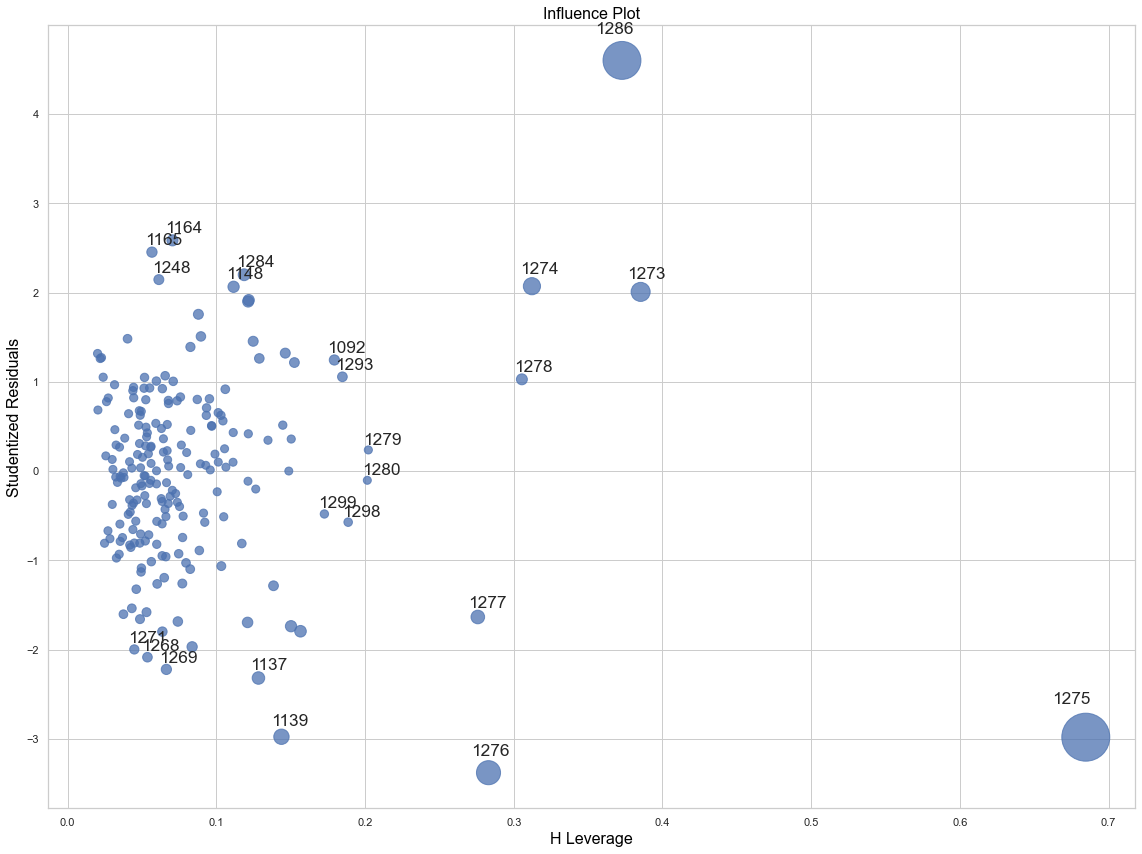

In [84]:
# Plotting datapoints having more influence on the regression

fig, ax = plt.subplots(figsize=(16, 12))
influence_plot = sm.graphics.influence_plot(lr_sm_model, criterion="cooks", ax=ax)
fig.tight_layout(pad=1.0)
plt.show()


In [85]:
df_standardised_features.loc[1270:1290]

federal_interest_rate  bank_credits  consumer_loans  \
1270               0.173883      1.215538        1.387870   
1271               0.172457      1.239335        1.405658   
1272               0.172262      1.257301        1.416726   
1273               0.191828      1.264372        1.446946   
1274              -0.369276      1.284718        1.460924   
1275              -0.732914      1.431901        1.493934   
1276              -0.732312      1.609972        1.226659   
1277              -0.715634      1.646483        1.043676   
1278              -0.706644      1.642958        0.993947   
1279              -0.705089      1.661417        0.968839   
1280              -0.708200      1.669275        0.942698   
1281              -0.708200      1.685444        0.929744   
1282              -0.710410      1.682786        0.924866   
1283              -0.708200      1.704764        0.921745   
1284              -0.711117      1.715549        0.914737   
1285              -0.716811      1.746736        0.898956   
1286              -0.720450      1.786682        0.890657   
1287              -0.720859      1.836521        0.892356   
1288              -0.727450      1.864537        0.864091   
1289              -0.715434      1.913335        0.906304   
1290              -0.703339      1.935884        0.950586   

      commerical_real_estate_loan  real_estate_prices  credit_delinquency  \
1270                    -1.232969            0.089778           -0.434754   
1271                    -1.257356            0.089778           -0.434754   
1272                    -1.282025            0.089778           -0.434754   
1273                    -1.304314           -0.276505           -0.588348   
1274                    -1.331367           -0.276505           -0.588348   
1275                    -1.330300           -0.276505           -0.588348   
1276                    -1.337800           -0.554162           -0.926256   
1277                    -1.388169           -0.554162           -0.926256   
1278                    -1.432314           -0.554162           -0.926256   
1279                    -1.465712            0.086679           -0.849459   
1280                    -1.507724            0.086679           -0.849459   
1281                    -1.550812            0.086679           -0.849459   
1282                    -1.595306            0.024392           -1.049131   
1283                    -1.636972            0.024392           -1.049131   
1284                    -1.680665            0.024392           -1.049131   
1285                    -1.709287            0.300603           -1.241125   
1286                    -1.749100            0.300603           -1.241125   
1287                    -1.790707            0.300603           -1.241125   
1288                    -1.830727            0.891346           -1.279523   
1289                    -1.862625            0.891346           -1.279523   
1290                    -1.888757            0.891346           -1.279523   

           GDP  inflation   exports   imports    spx500  consumer_price_idx  \
1270  1.326052  -0.101159  0.851345  0.506696  0.670013            0.806551   
1271  1.326052   0.017049  0.775885  0.602215  0.502257            0.071692   
1272  1.326052   0.135257  0.491533  0.402108 -0.201935            0.593186   
1273  0.260456   0.017049  0.581175 -0.179938 -2.443787            0.156145   
1274  0.260456  -0.455783  0.678954  0.340462 -2.396334            0.382332   
1275  0.260456  -1.165032 -1.052754 -0.591133  2.864784           -0.493048   
1276  1.163248  -1.283240 -1.218004 -0.660821  0.987981            0.319627   
1277  1.163248  -0.987720 -0.585414 -0.146041  0.326810           -0.745623   
1278  1.163248  -0.751304 -0.218261  0.538059  1.067817            0.947359   
1279  1.282655  -0.573992  0.008296  0.642841  1.453997           -0.258587   
1280  1.282655  -0.514887  0.147243  0.740627 -1.081574           -1.224839   
1281  1.282655  -0.6

In [86]:
df_final.loc[1270:1290]

date  federal_interest_rate  bank_credits  consumer_loans  \
1270 2019-11-01               1.553333  13738.048480      836.184900   
1271 2019-12-01               1.550968  13799.494325      839.461925   
1272 2020-01-01               1.550645  13845.884475      841.501100   
1273 2020-02-01               1.583103  13864.142460      847.068540   
1274 2020-03-01               0.652258  13916.676275      849.643650   
1275 2020-04-01               0.049000  14296.713275      855.725200   
1276 2020-05-01               0.050000  14756.506440      806.484560   
1277 2020-06-01               0.077667  14850.780300      772.773275   
1278 2020-07-01               0.092581  14841.679000      763.611600   
1279 2020-08-01               0.095161  14889.342480      758.985940   
1280 2020-09-01               0.090000  14909.631375      754.169875   
1281 2020-10-01               0.090000  14951.380240      751.783340   
1282 2020-11-01               0.086333  14944.518000      750.884750   
1283 2020-12-01               0.090000  15001.266700      750.309775   
1284 2021-01-01               0.085161  15029.113460      749.018580   
1285 2021-02-01               0.075714  15109.641250      746.111175   
1286 2021-03-01               0.069677  15212.785825      744.582225   
1287 2021-04-01               0.069000  15341.473840      744.895280   
1288 2021-05-01               0.058065  15413.812400      739.687925   
1289 2021-06-01               0.078000  15539.812250      747.464900   
1290 2021-07-01               0.098065  15598.034260      755.623220   

      commerical_real_estate_loan  real_estate_prices  credit_delinquency  \
1270                   326.357240            1.826667            0.883333   
1271                   323.960125            1.826667            0.883333   
1272                   321.535250            1.826667            0.883333   
1273                   319.344400            0.644667            0.816667   
1274                   316.685150            0.644667            0.816667   
1275                   316.790075            0.644667            0.816667   
1276                   316.052860           -0.251333            0.670000   
1277                   311.101800           -0.251333            0.670000   
1278                   306.762625           -0.251333            0.670000   
1279                   303.479740            1.816667            0.703333   
1280                   299.350175            1.816667            0.703333   
1281                   295.114820            1.816667            0.703333   
1282                   290.741325            1.615667            0.616667   
1283                   286.645775            1.615667            0.616667   
1284                   282.350960            1.615667            0.616667   
1285                   279.537500            2.507000            0.533333   
1286                   275.624100            2.507000            0.533333   
1287                   271.534340            2.507000            0.533333   
1288                   267.600550            4.413333            0.516667   
1289                   264.465150            4.413333            0.516667   
1290                   261.896540            4.413333            0.516667   

              GDP  inflation       exports   imports    spx500  \
1270  6329.959000        2.1  137137.05570  198974.6  0.168000   
1271  6329.959000        2.3  135455.62480  201877.4  0.134762   
1272  6329.959000        2.5  129119.54070  195796.2 -0.004762   
1273  5792.904000        2.3  131116.98670  178108.0 -0.448947   
1274  5792.904000        1.5  133295.74920  193922.8 -0.439545   
1275  5792.904000        0.3   94708.95458  165611.9  0.602857   
1276  6247.906667        0.1   91026.76498  163494.1  0.231000   
1277  6247.906667        0.6  105122.44470  179138.1  0.100000   
1278  6247.906667        1.0  113303.53590  199927.7  0.246818   
1279  6308.087333        1.3  118351.81560  203112.0  0.323333   
1280 

In [87]:
lr_sm_model.fittedvalues

1092     99.923272
1093    100.200194
1094    100.472553
1095    100.463114
1096     99.938927
           ...    
1295    101.248806
1296    100.876011
1297    101.006723
1298    101.221655
1299    100.970502
Length: 208, dtype: float64

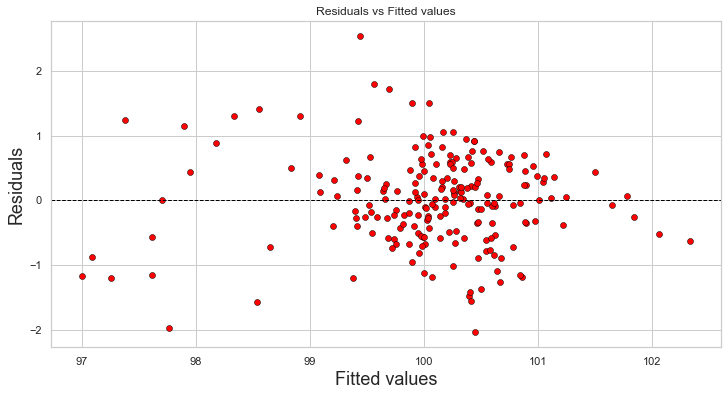

In [88]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=lr_sm_model.fittedvalues, y=lr_sm_model.resid, color='red', edgecolor='black')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Adding a horizontal line at y=0
plt.title('Residuals Plot', fontsize=18)
plt.xlabel('Fitted values', fontsize=18)
plt.ylabel('Residuals', fontsize=18)
plt.title("Residuals vs Fitted values")
plt.show()

In [89]:
lr_sm_model.resid

1092    0.823928
1093    0.349106
1094   -0.138053
1095   -0.355214
1096    0.056983
          ...   
1295    0.045294
1296    0.242789
1297    0.000277
1298   -0.377955
1299   -0.320602
Length: 208, dtype: float64

Text(0.5, 1.0, 'Residuals')

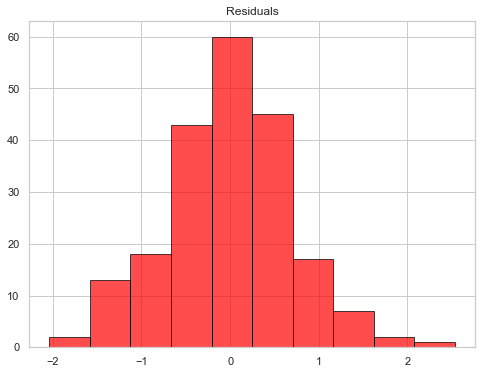

In [90]:
plt.figure(figsize=(8,6))
plt.hist(lr_sm_model.resid, color='red', alpha= 0.7 ,edgecolor='black')
plt.title("Residuals")

In [91]:
lr_sm_model.mse_resid

0.5359774338229062

In [92]:
lr_sm_model.rsquared

0.5849411383195117

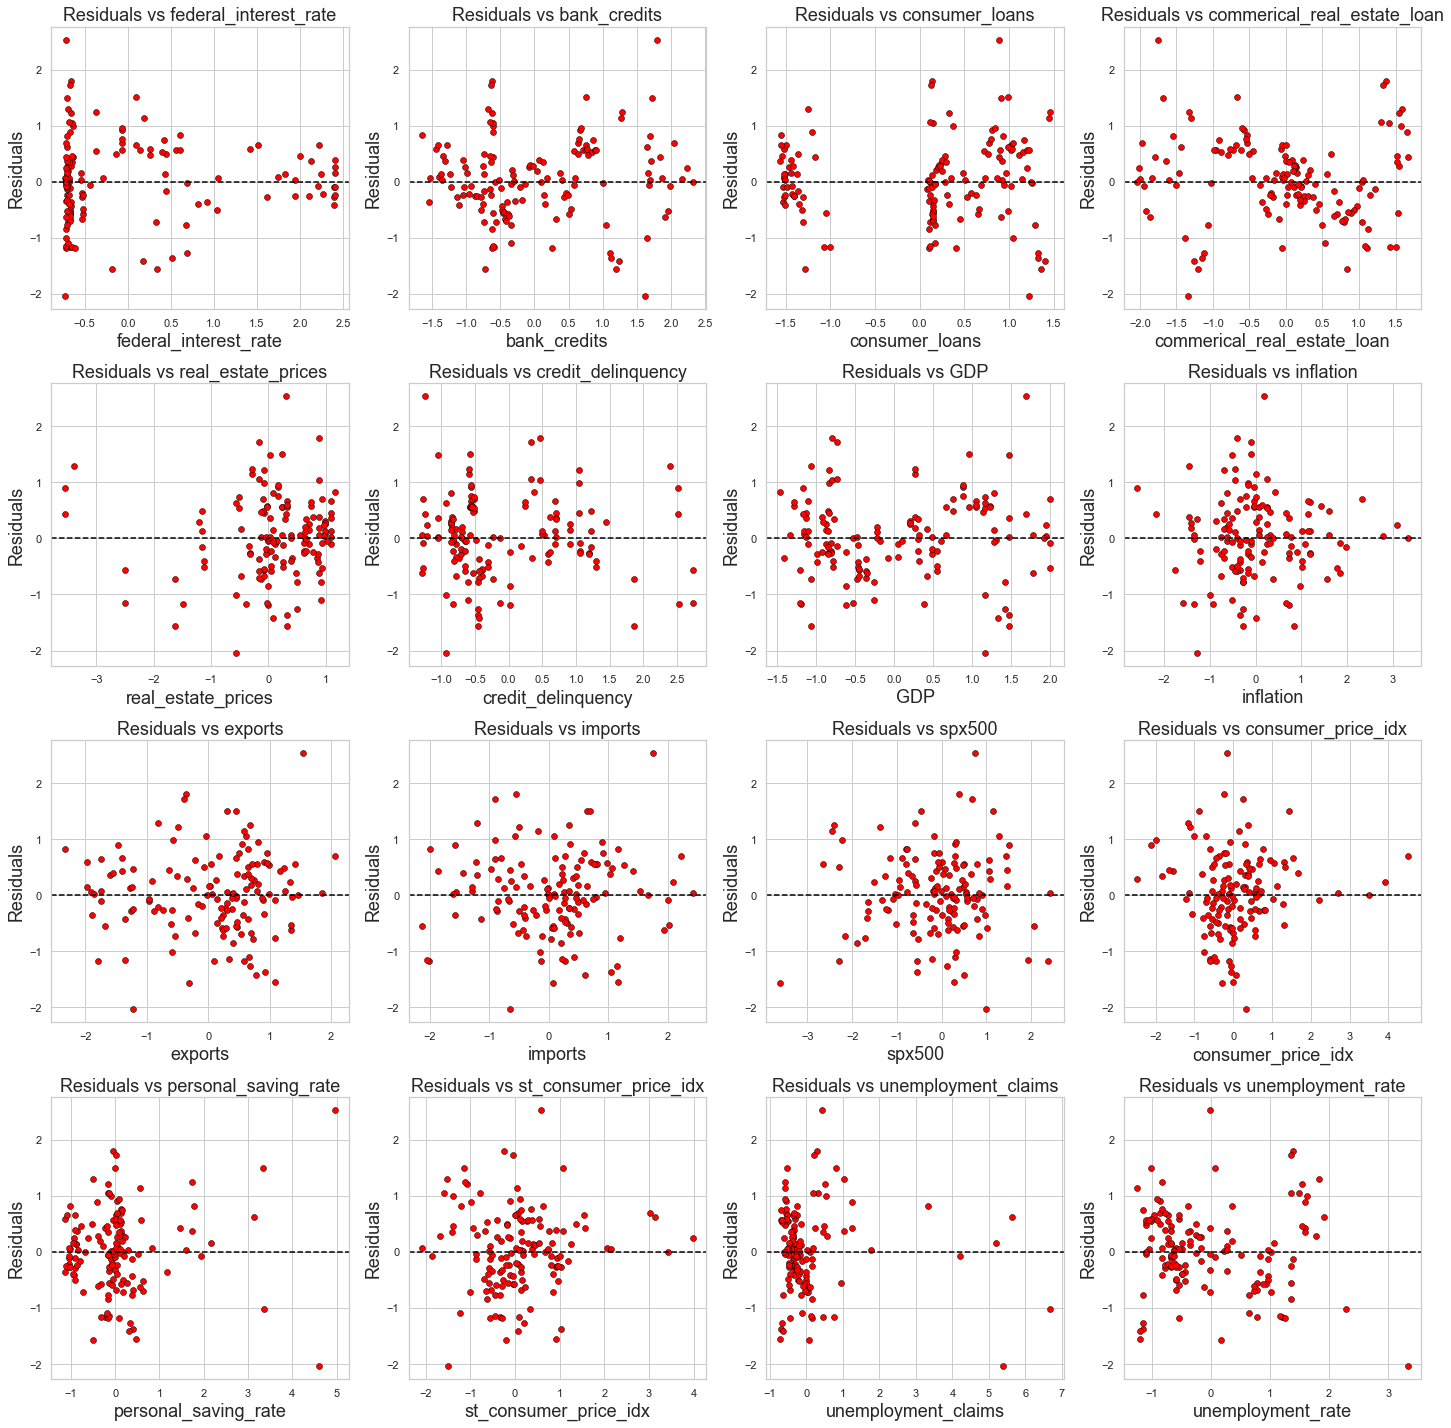

In [93]:
# Iterating through columns starting from the second column (index 1)
columns_to_plot = X_train.columns[1:]     # removing the first column name as it is a constant column added for OLS Regression
num_rows = 4
num_cols = 4

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Adjust vertical space between rows
plt.subplots_adjust(hspace=0.6)

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate through columns and plot in subplots
for i, col in enumerate(columns_to_plot):
    # Plot the data on the corresponding subplot
    sns.scatterplot(x=X_train[col], y=lr_sm_model.resid, ax=axes[i], color='red', edgecolor='black')
    axes[i].axhline(y=0, color='black', linestyle='--', linewidth=1.5)
    axes[i].set_xlabel(col, fontsize=18)
    axes[i].set_ylabel('Residuals', fontsize=18)
    axes[i].set_title(f'Residuals vs {col}', fontsize=18)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


<u>Runnning model prediction</u>

In [94]:
y_pred = lr_sm_model.predict(X_test)

# Calculating residuals
residuals = y_test - y_pred

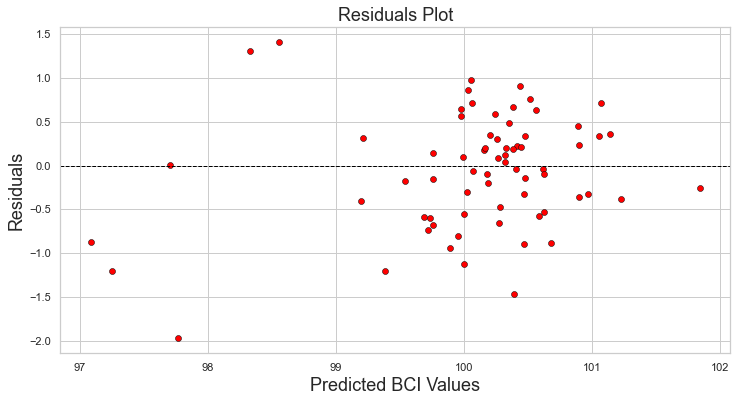

In [95]:
# Plotting residuals
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_pred, y=residuals, color='red', edgecolor='black')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Adding a horizontal line at y=0
plt.title('Residuals Plot', fontsize=18)
plt.xlabel('Predicted BCI Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18)
plt.show()

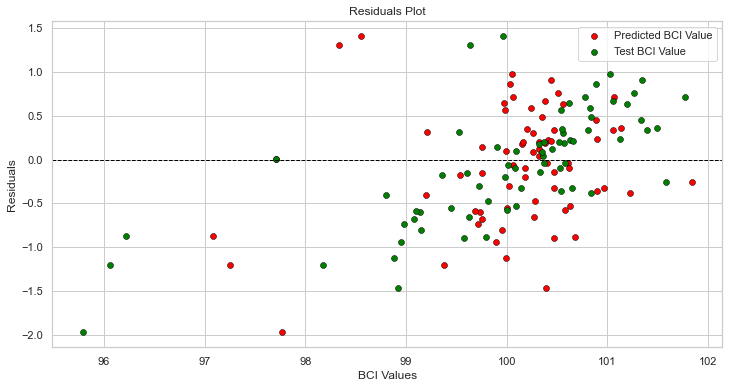

In [96]:
# Plotting residuals
plt.figure(figsize=(12, 6))

sns.scatterplot(x=y_pred, y=residuals, color='red', edgecolor='black', label= 'Predicted BCI Value')

sns.scatterplot(x=y_test, y=residuals, color='green', edgecolor='black', label= 'Test BCI Value')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Adding a horizontal line at y=0
plt.title('Residuals Plot')
plt.xlabel('BCI Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

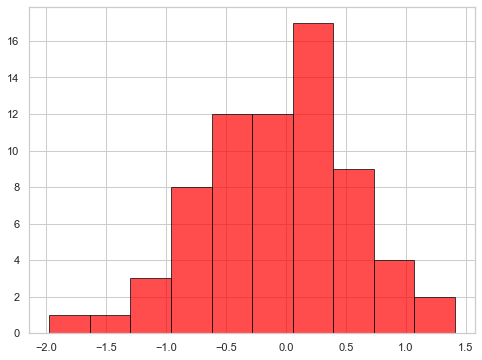

In [97]:
plt.figure(figsize=(8,6))
plt.hist(residuals, alpha=0.7, color='red', edgecolor='black')
#sns.histplot(residuals, kde=True, color='red', edgecolor='black', alpha=0.7)
plt.show()

In [98]:
len(columns_to_plot)

16

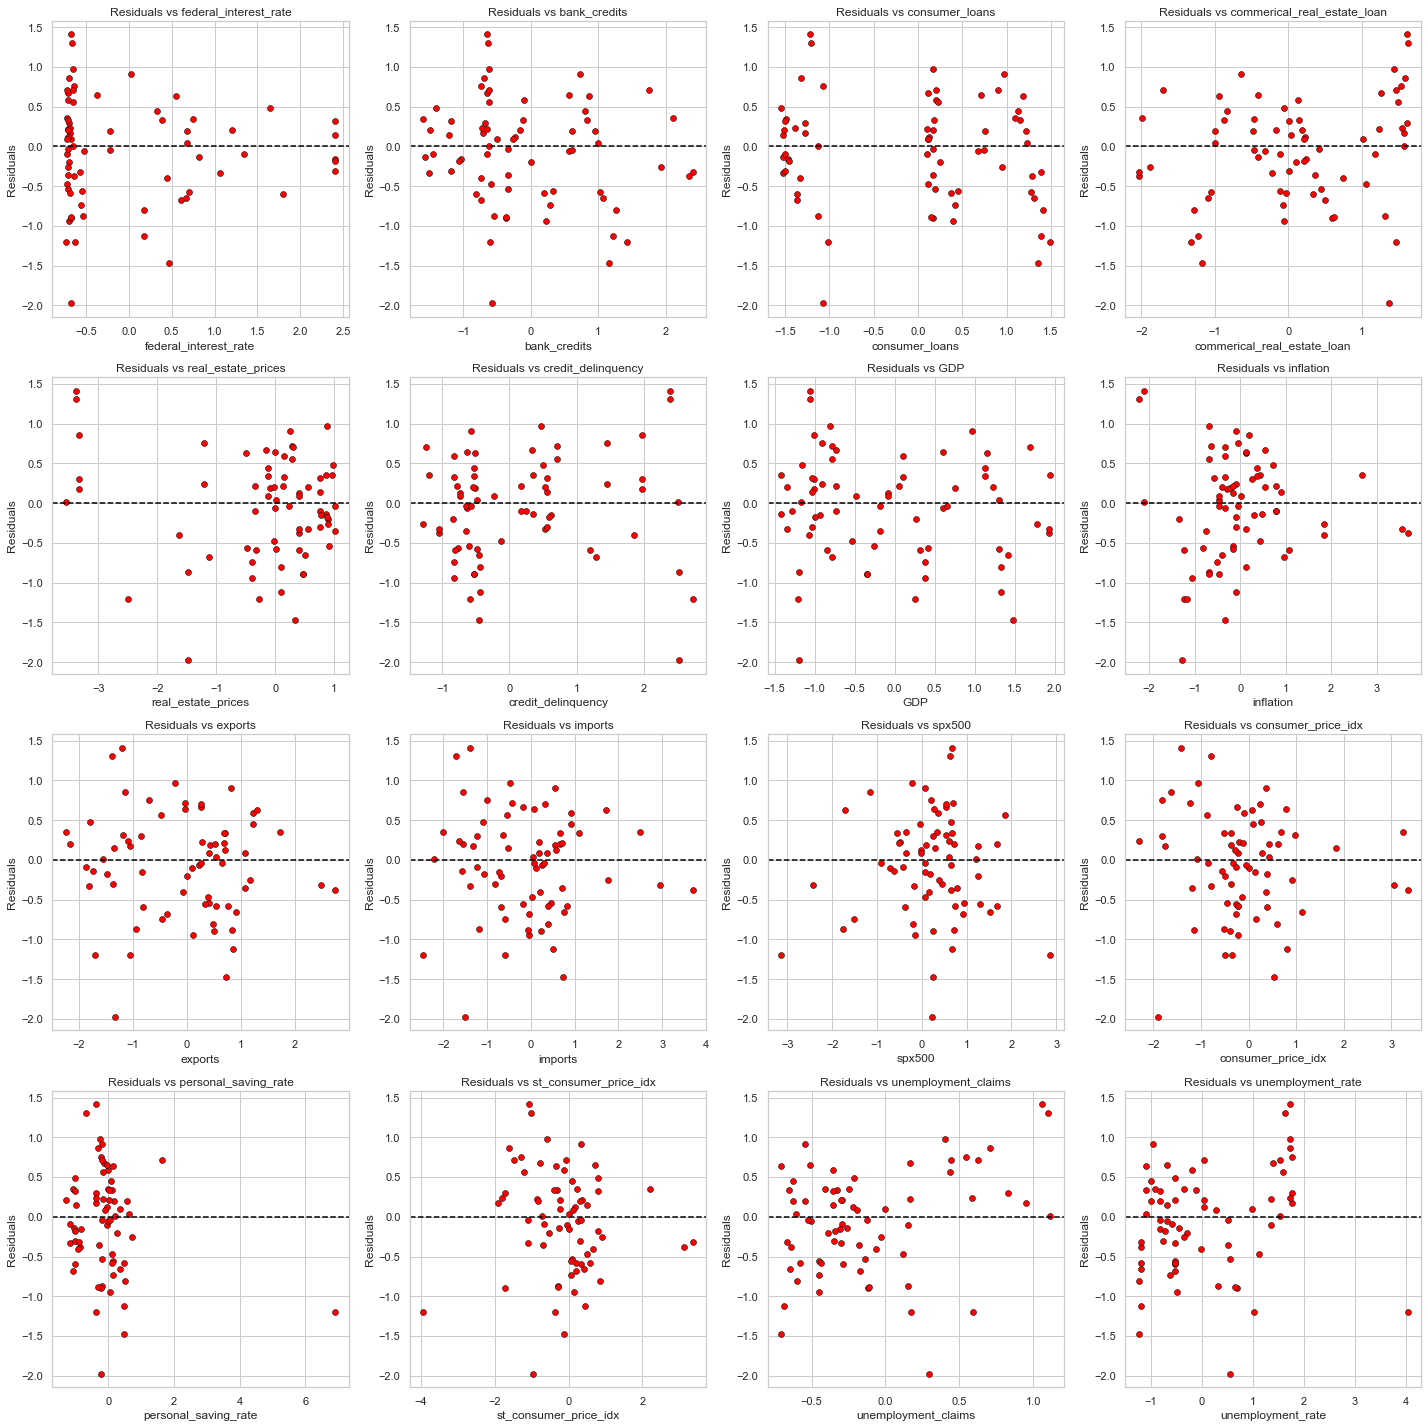

In [99]:
# Iterating through columns starting from the second column (index 1)
columns_to_plot = X_test.columns[1:]     # removing the first column name as it is a constant column added for OLS Regression
num_rows = 4
num_cols = 4

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Adjust vertical space between rows
plt.subplots_adjust(hspace=0.5)

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate through columns and plot in subplots
for i, col in enumerate(columns_to_plot):
    # Plot the data on the corresponding subplot
    sns.scatterplot(x=X_test[col], y=residuals, ax=axes[i], color='red', edgecolor='black')
    axes[i].axhline(y=0, color='black', linestyle='--', linewidth=1.5)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Residuals')
    axes[i].set_title(f'Residuals vs {col}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


--------------------------

-------------------------

In [100]:
exclude_rows_idx = np.arange(1270, 1291)

exclude_rows_idx = [1154] + list(exclude_rows_idx)

In [101]:
# df_standardised_features.drop(index=range(1270, 1291), axis=0)
df_standardised_features.drop(index=exclude_rows_idx, axis=0)

federal_interest_rate  bank_credits  consumer_loans  \
1092               0.611521     -1.640837       -1.553872   
1093               0.745600     -1.593102       -1.493523   
1094               0.822303     -1.570734       -1.529546   
1095               0.916319     -1.540714       -1.522995   
1096               1.047475     -1.526427       -1.514806   
...                     ...           ...             ...   
1295              -0.714422      2.162878        1.141777   
1296              -0.714617      2.235552        1.201732   
1297              -0.714228      2.313594        1.240771   
1298              -0.641310      2.342378        1.286346   
1299              -0.563530      2.401628        1.384235   

      commerical_real_estate_loan  real_estate_prices  credit_delinquency  \
1092                    -0.539359            1.165180            0.371617   
1093                    -0.463975            0.855709            0.348578   
1094                    -0.410263            0.855709            0.348578   
1095                    -0.333665            0.855709            0.348578   
1096                    -0.272540            0.558530            0.525212   
...                           ...                 ...                 ...   
1295                    -1.998007            0.969127           -1.202726   
1296                    -2.017330            0.969127           -1.202726   
1297                    -2.033731            0.402142           -1.049131   
1298                    -2.037151            0.402142           -1.049131   
1299                    -2.036020            0.402142           -1.049131   

           GDP  inflation   exports   imports    spx500  consumer_price_idx  \
1092 -1.466324   0.430778 -2.334471 -1.996605 -0.808789            0.781548   
1093 -1.418797   0.430778 -2.239902 -2.018553  0.332123            0.678277   
1094 -1.418797   0.489882 -1.734740 -1.583603 -0.611493           -0.555484   
1095 -1.418797   0.726298 -1.896222 -1.583439 -0.644158           -0.380702   
1096 -1.341690   0.312570 -1.899002 -1.559253  0.543114            0.559410   
...        ...        ...       ...       ...       ...                 ...   
1295  1.943923   2.794941  1.847411  2.419126  0.829226            2.702176   
1296  1.943923   3.090461  1.332035  2.089162 -1.502767            3.913317   
1297  1.924864   3.326878  1.453527  1.666430 -0.972156            3.498265   
1298  1.924864   3.681502  2.744161  3.698592  0.642803            3.349787   
1299  1.924864   3.563294  2.484773  2.948384 -2.436482            3.069214   

      personal_saving_rate  st_consumer_price_idx  unemployment_claims  \
1092             -1.009306               0.629681            -0.246149   
1093             -1.086916               0.240885            -0.244262   
1094             -1.035176              -0.267822            -0.258927   
1095             -1.138656               0.136440            -0.269542   
1096             -1.009306               0.390837            -0.291205   
...                    ...                    ...                  ...   
1295              0.103107               2.145268            -0.531386   
1296             -0.621255               3.978391            -0.610804   
1297             -0.672995               3.422968            -0.616112   
1298             -0.854085               3.130726            -0.638129   
1299             -0.905825               3.363431            -0.665060   

      unemployment_rate        BCI  
1092          -0.393084  100.74720  
1093          -0.345932  100.54930  
1094          -0.440236  100.33450  
1095          -0.440236  100.10790  
1096          -0.487388   99.99591  
...                 ...        ...  
1295          -1.053211  101.29410  
1296          -1.006059  101.11880  
1297          -1.100363  101.00700  
1298          -1.194667  100.84370  
1299          -1.194667  100.64990  

[186 rows x 17 columns]

In [102]:
# X and y are the features and target variable respectively
X = df_standardised_features.drop(index=exclude_rows_idx, axis=0).drop('BCI', axis=1)
y = df_standardised_features.drop(index=exclude_rows_idx, axis=0)['BCI']

# Add a constant term to the features
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

# Fit the model
#lr_sm_model = sm.OLS(y_train, X_train).fit()
lr_sm_model = sm.OLS(y, X).fit()

# Print the summary
print(lr_sm_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    BCI   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     27.79
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           4.30e-39
Time:                        12:16:44   Log-Likelihood:                -153.71
No. Observations:                 186   AIC:                             341.4
Df Residuals:                     169   BIC:                             396.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [103]:
lr_sm_model.mse_resid

0.3364783980675117

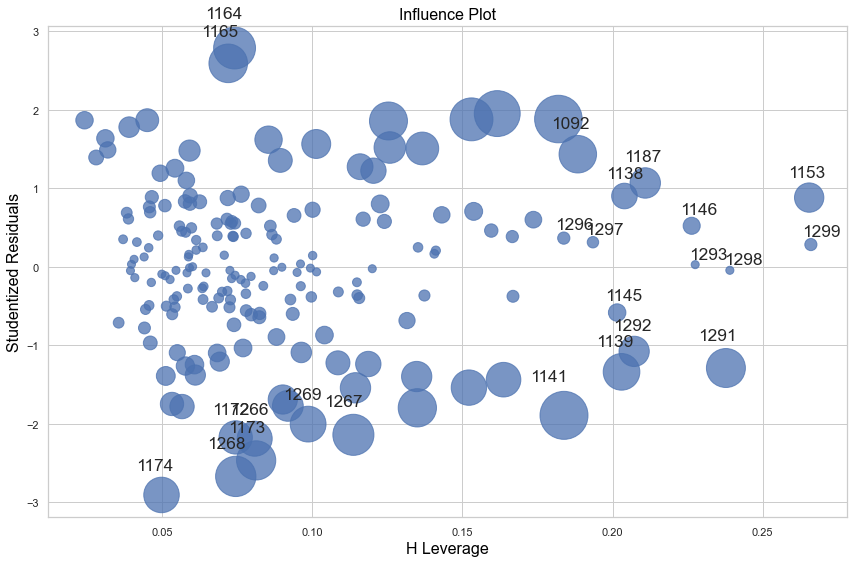

In [104]:
fig, ax = plt.subplots(figsize=(12, 8))
influence_plot = sm.graphics.influence_plot(lr_sm_model, criterion="cooks", ax=ax)
fig.tight_layout(pad=1.0)
plt.show()

-----------------------------------

----------------------------

-----------------------------

In [105]:

# X and y are the features and target variable respectively
X = df_standardised_features.drop(index=exclude_rows_idx, axis=0).drop(['federal_interest_rate', 
                                                                        'commerical_real_estate_loan', 'real_estate_prices', 
                                                                        'exports','imports', 'consumer_price_idx', 
                                                                        'spx500', 'unemployment_rate', 'BCI'], axis=1)
y = df_standardised_features.drop(index=exclude_rows_idx, axis=0)['BCI']

# Add a constant term to the features
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

# Fit the model
#lr_sm_model = sm.OLS(y_train, X_train).fit()
lr_sm_model = sm.OLS(y, X).fit()

# Print the summary
print(lr_sm_model.summary())

print(lr_sm_model.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                    BCI   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     52.58
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           7.39e-43
Time:                        12:16:44   Log-Likelihood:                -160.47
No. Observations:                 186   AIC:                             338.9
Df Residuals:                     177   BIC:                             368.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   100.23

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [106]:
coeff = pd.DataFrame({'Coefficient': lr_sm_model.params}, X.columns, columns=['Coefficient'])

#coeff
coeff.sort_values(by='Coefficient')

Coefficient
bank_credits             -3.964204
personal_saving_rate     -1.285306
credit_delinquency       -0.454290
st_consumer_price_idx    -0.263276
consumer_loans            0.331603
inflation                 0.504472
unemployment_claims       2.803533
GDP                       4.585927
const                   100.235796

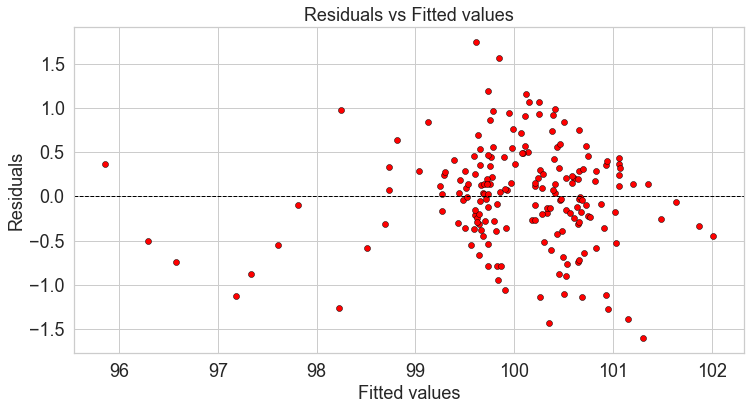

In [107]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=lr_sm_model.fittedvalues, y=lr_sm_model.resid, color='red', edgecolor='black')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Adding a horizontal line at y=0
plt.title('Residuals Plot', fontsize=18)
plt.xlabel('Fitted values', fontsize=18)
plt.ylabel('Residuals', fontsize=18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.title("Residuals vs Fitted values", fontsize=18)
plt.show()


Text(0.5, 1.0, 'Residuals')

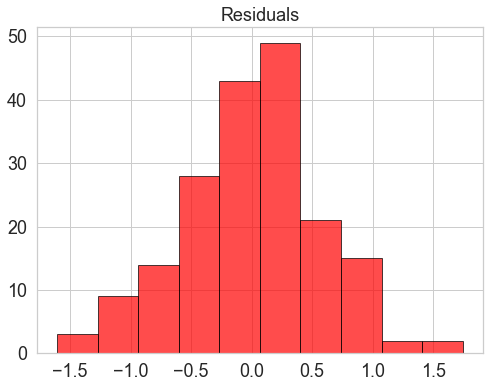

In [108]:
plt.figure(figsize=(8,6))
plt.hist(lr_sm_model.resid, color='red', alpha= 0.7 ,edgecolor='black')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Residuals", fontsize=18)

-----------------------

---------------------------

In [109]:
# Dropping high P-value predictors and BCI

drop_columns = ['commerical_real_estate_loan', 'unemployment_rate', 
         'real_estate_prices', 'credit_delinquency', 'spx500', 
         'st_consumer_price_idx', 'exports', 'imports', 'BCI']

In [110]:
# X and y are the features and target variable respectively
X = df_standardised_features.drop(drop_columns, axis=1)
y = df_standardised_features['BCI']

# Add a constant term to the features
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

# Fit the model
lr_sm_model = sm.OLS(y_train, X_train).fit()

# Print the summary
print(lr_sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    BCI   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     13.29
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           6.55e-14
Time:                        12:16:45   Log-Likelihood:                -161.12
No. Observations:                 139   AIC:                             340.2
Df Residuals:                     130   BIC:                             366.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   100.06

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [111]:
coeff = pd.DataFrame({'Coefficient': lr_sm_model.params}, X.columns, columns=['Coefficient'])

#coeff
coeff.sort_values(by='Coefficient')

Coefficient
bank_credits             -1.669821
consumer_price_idx       -0.330861
federal_interest_rate    -0.090095
personal_saving_rate      0.012448
unemployment_claims       0.106843
consumer_loans            0.149291
inflation                 0.580120
GDP                       1.970049
const                   100.060468

In [112]:
features_of_interest = ['bank_credits', 'personal_saving_rate', 'imports', 'exports', 
                        'credit_delinquency', 'federal_interest_rate', 'real_estate_prices', 
                        'inflation', 'unemployment_claims', 'consumer_loans', 'GDP']

In [113]:
# X and y are the features and target variable respectively
X = df_standardised_features[features_of_interest]
y = df_standardised_features['BCI']

# Add a constant term to the features
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

# Fit the model
lr_sm_model = sm.OLS(y_train, X_train).fit()

# Print the summary
print(lr_sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    BCI   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     9.617
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           1.83e-12
Time:                        12:16:45   Log-Likelihood:                -160.53
No. Observations:                 139   AIC:                             345.1
Df Residuals:                     127   BIC:                             380.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   100.02

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### <u>**PCA Analysis**</u>

In [114]:
from sklearn.decomposition import PCA

# X is the feature matrix
X = df_standardised_features.iloc[:, :-1]

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Create a DataFrame with the principal components
columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(data=X_pca, columns=columns)


In [115]:
df_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -2.598585 -2.899174  0.784012 -0.910804 -0.343949 -1.276206 -0.979467   
1   -2.718124 -2.532602  0.764199 -1.447908  0.227121 -0.510462 -0.594103   
2   -2.763536 -2.117895 -0.026120 -0.992988 -0.506932 -1.074267  0.130545   
3   -2.708486 -2.466821  0.222693 -0.851543 -0.383699 -1.067389  0.006181   
4   -2.577062 -2.498101  0.712554 -1.337779  0.271397 -0.064394 -0.410777   
..        ...       ...       ...       ...       ...       ...       ...   
203  6.153848 -1.864571  1.235282  0.950750  1.649968  0.643601  0.510781   
204  6.433041 -3.568436  1.971471  2.686071  0.758375 -0.307724 -1.038713   
205  6.060734 -3.173343  1.884279  2.566515  0.778721  0.304006 -0.458491   
206  7.167657 -2.876839  1.421828  2.429291  2.323711  1.162339  0.686802   
207  6.808835 -3.319463  1.170607  3.823323  0.189256 -0.414250  0.094581   

          PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0    0.781091 -1.278214  0.261975 -0.080354  0.165258  0.142692 -0.224383   
1    0.701434 -1.329420  0.047181 -0.199538 -0.022620  0.139444 -0.172257   
2   -0.004949 -1.147922  0.491089 -0.139456  0.059437  0.095850 -0.122732   
3    0.013531 -1.154037  0.559350  0.025399 -0.055266  0.018263 -0.162852   
4    0.419958 -0.752085  0.150278 -0.255180 -0.015328  0.107020 -0.219978   
..        ...       ...       ...       ...       ...       ...       ...   
203  0.236258 -0.492242 -0.153230  0.002643  0.424607  0.175920  0.008249   
204  0.561437 -0.597099 -0.151343  0.486494  0.210914 -0.310003  0.022581   
205  0.526215 -0.962724 -0.182851  0.452866 -0.079163 -0.099005  0.279555   
206 -0.465395 -0.080021 -0.313159 -0.162932  0.318768 -0.028976 -0.320547   
207 -0.287305 -0.245919 -0.116651  0.283559  0.110679 -0.253393  0.074979   

         PC15      PC16  
0    0.364828 -0.275691  
1    0.355985 -0.217522  
2    0.439462 -0.158245  
3    0.337148 -0.107061  
4    0.279217 -0.165833  
..        ...       ...  
203 -0.083567  0.074697  
204 -0.044320  0.072029  
205  0.074763  0.124513  
206  0.210267  0.198252  
207  0.313959  0.191033  

[208 rows x 16 columns]

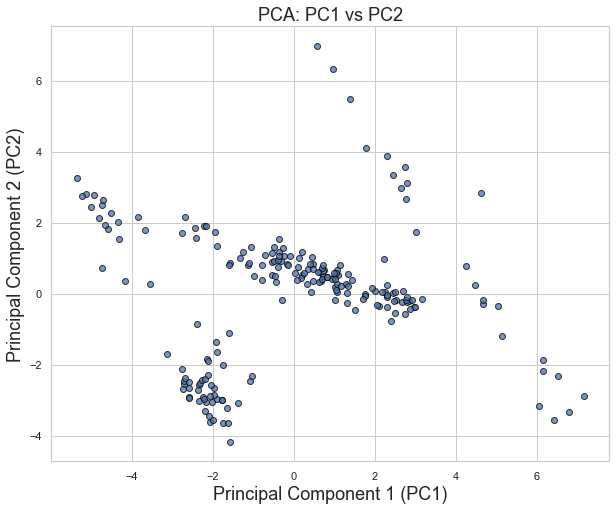

In [116]:
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.75, edgecolor='black')
plt.title('PCA: PC1 vs PC2', fontsize=18)
plt.xlabel('Principal Component 1 (PC1)', fontsize=18)
plt.ylabel('Principal Component 2 (PC2)', fontsize=18)
plt.grid(True)
plt.show()

In [117]:
# Plotting interactive plot with plotly 

fig = px.scatter(df_pca, x='PC1', y='PC2', title='PCA: PC1 vs PC2',
                 labels={'PC1': 'Principal Component 1 (PC1)', 'PC2': 'Principal Component 2 (PC2)'},
                 hover_data={'index': df_pca.index}, opacity=0.75)

# Add grid lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='Lightblue')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')

# Show the interactive plot
fig.show()


In [118]:
from sklearn.cluster import KMeans

X = df_pca[['PC1', 'PC2']] 

# Choose the number of clusters (you can adjust this)
num_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_pca['cluster'] = kmeans.fit_predict(X)

# Plot the clustered data using Plotly
fig = px.scatter(df_pca, x='PC1', y='PC2', color='cluster',
                 title='Cluster Analysis: PC1 vs PC2',
                 labels={'PC1': 'Principal Component 1 (PC1)', 'PC2': 'Principal Component 2 (PC2)'},
                 hover_data={'index': df_pca.index}, opacity=0.75)

# Add grid lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightBlue')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')

# Show the interactive plot
fig.show()


Explained Variance Ratio PC1: 0.4195
Explained Variance Ratio PC2: 0.2311
Explained Variance Ratio PC3: 0.0809
Explained Variance Ratio PC4: 0.0774
Explained Variance Ratio PC5: 0.0550
Explained Variance Ratio PC6: 0.0485
Explained Variance Ratio PC7: 0.0278
Explained Variance Ratio PC8: 0.0192
Explained Variance Ratio PC9: 0.0132
Explained Variance Ratio PC10: 0.0091
Explained Variance Ratio PC11: 0.0074
Explained Variance Ratio PC12: 0.0047
Explained Variance Ratio PC13: 0.0024
Explained Variance Ratio PC14: 0.0018
Explained Variance Ratio PC15: 0.0014
Explained Variance Ratio PC16: 0.0006


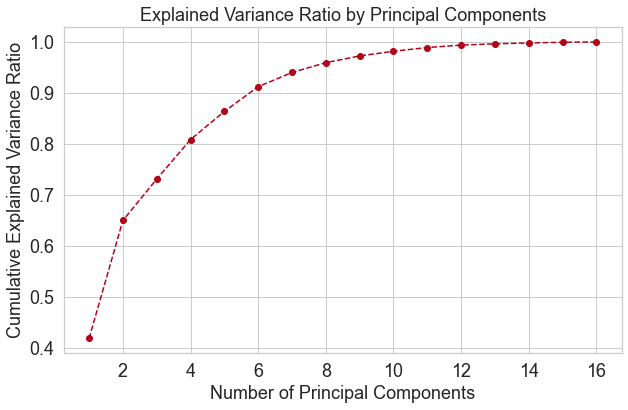

In [119]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f'Explained Variance Ratio PC{i}: {ratio:.4f}')

# Visualize the explained variance ratio
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), 
         color = '#B20317', marker='o', linestyle='--')
plt.xlabel('Number of Principal Components', fontsize=18)
plt.xticks(fontsize=18)
plt.ylabel('Cumulative Explained Variance Ratio', fontsize=18)
plt.yticks(fontsize=18)
plt.title('Explained Variance Ratio by Principal Components', fontsize=18)
plt.show()


#### This shows that 6 feature variables can explain 91% of the variations in the data and 8 can 96%. Therefore 8 features can explain BCI without losing much information from keeping 16 features.

In [120]:
# X_pca is the result of PCA transformation
# Columns is the list of original feature names
feat_columns = df_standardised_features.columns[:-1]

loadings = pca.components_

# Create a DataFrame with loadings
loadings_df = pd.DataFrame(loadings, columns=feat_columns, index=columns)

# Display the loadings for the first few principal components
num_components_to_display = 8
for i in range(num_components_to_display):
    print(f"\nLoadings for PC{i+1}:")
    print(loadings_df.iloc[i].sort_values(ascending=False))



Loadings for PC1:
GDP                            0.363651
imports                        0.352361
bank_credits                   0.342693
consumer_loans                 0.324150
exports                        0.321582
consumer_price_idx             0.215670
st_consumer_price_idx          0.187717
real_estate_prices             0.174719
personal_saving_rate           0.163734
inflation                      0.134685
spx500                         0.004905
unemployment_claims           -0.050446
federal_interest_rate         -0.099799
unemployment_rate             -0.181166
commerical_real_estate_loan   -0.325902
credit_delinquency            -0.329976
Name: PC1, dtype: float64

Loadings for PC2:
personal_saving_rate           0.366985
unemployment_rate              0.362916
unemployment_claims            0.304569
consumer_loans                 0.222164
bank_credits                   0.161481
spx500                         0.140585
exports                        0.109335
GDP             

In [121]:
loadings = pca.components_.T  # Transpose to align with original features

# Create a DataFrame with loadings
loadings_df = pd.DataFrame(loadings, columns=columns, index=df_standardised_features.columns[:-1])

# Identify the most important features for PC1 and PC2
top_features_pc1 = loadings_df['PC1'].abs().sort_values(ascending=False).index
top_features_pc2 = loadings_df['PC2'].abs().sort_values(ascending=False).index

# Print or use the top features
print("Top features for PC1:", top_features_pc1)
print("Top features for PC2:", top_features_pc2)


Top features for PC1: Index(['GDP', 'imports', 'bank_credits', 'credit_delinquency',
       'commerical_real_estate_loan', 'consumer_loans', 'exports',
       'consumer_price_idx', 'st_consumer_price_idx', 'unemployment_rate',
       'real_estate_prices', 'personal_saving_rate', 'inflation',
       'federal_interest_rate', 'unemployment_claims', 'spx500'],
      dtype='object')
Top features for PC2: Index(['federal_interest_rate', 'personal_saving_rate', 'unemployment_rate',
       'inflation', 'consumer_price_idx', 'st_consumer_price_idx',
       'unemployment_claims', 'real_estate_prices', 'consumer_loans',
       'bank_credits', 'spx500', 'exports', 'GDP',
       'commerical_real_estate_loan', 'credit_delinquency', 'imports'],
      dtype='object')


In [122]:
len(pca.components_[0])

16

In [123]:
#correlations = np.abs(np.corrcoef(df_standardised_features.iloc[:, :-1].T, pca.components_))

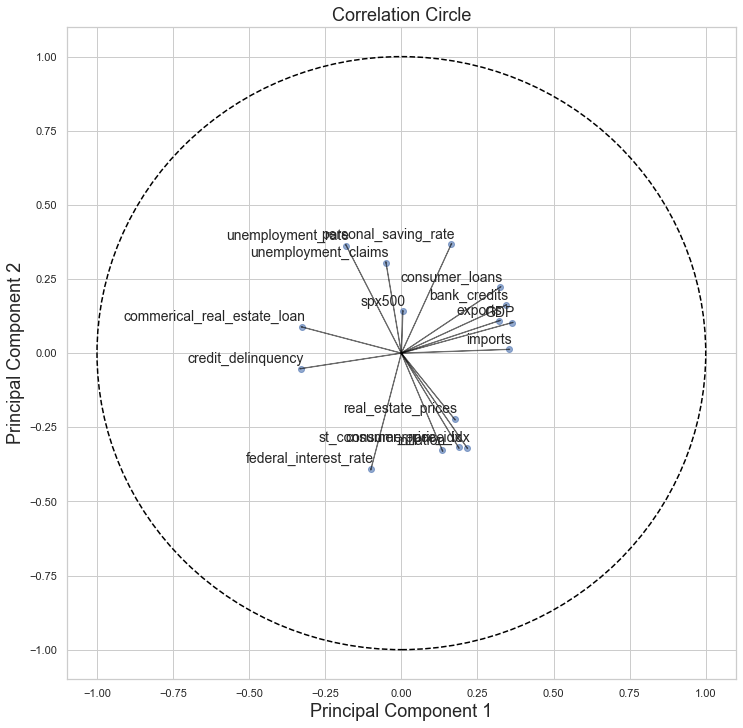

In [124]:
# Generating a correlation circle

pcs = pca.components_.T

# Creating a scatter plot for the first two principal components
plt.figure(figsize=(12, 12))
plt.scatter(pcs[:, 0], pcs[:, 1], alpha=0.6)

# Adding labels to each point representing the feature names with larger font size
for i, (x, y) in enumerate(zip(pcs[:, 0], pcs[:, 1])):
    # Define an offset to adjust label position
    offset = 0.01
    
    # Display the label with an offset to avoid overlap
    plt.text(x + offset, y + offset, feat_columns[i], fontsize=14, ha='right', va='bottom')

# Adding arrows to show the magnitude
for i, feature in enumerate(feat_columns):
    plt.arrow(0, 0, pcs[i, 0], pcs[i, 1], color='black', alpha=0.5, width=0.001)

# Adding unit circle
circle = plt.Circle((0, 0), 1, edgecolor='black', facecolor='none', linewidth=1.5, linestyle='--')
plt.gca().add_patch(circle)

# Setting axis labels
plt.xlabel('Principal Component 1', fontsize=18)
plt.ylabel('Principal Component 2', fontsize=18)

# Setting plot title
plt.title('Correlation Circle', fontsize=18)

# Showing the plot
plt.show()


#### t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [125]:
from sklearn.manifold import TSNE

X = df_standardised_features.iloc[:, :-1]

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a scatter plot of the t-SNE representation
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], color='#006CFF', alpha=0.75, edgecolor='black')
plt.title('t-SNE: 2D Representation')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [126]:

# X_tsne is the result from t-SNE
df_plot = pd.DataFrame({'t-SNE Component 1': X_tsne[:, 0],
                        't-SNE Component 2': X_tsne[:, 1]})

# Create an interactive scatter plot with Plotly Express
fig = px.scatter(df_plot, x='t-SNE Component 1', y='t-SNE Component 2',
                 title='Interactive t-SNE Plot', opacity=0.8, hover_name=df_plot.index)

# Show the interactive plot
fig.show()


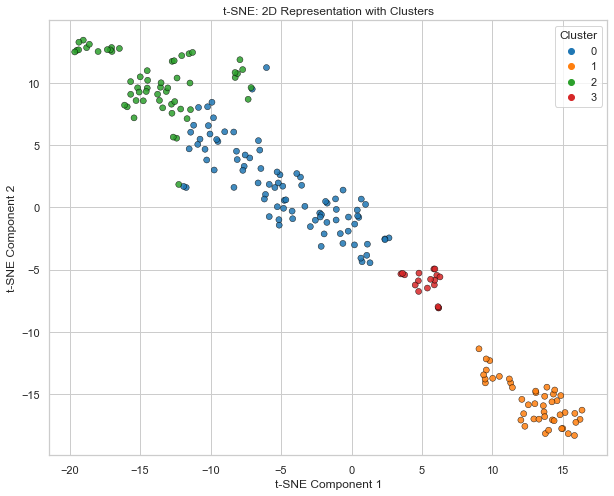

In [127]:
# KMeans for clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

df_cluster = df_standardised_features.copy()

df_cluster['cluster'] = kmeans.fit_predict(X)

# Creating a scatter plot with colors based on clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df_cluster['cluster'], 
                palette='tab10', alpha=0.85, edgecolor='black')

plt.title('t-SNE: 2D Representation with Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()


In [128]:
df_cluster[df_cluster['cluster']==2].index

Int64Index([1236, 1237, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249,
            1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260,
            1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271,
            1272, 1273, 1274, 1278, 1279, 1281, 1282, 1283, 1284, 1285, 1286,
            1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297,
            1298, 1299],
           dtype='int64')

In [129]:
df_final.iloc[df_cluster[df_cluster['cluster']==3].index]

date  federal_interest_rate  bank_credits  consumer_loans  \
1138 2008-11-01               0.387667   9183.963540      372.269880   
1139 2008-12-01               0.155161   9112.598650      381.792900   
1140 2009-01-01               0.154194   9034.949680      383.550760   
1141 2009-02-01               0.222143   9033.942000      393.677925   
1142 2009-03-01               0.180645   9066.449350      395.542700   
1143 2009-04-01               0.150333   9043.130725      386.799000   
1144 2009-05-01               0.177419   8996.052620      372.795720   
1145 2009-06-01               0.206333   9042.237475      365.016975   
1146 2009-07-01               0.155806   9035.709750      359.206450   
1147 2009-08-01               0.160323   8975.279040      356.883120   
1148 2009-09-01               0.146667   8930.257850      355.674475   
1149 2009-10-01               0.118065   8847.621260      351.055940   
1150 2009-11-01               0.119000   8754.699875      346.311075   
1151 2009-12-01               0.118065   8824.082325      344.442300   
1152 2010-01-01               0.110000   8786.470980      336.444260   
1153 2010-02-01               0.126429   8718.094250      324.380100   
1154 2010-03-01               0.164516   8659.363275      318.569725   
1155 2010-04-01               0.198333   8690.990720      382.515200   

      commerical_real_estate_loan  real_estate_prices  credit_delinquency  \
1138                   577.300260           -3.243000            2.170000   
1139                   582.354600           -3.243000            2.170000   
1140                   588.019180           -3.243000            2.170000   
1141                   592.387975           -6.538667            2.256667   
1142                   595.413575           -6.538667            2.256667   
1143                   598.736875           -6.538667            2.256667   
1144                   602.638440           -9.915667            2.163333   
1145                   611.464025           -9.915667            2.163333   
1146                   609.976275           -9.915667            2.163333   
1147                   607.677840           -9.380667            2.110000   
1148                   606.030025           -9.380667            2.110000   
1149                   603.649800           -9.380667            2.110000   
1150                   601.984175           -9.180333            1.926667   
1151                   606.035425           -9.180333            1.926667   
1152                   603.428020           -9.180333            1.926667   
1153                   599.853325           -2.377667            1.700000   
1154                   599.356675           -2.377667            1.700000   
1155                   599.064520           -2.377667            1.700000   

              GDP  inflation       exports   imports    spx500  \
1138  5062.491667        1.1   97085.41624  147515.0 -0.314737   
1139  5062.491667        0.1   88486.16477  137762.9  0.081818   
1140  5062.491667        0.0   78150.57881  122414.6 -0.417500   
1141  5053.924000        0.2   80349.27800  109012.2 -0.586842   
1142  5053.924000       -0.4   87847.96310  121358.7  0.418182   
1143  5053.924000       -0.7   80822.45317  118895.8  0.444762   
1144  5072.215667       -1.3   83651.04999  116341.5  0.275000   
1145  5072.215667       -1.4   86829.51161  127173.2  0.008636   
1146  5072.215667       -2.1   85634.74823  135695.8  0.332727   
1147  5126.385000       -1.5   87315.10033  131271.6  0.161905   
1148  5126.385000       -1.3   91458.40523  141004.5  0.170476   
1149  5126.385000       -0.2  100005.49340  147026.9 -0.082273   
1150  5152.019667        1.8   94606.51389  143324.3  0.283000   
1151  5152.019667        2.7   99371.86723  146105.8  0.082727   
1152  5152.019667        2.6   92600.63234  136725.4 -0.193158   
1153  5201.876000        2.1   93858.17667  133898.8  0.154737   
1154  5201.876000        2.3  110510.20570  157728.8  0.

### <u>**K-Nearest Neighbors**</u>

In [130]:
from sklearn.metrics import mean_squared_error, r2_score

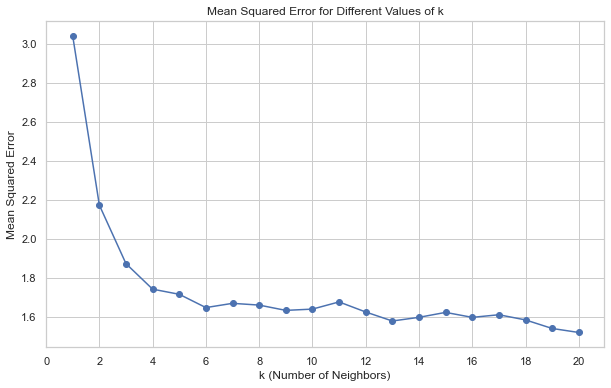

In [131]:
from sklearn.neighbors import KNeighborsRegressor

# Finding the best k value through iteration

X = df_final.drop(['date','federal_interest_rate', 'commerical_real_estate_loan', 'real_estate_prices', 
               'exports','imports', 'consumer_price_idx', 
               'spx500', 'unemployment_rate'], axis=1).dropna().drop('BCI', axis=1)

y = df_final.drop(['date','federal_interest_rate', 'commerical_real_estate_loan', 'real_estate_prices', 
               'exports','imports', 'consumer_price_idx', 
               'spx500', 'unemployment_rate'], axis=1).dropna()['BCI']

# Split data into predictors X and output Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

# Initializing lists to store results
k_values = list(range(1, 21))  # Testing k from 1 to 20
mse_values = []

# Running the loop for different values of k
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(k_values, mse_values, marker='o')
plt.xticks(np.arange(0, 22, 2))
plt.title('Mean Squared Error for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Squared Error')
plt.show()


In [132]:
X = df_final_interval.iloc[:, 1:-1].dropna()
y = df_final_interval.dropna()['BCI']

# Spliting data into predictors X and output Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

# Creating a KNeighborsRegressor with k=5
knn_model = KNeighborsRegressor(n_neighbors=6)

# Fitting the model to the training data
knn_model.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=6)

In [133]:
# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.4924745868608982


In [134]:
print(f'R-Squared = {knn_model.score(X_test, y_test)}')

R-Squared = -0.07635356099262292


### <u>Support Vector Machines (SVM) Regression</u> 
SVR (Support Vector Regression)

In [135]:
from sklearn.model_selection import GridSearchCV

In [136]:
from sklearn.svm import SVR


# X and y are the features and target variable respectively
X = df_standardised_features.iloc[:, :-1]
y = df_standardised_features['BCI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)


# Define a parameter grid
param_grid = {'C': [0.1, 1, 10, 50], 'epsilon': [0.02, 0.05, 0.1, 0.2]}

# Initialize SVR
svr_model = SVR()

# Perform grid search
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params_svr = grid_search.best_params_

# Train the final SVR model with the best parameters
final_svr_model = SVR(C=best_params_svr['C'], epsilon=best_params_svr['epsilon'])
final_svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = final_svr_model.predict(X_test)


# Evaluate the SVR model
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'Mean Squared Error (SVR): {mse_svr}')

r2_svr = r2_score(y_test, y_pred_svr)
print('R-squared (SVR):', r2_svr)

print('Best Parameters', best_params_svr)

Mean Squared Error (SVR): 0.21857240252658333
R-squared (SVR): 0.8430298974151004
Best Parameters {'C': 50, 'epsilon': 0.05}


In [137]:
from sklearn.inspection import permutation_importance

feature_names = X.columns

# Feature coefficients (importance)
perm_importance = permutation_importance(final_svr_model, X_test, y_test, n_repeats=30, random_state=42)

# Retrieving the mean importance scores and feature names
mean_importance = perm_importance.importances_mean
feature_importance_dict = dict(zip(feature_names, mean_importance))

feature_importance_df = pd.DataFrame(list(feature_importance_dict.items()), columns=['Feature', 'Importance'])

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

Feature  Importance
1                  bank_credits    1.502849
2                consumer_loans    0.877413
6                           GDP    0.582817
15            unemployment_rate    0.510278
0         federal_interest_rate    0.502456
5            credit_delinquency    0.355209
8                       exports    0.327844
3   commerical_real_estate_loan    0.327527
4            real_estate_prices    0.272059
7                     inflation    0.259296
13        st_consumer_price_idx    0.228587
9                       imports    0.117421
11           consumer_price_idx    0.081770
12         personal_saving_rate    0.051516
14          unemployment_claims    0.036052
10                       spx500   -0.000285

### <u>**Random Forest Regressor**</u> 

In [138]:
from sklearn.ensemble import RandomForestRegressor

X = df_final.iloc[:, 1:-1].dropna()
y = df_final.dropna()['BCI']

# Split data into predictors X and output Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

# Create a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=50)#bootstrap=False, 

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 0.23778384082410176
R-squared: 0.8292329980558678


In [139]:
feature_importances = rf_model.feature_importances_

feature_names = X.columns

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print("Feature Importances:")
feature_importance_df

Feature Importances:


Feature  Importance
4            real_estate_prices    0.197337
5            credit_delinquency    0.186665
9                       imports    0.118887
3   commerical_real_estate_loan    0.101073
6                           GDP    0.087431
2                consumer_loans    0.052681
14          unemployment_claims    0.041074
1                  bank_credits    0.041062
8                       exports    0.031333
10                       spx500    0.029942
0         federal_interest_rate    0.025557
15            unemployment_rate    0.020218
7                     inflation    0.019184
13        st_consumer_price_idx    0.018834
11           consumer_price_idx    0.014909
12         personal_saving_rate    0.013811

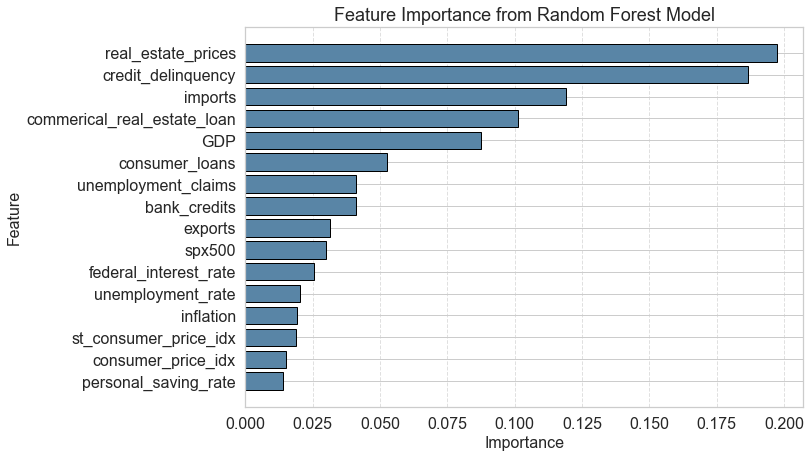

In [140]:
# Sorting by descending order to have higher importance at the top
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)  


# Plotting feature importances
plt.figure(figsize=(10, 7))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#5985A6', edgecolor='black')
plt.xlabel('Importance', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Feature', fontsize=16)
plt.yticks(fontsize=16)
plt.title('Feature Importance from Random Forest Model', fontsize=18)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


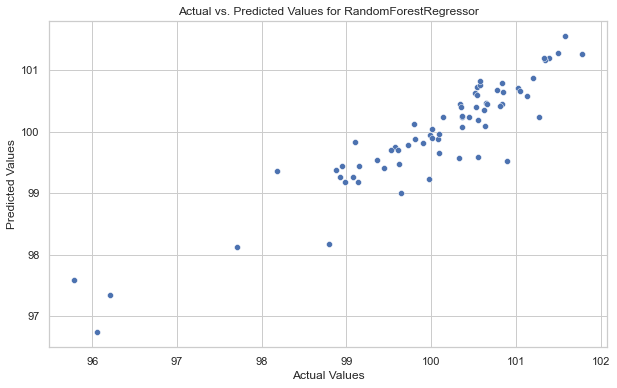

In [141]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, ci=95)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for RandomForestRegressor')
plt.show()

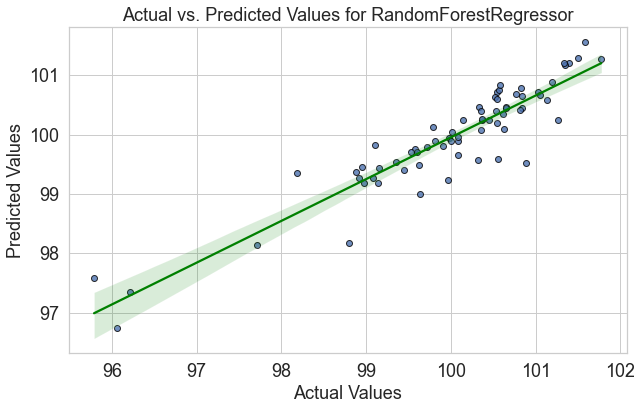

In [142]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, ci=95, scatter_kws = {'edgecolor':'black'}, line_kws={'color': 'green'})
plt.xlabel('Actual Values', fontsize=18)
plt.xticks(fontsize=18)
plt.ylabel('Predicted Values', fontsize=18)
plt.yticks(fontsize=18)
plt.title('Actual vs. Predicted Values for RandomForestRegressor', fontsize=18)
plt.show()

In [143]:
X = df_standardised_features.iloc[:, :-1]
y = df_standardised_features['BCI']

# Split data into predictors X and output Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

# Create a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=50)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 0.237808477334096
R-squared: 0.8292153050833955


### <u>**XGBoost (optimized distributed gradient boosting)**</u>

In [144]:
#pip install xgboost

In [145]:
from xgboost import XGBRegressor

In [146]:
# X and y are the features and target variable respectively
X = df_standardised_features.drop('BCI', axis=1)
y = df_standardised_features['BCI']

# Splitting data into predictors X and output Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

# Building XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Print feature importances if needed
print('Feature Importances:', xgb_model.feature_importances_)


Feature Importances: [5.7988190e-03 3.2426264e-02 1.2141161e-01 4.0269177e-02 9.0847179e-02
 2.0471248e-01 2.9466325e-01 1.3669137e-02 3.4372214e-02 6.7051314e-02
 1.6474161e-02 2.9131356e-03 2.4591744e-04 1.8562452e-03 4.7711707e-03
 6.8517908e-02]


In [147]:
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

In [148]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.168410000464436
R-squared: 0.8790545615839567


In [149]:
column_names = X.columns

# DataFrame to store feature importances with corresponding column names
feature_importance_df = pd.DataFrame({'Feature': column_names, 'Importance': xgb_model.feature_importances_})

# Sorting the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


feature_importance_df

Feature  Importance
6                           GDP    0.294663
5            credit_delinquency    0.204712
2                consumer_loans    0.121412
4            real_estate_prices    0.090847
15            unemployment_rate    0.068518
9                       imports    0.067051
3   commerical_real_estate_loan    0.040269
8                       exports    0.034372
1                  bank_credits    0.032426
10                       spx500    0.016474
7                     inflation    0.013669
0         federal_interest_rate    0.005799
14          unemployment_claims    0.004771
11           consumer_price_idx    0.002913
13        st_consumer_price_idx    0.001856
12         personal_saving_rate    0.000246

In [150]:
# Define parameter grid for hyperparameter tuning (adjust parameters and values)
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 8, 10]
}

# Create and fit XGBoost model with GridSearchCV for hyperparameter tuning
xgb_model = GridSearchCV(XGBRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_model.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", xgb_model.best_params_)
print("Best score(negative mean sq error):", xgb_model.best_score_)

# Get trained model
best_model = xgb_model.best_estimator_

# Make predictions on test set
y_pred = best_model.predict(X_test)

# Evaluate model performance with chosen metric (e.g., MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# R Squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
Best score(negative mean sq error): -0.2183367311298107
Mean Squared Error: 0.14643752971996662
R-squared: 0.8948343258494091


In [151]:
print("Feature importances:", best_model.feature_importances_)

Feature importances: [0.00746792 0.01617478 0.07865017 0.03924797 0.07854783 0.19720037
 0.36453295 0.03333367 0.03626033 0.05246864 0.01553965 0.00629558
 0.00726571 0.00510212 0.0222405  0.03967183]


In [152]:
column_names = X.columns

# DataFrame to store feature importances with corresponding column names
feature_importance_df = pd.DataFrame({'Feature': column_names, 'Importance': best_model.feature_importances_})

# Sorting the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


feature_importance_df


Feature  Importance
6                           GDP    0.364533
5            credit_delinquency    0.197200
2                consumer_loans    0.078650
4            real_estate_prices    0.078548
9                       imports    0.052469
15            unemployment_rate    0.039672
3   commerical_real_estate_loan    0.039248
8                       exports    0.036260
7                     inflation    0.033334
14          unemployment_claims    0.022241
1                  bank_credits    0.016175
10                       spx500    0.015540
0         federal_interest_rate    0.007468
12         personal_saving_rate    0.007266
11           consumer_price_idx    0.006296
13        st_consumer_price_idx    0.005102

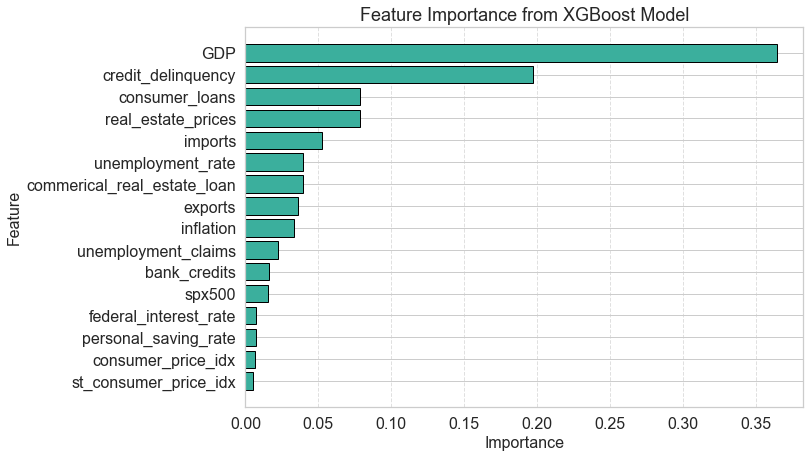

In [153]:
# Sorting by descending order to have higher importance at the top
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)  


# Plotting feature importances
plt.figure(figsize=(10, 7))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#3BAF9D', edgecolor='black')
plt.xlabel('Importance', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Feature', fontsize=16)
plt.yticks(fontsize=16)
plt.title('Feature Importance from XGBoost Model', fontsize=18)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


In [154]:
#pip install shap

In [155]:
#import shap

In [156]:
#explainer = shap.Explainer(best_model)
#shap_values = explainer.shap_values(X_test)

# Visualize the Shapley values for a specific instance
#shap.summary_plot(shap_values, X_test, plot_type="bar")


In [157]:
# X and y are the features and target variable respectively
X = df_standardised_features[features_of_interest]
y = df_standardised_features['BCI']

# Splitting data into predictors X and output Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)


# Define parameter grid for hyperparameter tuning (adjust parameters and values)
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 8]
}

# Create and fit XGBoost model with GridSearchCV for hyperparameter tuning
xgb_model = GridSearchCV(XGBRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_model.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", xgb_model.best_params_)
print("Best score:", xgb_model.best_score_)

# Get trained model
best_model = xgb_model.best_estimator_

# Make predictions on test set
y_pred = best_model.predict(X_test)

# Evaluate model performance with chosen metric (e.g., MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# R Squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
Best score: -0.23033047601506915
Mean Squared Error: 0.33381344749539527
R-squared: 0.7602683115898022


In [158]:
column_names = X.columns

# DataFrame to store feature importances with corresponding column names
feature_importance_df = pd.DataFrame({'Feature': column_names, 'Importance': best_model.feature_importances_})

# Sorting the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


feature_importance_df

Feature  Importance
10                    GDP    0.364341
4      credit_delinquency    0.236294
2                 imports    0.082674
9          consumer_loans    0.082563
6      real_estate_prices    0.061805
8     unemployment_claims    0.051004
3                 exports    0.044106
7               inflation    0.032220
5   federal_interest_rate    0.021895
0            bank_credits    0.016577
1    personal_saving_rate    0.006521

### <u>**Neural Network**</u>

In [159]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# X and y are the features and target variable respectively
X = df_standardised_features.iloc[:, :-1]
y = df_standardised_features['BCI']

#X = df_final_interval.drop(['date', 'BCI'], axis=1).dropna()
#y = df_final_interval.dropna()['BCI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neural network model with regularization and dropout
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), loss='mean_squared_error')


In [160]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


In [161]:
# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [162]:
# Loading weights from previous training
#model.load_weights('tensorflow_nn_model_2_weights.h5')

In [163]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, 
                    validation_split=0.33, verbose=2, shuffle=True,
                   callbacks=[early_stopping])


Epoch 1/100
14/14 - 1s - loss: 9539.5977 - val_loss: 9136.5205 - 1s/epoch - 78ms/step
Epoch 2/100
14/14 - 0s - loss: 8141.1543 - val_loss: 7135.4419 - 64ms/epoch - 5ms/step
Epoch 3/100
14/14 - 0s - loss: 5475.8516 - val_loss: 3779.7791 - 55ms/epoch - 4ms/step
Epoch 4/100
14/14 - 0s - loss: 2972.5710 - val_loss: 1708.1899 - 57ms/epoch - 4ms/step
Epoch 5/100
14/14 - 0s - loss: 1868.7772 - val_loss: 1135.1550 - 55ms/epoch - 4ms/step
Epoch 6/100
14/14 - 0s - loss: 1668.6688 - val_loss: 677.6937 - 63ms/epoch - 5ms/step
Epoch 7/100
14/14 - 0s - loss: 1682.5765 - val_loss: 394.8746 - 53ms/epoch - 4ms/step
Epoch 8/100
14/14 - 0s - loss: 1495.0581 - val_loss: 329.4763 - 48ms/epoch - 3ms/step
Epoch 9/100
14/14 - 0s - loss: 1099.3495 - val_loss: 331.6679 - 70ms/epoch - 5ms/step
Epoch 10/100
14/14 - 0s - loss: 1289.9476 - val_loss: 216.7669 - 66ms/epoch - 5ms/step
Epoch 11/100
14/14 - 0s - loss: 975.7289 - val_loss: 102.0800 - 56ms/epoch - 4ms/step
Epoch 12/100
14/14 - 0s - loss: 1074.3762 - val_l

In [164]:
# Save model weights
#model.save_weights('tensorflow_nn_model_2_weights.h5')

In [165]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

2/2 [==============================] - 0s 0s/step
Mean Squared Error: 71.41850517413351


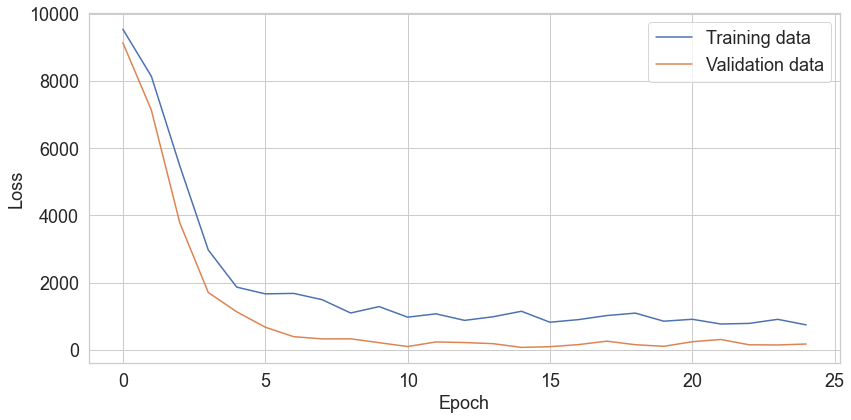

In [166]:
plt.figure(figsize=(12,6))

plt.plot(history.history['loss'], label= 'Training data')
plt.plot(history.history['val_loss'], label= 'Validation data')
plt.xlabel('Epoch', fontsize=18)
plt.xticks(fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.yticks(fontsize=18)

plt.legend(fontsize=18)

plt.tight_layout()
plt.show()

<u><div style="text-align: center;"><font size="4"> **Prediction**</font> </div></u>

In [167]:
df_final

date  federal_interest_rate  bank_credits  consumer_loans  \
0    1914-01-01                    NaN           NaN             NaN   
1    1914-02-01                    NaN           NaN             NaN   
2    1914-03-01                    NaN           NaN             NaN   
3    1914-04-01                    NaN           NaN             NaN   
4    1914-05-01                    NaN           NaN             NaN   
...         ...                    ...           ...             ...   
1314 2023-07-01                    NaN           NaN             NaN   
1315 2023-08-01                    NaN           NaN             NaN   
1316 2023-09-01                    NaN           NaN             NaN   
1317 2023-10-01                    NaN           NaN             NaN   
1318 2023-11-01                    NaN           NaN             NaN   

      commerical_real_estate_loan  real_estate_prices  credit_delinquency  \
0                             NaN                 NaN                 NaN   
1                             NaN                 NaN                 NaN   
2                             NaN                 NaN                 NaN   
3                             NaN                 NaN                 NaN   
4                             NaN                 NaN                 NaN   
...                           ...                 ...                 ...   
1314                          NaN                 NaN                 NaN   
1315                          NaN                 NaN                 NaN   
1316                          NaN                 NaN                 NaN   
1317                          NaN                 NaN                 NaN   
1318                          NaN                 NaN                 NaN   

      GDP  inflation      exports   imports  spx500  consumer_price_idx  \
0     NaN        2.0          NaN       NaN     NaN                 NaN   
1     NaN        1.0          NaN       NaN     NaN                 NaN   
2     NaN        1.0          NaN       NaN     NaN                 NaN   
3     NaN        0.0          NaN       NaN     NaN                 NaN   
4     NaN        2.1          NaN       NaN     NaN                 NaN   
...   ...        ...          ...       ...     ...                 ...   
1314  NaN        3.2  159618.8567  255665.9     NaN                 NaN   
1315  NaN        3.7  171404.5030  266026.9     NaN                 NaN   
1316  NaN        3.7  171272.3367  261306.3     NaN                 NaN   
1317  NaN        3.2  178083.6472  276809.7     NaN                 NaN   
1318  NaN        3.1          NaN       NaN     NaN                 NaN   

      personal_saving_rate  st_consumer_price_idx  unemployment_claims  \
0                      NaN                    NaN                  NaN   
1                      NaN                    NaN                  NaN   
2                      NaN                    NaN                  NaN   
3                      NaN                    NaN                  NaN   
4                      NaN                    NaN                  NaN   
...                    ...                    ...                  ...   
1314                   NaN                    NaN                  NaN   
1315                   NaN                    NaN                  NaN   
1316                   NaN                    NaN                  NaN   
1317                   NaN                    NaN                  NaN   
1318                   NaN                    NaN                  NaN   

      unemployment_rate       BCI  
0                   NaN       NaN  
1                   NaN       NaN  
2                   NaN       NaN  
3                   NaN       NaN  
4                   NaN       NaN  
...                 ...       ...  
1314                NaN  98.58130  
1315                NaN  98.72079  
1316                NaN  98.79745  
1317                NaN  98.71177  
1318                NaN       NaN  

In [168]:
test_interval = (df_final['date'] >= '2021-01-01') & (df_final['date'] <= '2022-06-01')

df_test = df_final[test_interval].dropna()

df_test

date  federal_interest_rate  bank_credits  consumer_loans  \
1284 2021-01-01               0.085161  15029.113460      749.018580   
1285 2021-02-01               0.075714  15109.641250      746.111175   
1286 2021-03-01               0.069677  15212.785825      744.582225   
1287 2021-04-01               0.069000  15341.473840      744.895280   
1288 2021-05-01               0.058065  15413.812400      739.687925   
1289 2021-06-01               0.078000  15539.812250      747.464900   
1290 2021-07-01               0.098065  15598.034260      755.623220   
1291 2021-08-01               0.092258  15653.920100      762.355175   
1292 2021-09-01               0.079333  15735.558400      769.071250   
1293 2021-10-01               0.079032  15864.204600      773.185740   
1294 2021-11-01               0.079667  16032.395100      781.610275   
1295 2021-12-01               0.079677  16184.150925      790.846550   
1296 2022-01-01               0.079355  16371.800260      801.892240   
1297 2022-02-01               0.080000  16573.310275      809.084500   
1298 2022-03-01               0.200968  16647.632275      817.480825   
1299 2022-04-01               0.330000  16800.620640      835.515060   

      commerical_real_estate_loan  real_estate_prices  credit_delinquency  \
1284                   282.350960            1.615667            0.616667   
1285                   279.537500            2.507000            0.533333   
1286                   275.624100            2.507000            0.533333   
1287                   271.534340            2.507000            0.533333   
1288                   267.600550            4.413333            0.516667   
1289                   264.465150            4.413333            0.516667   
1290                   261.896540            4.413333            0.516667   
1291                   259.015125            4.542667            0.523333   
1292                   256.695325            4.542667            0.523333   
1293                   254.260180            4.542667            0.523333   
1294                   251.769750            4.664333            0.550000   
1295                   251.157800            4.664333            0.550000   
1296                   249.258460            4.664333            0.550000   
1297                   247.646250            2.834667            0.616667   
1298                   247.310125            2.834667            0.616667   
1299                   247.421260            2.834667            0.616667   

              GDP  inflation      exports   imports    spx500  \
1284  6405.408000        1.4  128162.0276  204638.9 -0.054737   
1285  6514.749333        1.7  124181.9722  193444.8  0.140526   
1286  6514.749333        2.6  152670.6311  236920.5  0.184783   
1287  6514.749333        4.2  144017.6937  226454.3  0.245714   
1288  6557.531333        5.0  145815.2098  230405.4  0.032500   
1289  6557.531333        5.4  148067.4593  242328.9  0.100909   
1290  6557.531333        5.4  144269.7513  237297.4  0.110476   
1291  6668.727000        5.3  148295.1886  245205.3  0.132273   
1292  6668.727000        5.4  142338.9425  244374.7 -0.228095   
1293  6668.727000        6.2  164137.5881  251297.4  0.320476   
1294  6641.362667        6.8  156533.1846  259414.4 -0.035714   
1295  6641.362667        7.0  159331.9192  257092.8  0.199545   
1296  6641.362667        7.5  147848.0392  247065.3 -0.262500   
1297  6631.757000        7.9  150555.1821  234218.6 -0.157368   
1298  6631.757000        8.5  179313.7556  295975.4  0.162609   
1299  6631.757000        8.3  173533.9427  273176.8 -0.447500   

      consumer_price_idx  personal_saving_rate  st_consumer_price_idx  \
1284            1.524302                  20.0                0.09347   
1285            2.810391                  13.4                0.19201   
1286            2.356651                  26.3                0.25166   
1287            2.745815                  12.8                0.34195   
1288 

In [169]:
features_t = df_test.iloc[:, 1:-1].dropna()

# Standardizing the features
scaler = StandardScaler()
features_standardised_t = scaler.fit_transform(features_t)

# Creating a DataFrame with the normalized values, original column names, and index
standardised_features_t = pd.DataFrame(features_standardised_t, columns=features_t.columns, index=features_t.index)

df_standardised_features_t = standardised_features_t

# Adding the 'BCI' column to the normalised_features DataFrame
df_standardised_features_t['BCI'] = df_test.dropna()['BCI']


In [170]:
len(y)

208

In [171]:
# X and y are the features and target variable respectively
#X = df_standardised_features_t.drop('BCI', axis=1)
#y = df_standardised_features_t['BCI']

In [172]:
# X and y are the features and target variable respectively
X = df_test.drop(['date', 'BCI'], axis=1)
y = df_test['BCI']

## Testing Random forest model

y_pred = rf_model.predict(X)

In [173]:
y_pred

array([100.28236606, 100.28866172, 100.28761392, 100.28438142,
       100.28312162, 100.28461072, 100.28341532, 100.28235342,
       100.27287386, 100.28900348, 100.28334522, 100.28235342,
       100.26883914, 100.27117578, 100.28091074, 100.25967842])

In [174]:
# Evaluate model performance with chosen metric (e.g., MSE)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

# R Squared
r2 = r2_score(y, y_pred)
print('R-squared:', r2)

Mean Squared Error: 1.5418812845027745
R-squared: -10.003671005959893


In [175]:
compare = pd.DataFrame({'Actual': y, 'Predicted': y_pred.flatten()})

compare

Actual   Predicted
1284  101.5376  100.282366
1285  101.7758  100.288662
1286  101.9740  100.287614
1287  101.9321  100.284381
1288  101.8499  100.283122
1289  101.7141  100.284611
1290  101.5810  100.283415
1291  101.5342  100.282353
1292  101.5742  100.272874
1293  101.5763  100.289003
1294  101.4949  100.283345
1295  101.2941  100.282353
1296  101.1188  100.268839
1297  101.0070  100.271176
1298  100.8437  100.280911
1299  100.6499  100.259678

In [176]:
y_test

1253    101.33420
1107    100.32320
1165    101.41640
1188     99.77062
1258    100.98520
1101    100.93300
1192     99.54568
1227     99.57304
1110     99.99451
1240    100.57310
1263    100.00670
1122     99.79131
1247    101.34840
1272     99.14919
1217     99.84921
1289    101.71410
1256    101.40540
1282    101.14340
1176     99.95202
1167    101.05270
1216     99.85755
1262    100.22700
1196    100.50240
1193     99.77026
1161    100.77480
1117     99.47089
1187     99.45492
1108    100.18440
1233     99.73376
1277     99.23912
1246    101.28970
1160    100.54130
1158    100.45260
1212    100.19700
1239    100.57580
1190     99.79137
1230     99.67204
1259    100.67250
1137     96.96976
1205    100.55320
1157    100.64260
1270     98.87691
Name: BCI, dtype: float64

In [177]:
#list(y_train)